In [1]:
from mcbj import *
from pca_and_ml import *
import plots
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import pandas as pd
import math

date = "22_03_23"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")

In [2]:
trace_num=36001

<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>

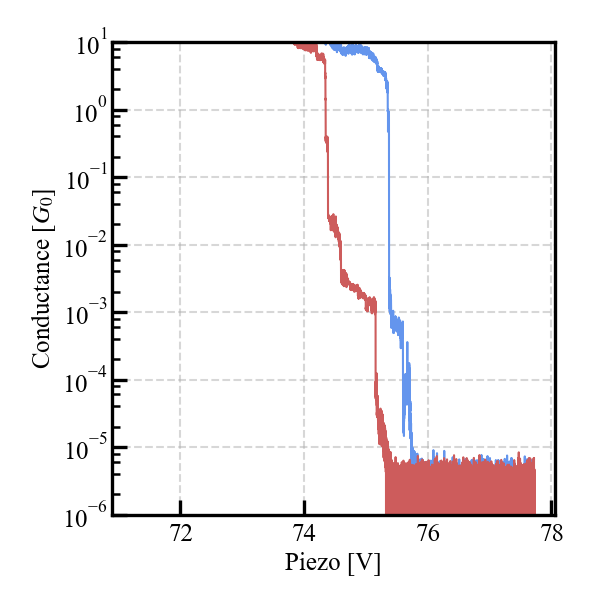

In [3]:
trace_num += 1
trace_pair = TracePair(trace_num, load_from=home_folder)
trace_pair.plot_trace_pair(dpi=300)

In [4]:
before_evap = np.arange(start=1, stop=20201, step=1)
after_evap = np.arange(start=36002, stop=56200, step=1)
all_traces = np.hstack((before_evap, after_evap))

In [5]:
hist = Histogram(folder=home_folder,
                 traces=after_evap[:8000],  #8000
                 conductance_range=(1e-5, 10),  # 4.229e-5
                 conductance_bins_num=100,
                 conductance_bins_mode='total')

In [6]:
hist.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

  0%|          | 0/2000 [00:00<?, ?it/s]

Pull 2D histogram created from 2000 traces
Push 2D histogram created from 2000 traces


(0.0, 100.0)

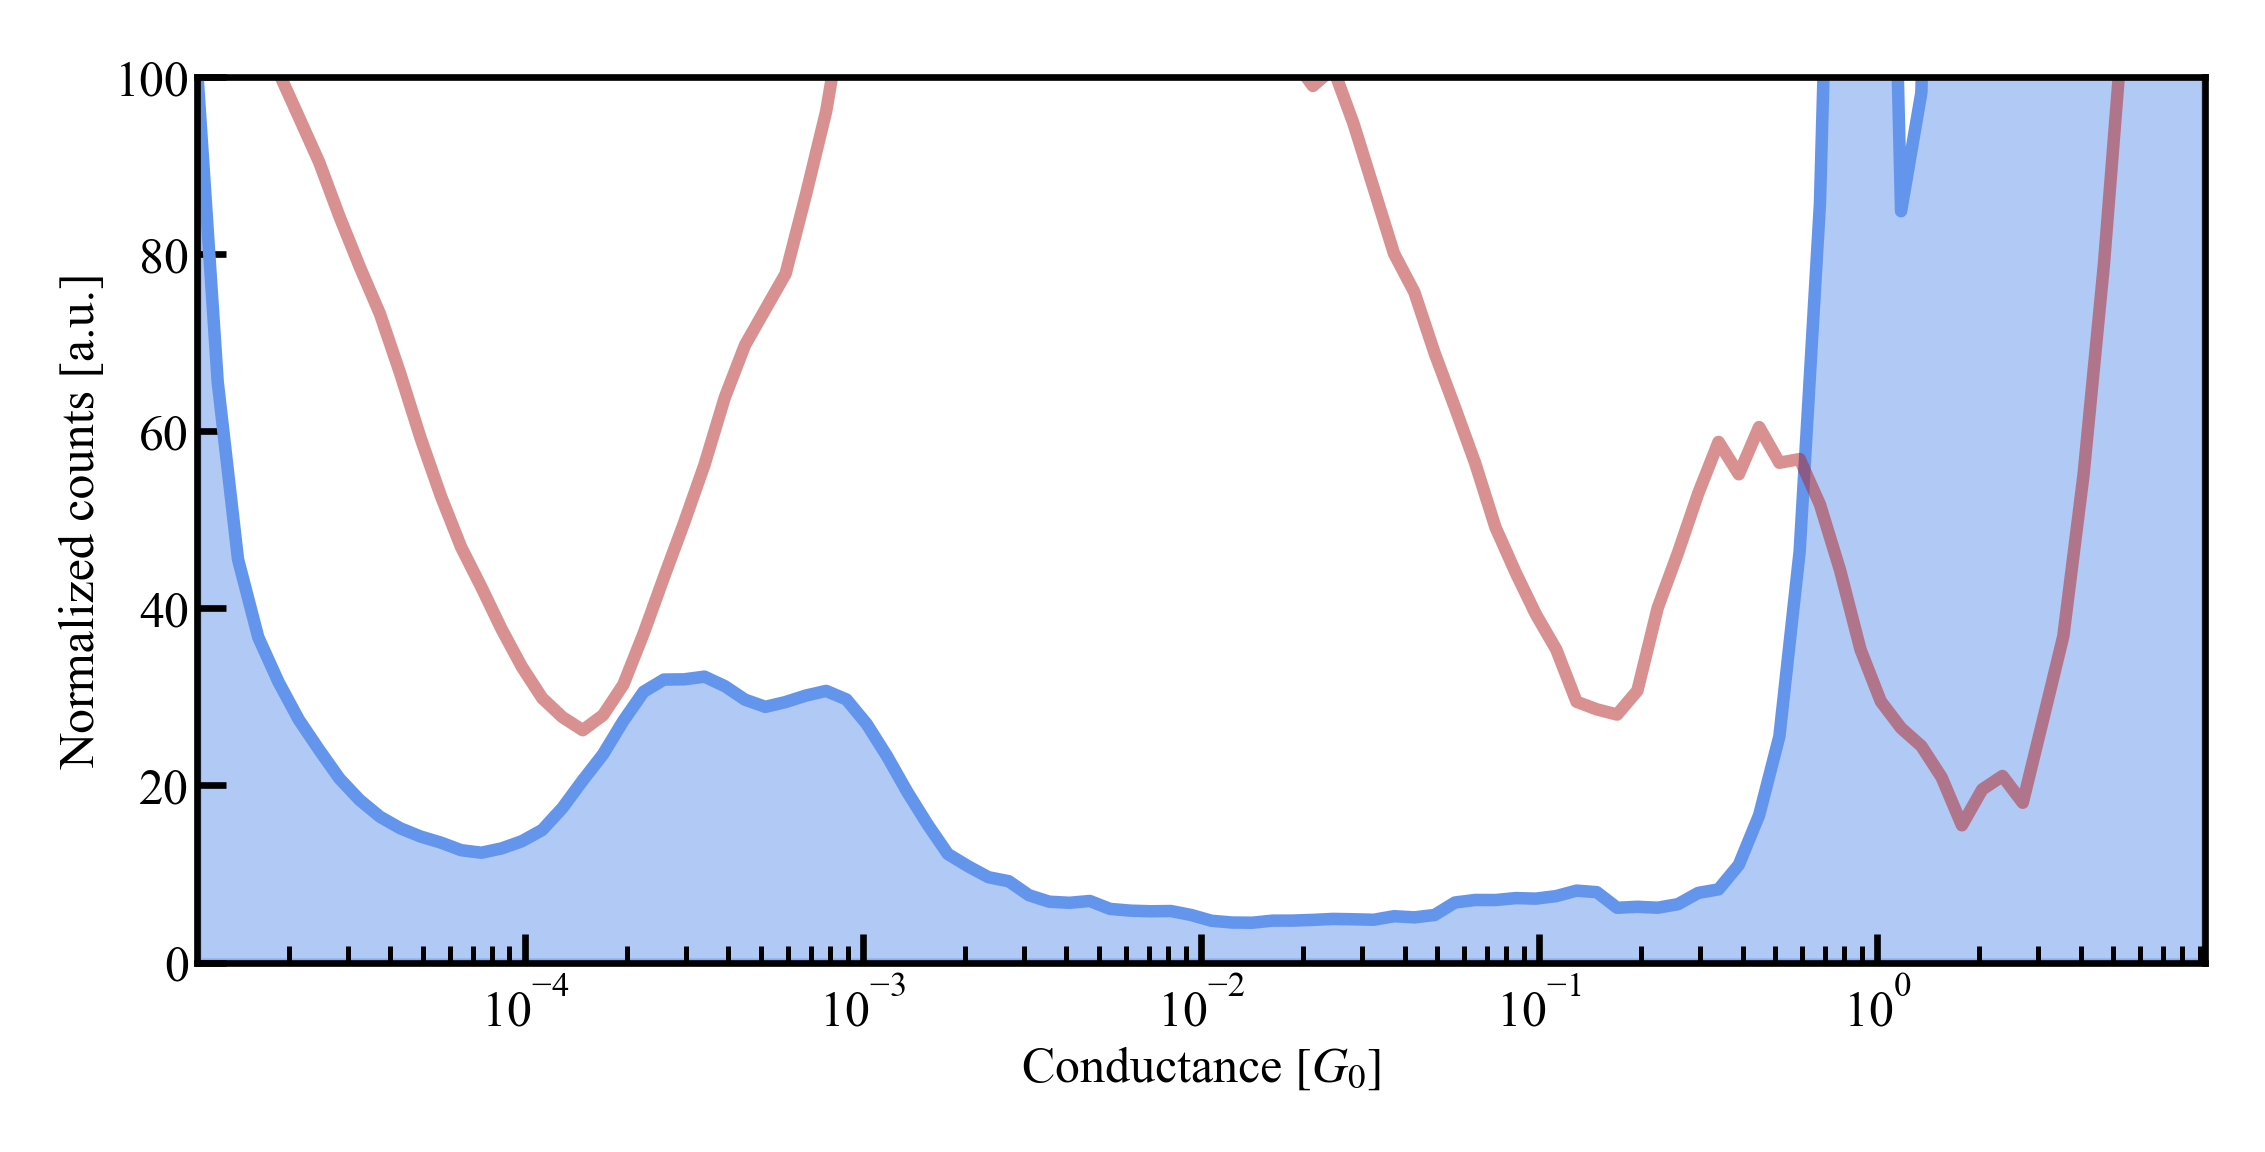

In [7]:
ax = hist.plot_hist_1d()
ax.set_ylim(0, 100)

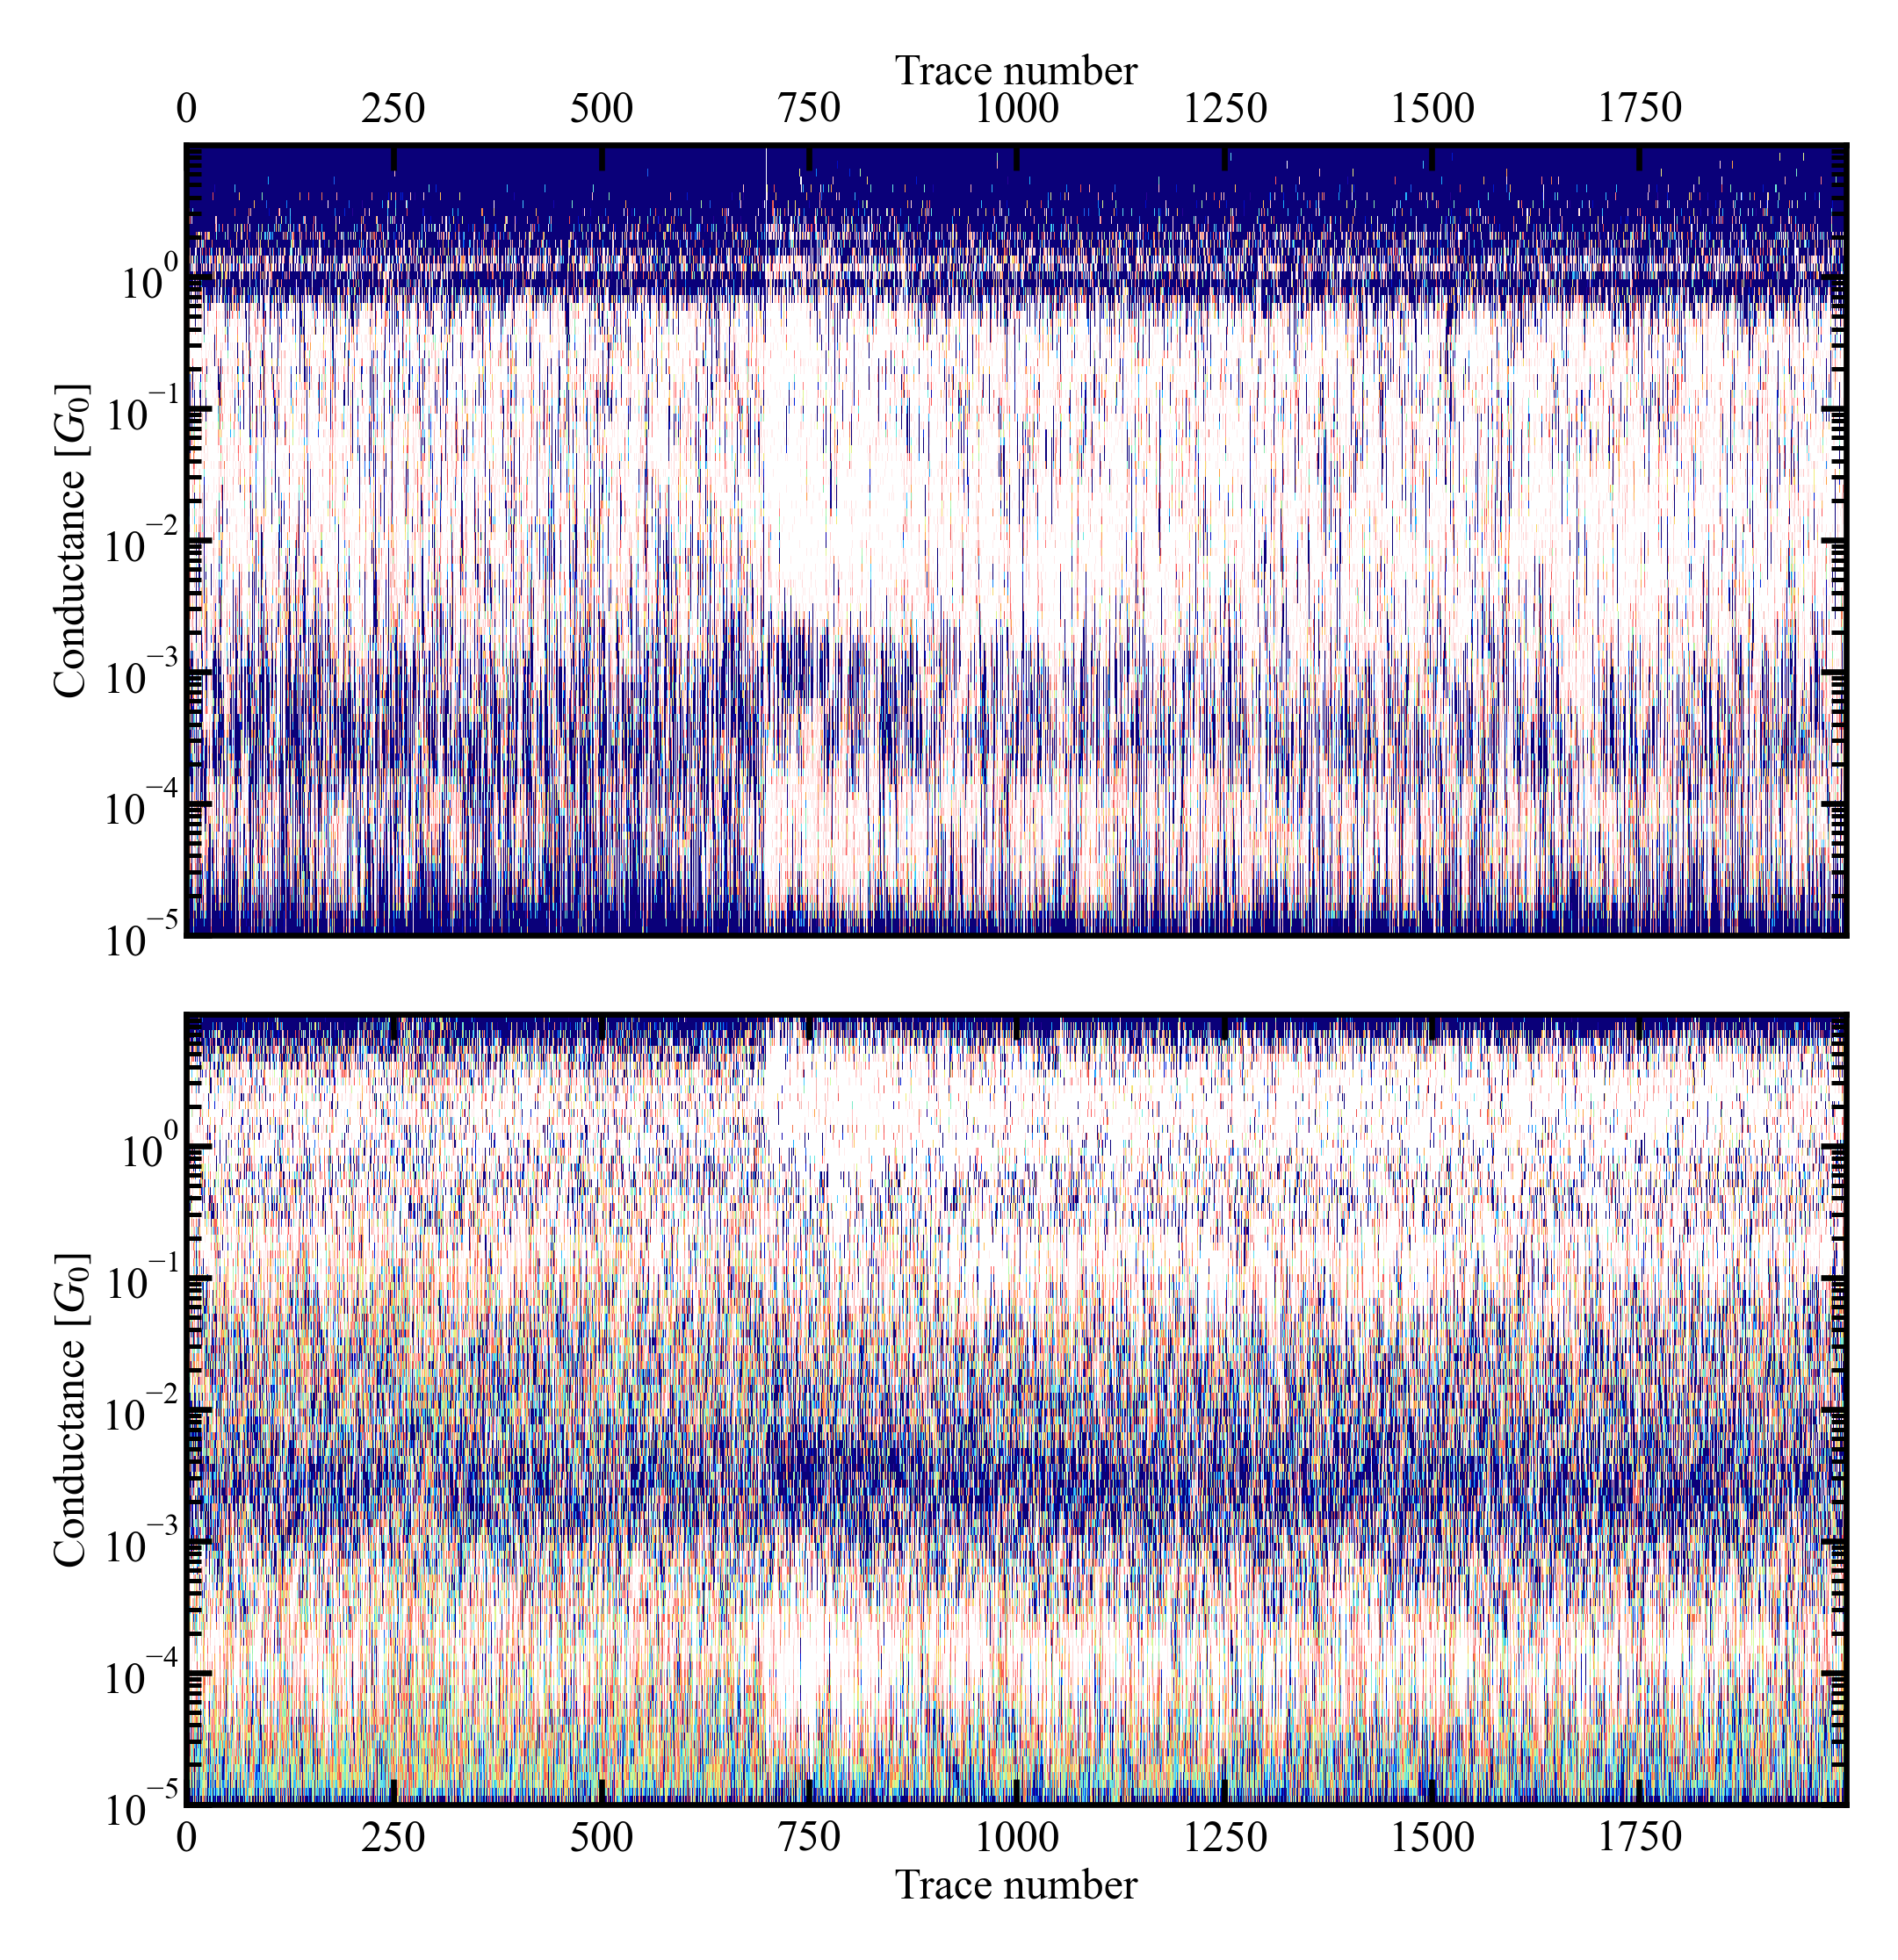

In [8]:
ax_temp_pull, ax_temp_push = hist.plot_temporal_hist(vmax_pull=30, vmax_push=200)

(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

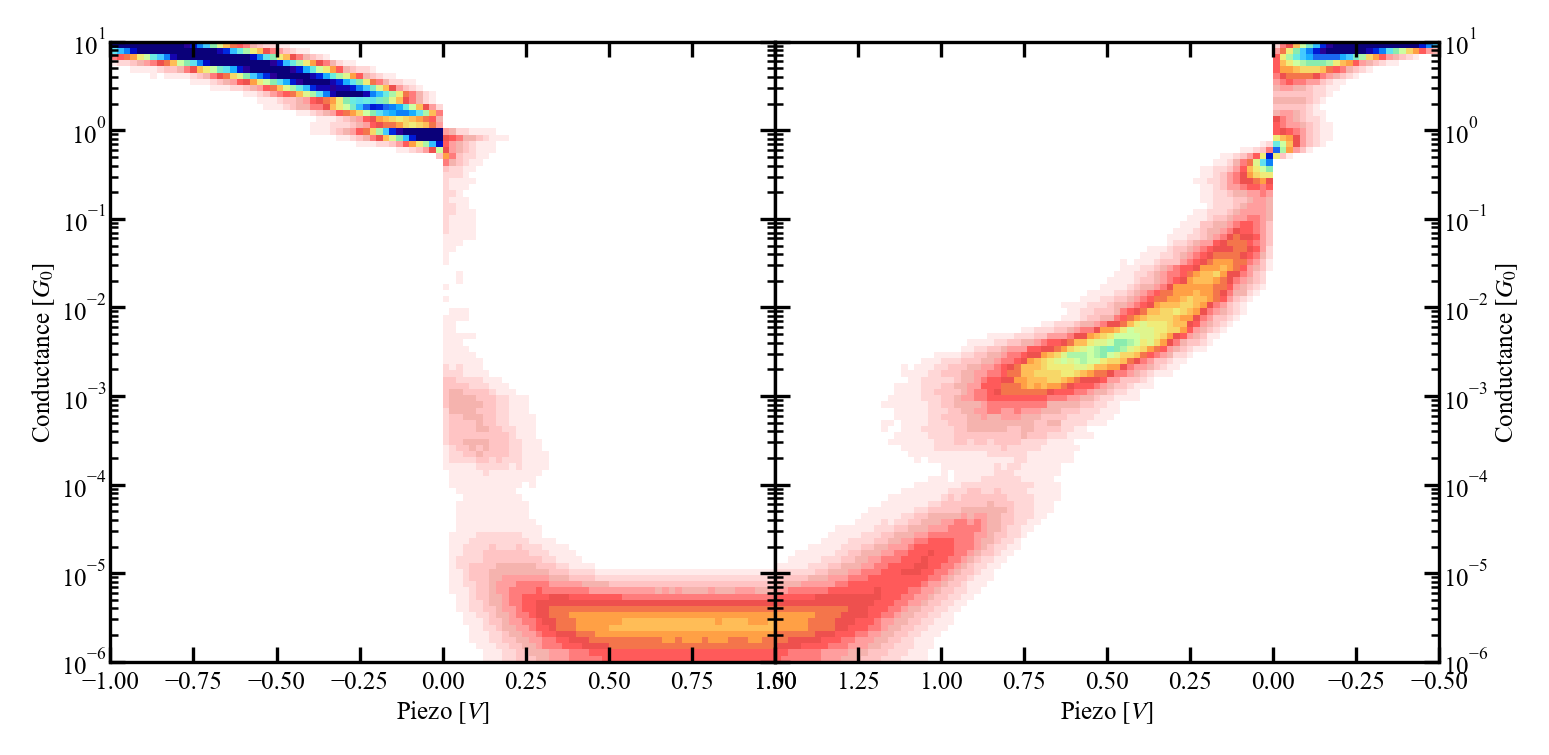

In [9]:
hist.plot_hist_2d_both(dpi=300, vmax=50000)

In [10]:
hist.calc_corr_hist_2d()

  0%|          | 0/2000 [00:00<?, ?it/s]

(<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:>)

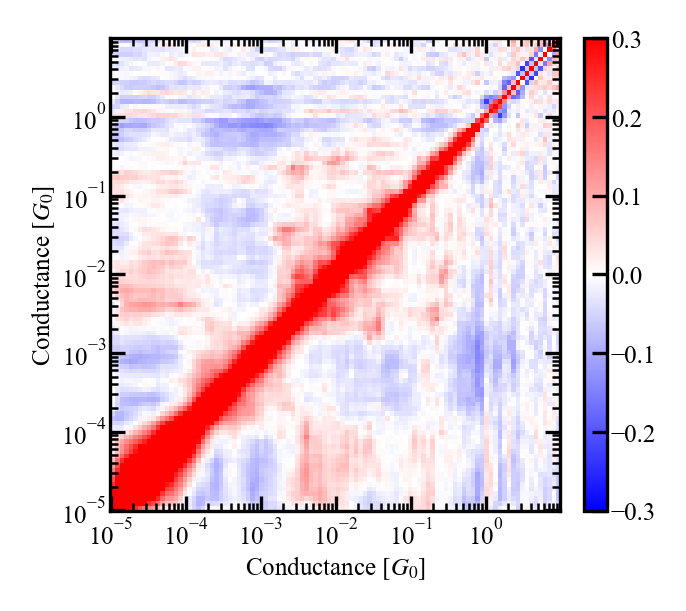

In [12]:
hist.plot_corr(mode='pull', dpi=300, vmin=-0.3, vmax=0.3)

In [13]:
nori_hist_1d = np.loadtxt('D:/Greta/POConductanceHist1D_all_long.txt', skiprows=1)
nori_hist_bins = 10**np.arange(start=-5.82391, step=0.0689284, stop=-5.82391+100*0.0689284)

(1e-05, 10)

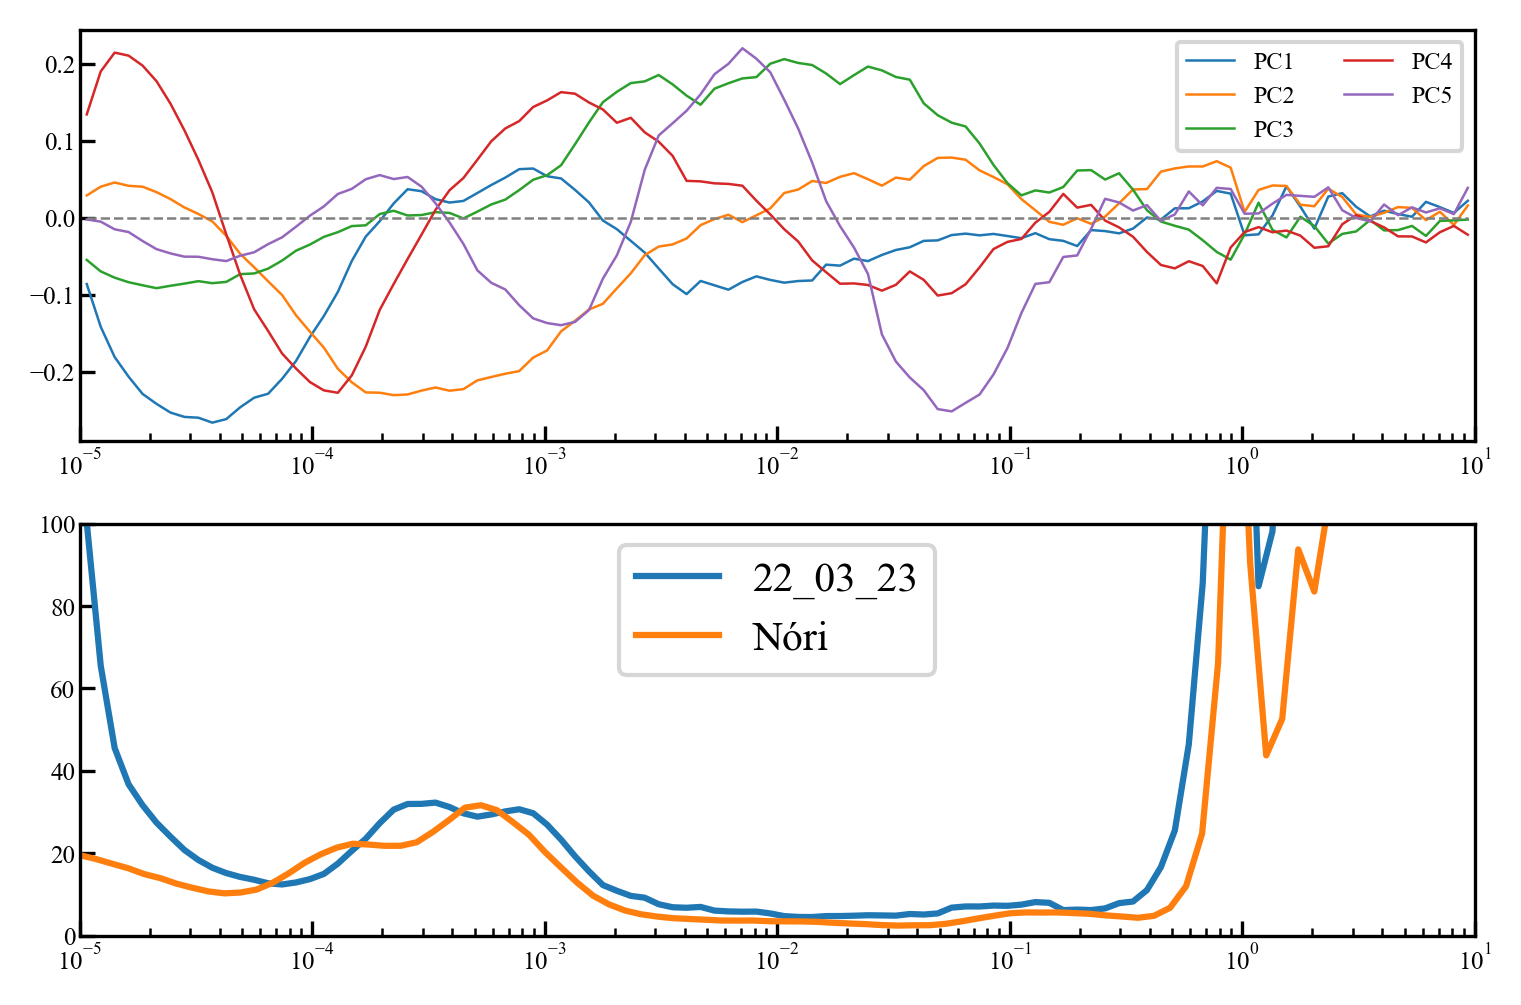

In [14]:
fig, (ax, par) = plt.subplots(nrows=2, dpi=300)

pc = PCA(hist=hist, num_of_pcs=5)
pc.calc_principal_components(direction='pull')
ax = pc.plot_pcs(ax=ax)
# par = ax.twinx()
par.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='22_03_23')
par.set_ylim(0, 100)

par.plot(nori_hist_bins, nori_hist_1d*3, label='Nóri')
par.legend()
par.set_xscale('log')
ax.set_xlim(1e-5, 10)
par.set_xlim(1e-5, 10)

In [15]:
pc.project_to_pcs()

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
pc.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)

  0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
pc.select_percentage(percentage=20, calc_histograms=True)

In [18]:
hist1_1 = Histogram(folder=home_folder,
                    traces=pc.traces_group1['PC1'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist1_2 = Histogram(folder=home_folder,
                    traces=pc.traces_group2['PC1'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist2_1 = Histogram(folder=home_folder,
                    traces=pc.traces_group1['PC2'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist2_2 = Histogram(folder=home_folder,
                    traces=pc.traces_group2['PC2'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist3_1 = Histogram(folder=home_folder,
                    traces=pc.traces_group1['PC3'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist3_2 = Histogram(folder=home_folder,
                    traces=pc.traces_group2['PC3'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist4_1 = Histogram(folder=home_folder,
                    traces=pc.traces_group1['PC4'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist4_2 = Histogram(folder=home_folder,
                    traces=pc.traces_group2['PC4'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist5_1 = Histogram(folder=home_folder,
                    traces=pc.traces_group1['PC5'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

hist5_2 = Histogram(folder=home_folder,
                    traces=pc.traces_group2['PC5'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

In [19]:
hist1_1.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist1_2.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist2_1.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist2_2.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))
hist3_1.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist3_2.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist4_1.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist4_2.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist5_1.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist5_2.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


  0%|          | 0/400 [00:00<?, ?it/s]

Pull 2D histogram created from 400 traces
Push 2D histogram created from 400 traces


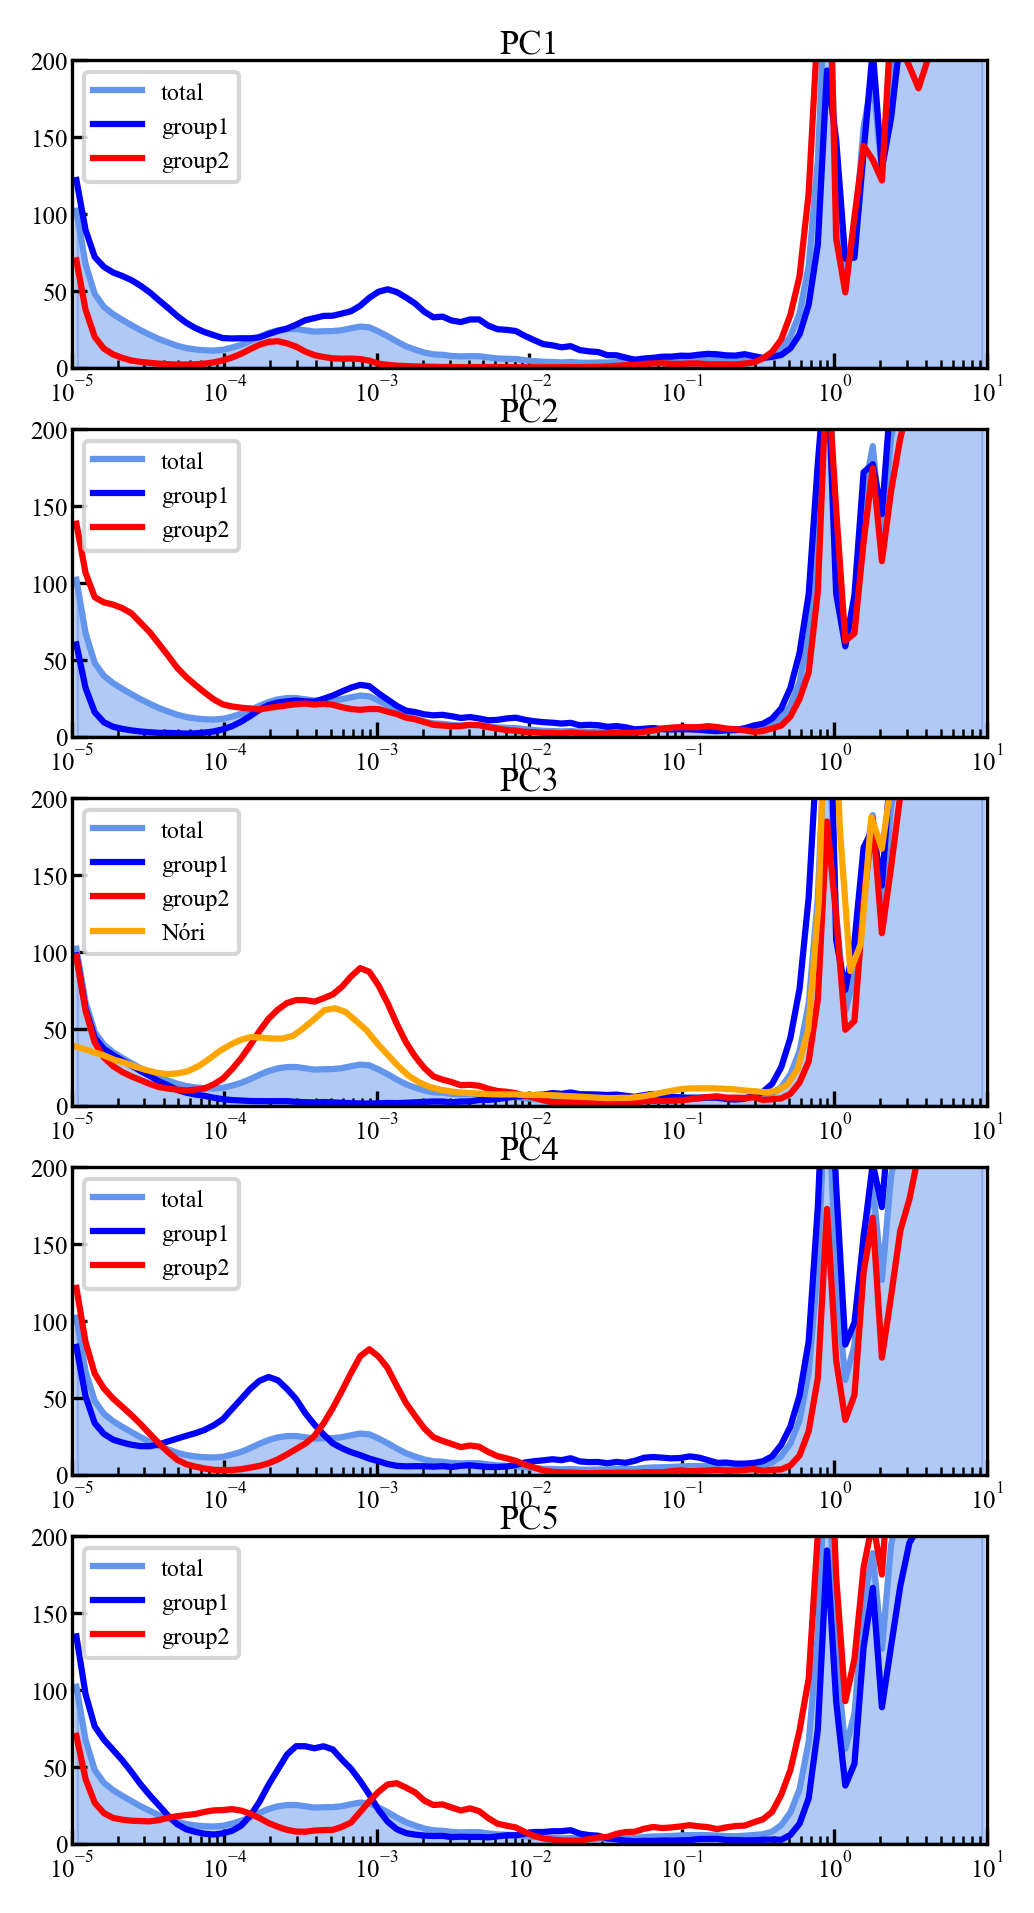

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, dpi=300, figsize=utils.cm2inch(10, 20))

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')
ax5.set_xscale('log')

ax1.set_ylim(0, 200)
ax2.set_ylim(0, 200)
ax3.set_ylim(0, 200)
ax4.set_ylim(0, 200)
ax5.set_ylim(0, 200)

ax1.set_xlim(1e-5, 10)
ax2.set_xlim(1e-5, 10)
ax3.set_xlim(1e-5, 10)
ax4.set_xlim(1e-5, 10)
ax5.set_xlim(1e-5, 10)

ax1.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='total', c='cornflowerblue')
ax1.fill_between(hist.hist_1d_bins, np.zeros_like(hist.hist_1d_pull), hist.hist_1d_pull,
                 alpha=0.5, color='cornflowerblue')
ax2.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='total', c='cornflowerblue')
ax2.fill_between(hist.hist_1d_bins, np.zeros_like(hist.hist_1d_pull), hist.hist_1d_pull,
                 alpha=0.5, color='cornflowerblue')
ax3.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='total', c='cornflowerblue')
ax3.fill_between(hist.hist_1d_bins, np.zeros_like(hist.hist_1d_pull), hist.hist_1d_pull,
                 alpha=0.5, color='cornflowerblue')
ax4.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='total', c='cornflowerblue')
ax4.fill_between(hist.hist_1d_bins, np.zeros_like(hist.hist_1d_pull), hist.hist_1d_pull,
                 alpha=0.5, color='cornflowerblue')
ax5.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='total', c='cornflowerblue')
ax5.fill_between(hist.hist_1d_bins, np.zeros_like(hist.hist_1d_pull), hist.hist_1d_pull,
                 alpha=0.5, color='cornflowerblue')

ax1.plot(hist1_1.hist_1d_bins, hist1_1.hist_1d_pull, label='group1', c='b')
ax1.plot(hist1_2.hist_1d_bins, hist1_2.hist_1d_pull, label='group2', c='r')

ax2.plot(hist2_1.hist_1d_bins, hist2_1.hist_1d_pull, label='group1', c='b')
ax2.plot(hist2_2.hist_1d_bins, hist2_2.hist_1d_pull, label='group2', c='r')

ax3.plot(hist3_1.hist_1d_bins, hist3_1.hist_1d_pull, label='group1', c='b')
ax3.plot(hist3_2.hist_1d_bins, hist3_2.hist_1d_pull, label='group2', c='r')
ax3.plot(nori_hist_bins, nori_hist_1d*6, label='Nóri', c='orange')

ax4.plot(hist4_1.hist_1d_bins, hist4_1.hist_1d_pull, label='group1', c='b')
ax4.plot(hist4_2.hist_1d_bins, hist4_2.hist_1d_pull, label='group2', c='r')

ax5.plot(hist5_1.hist_1d_bins, hist5_1.hist_1d_pull, label='group1', c='b')
ax5.plot(hist5_2.hist_1d_bins, hist5_2.hist_1d_pull, label='group2', c='r')

ax1.set_title('PC1', fontsize='small', pad=0)
ax2.set_title('PC2', fontsize='small', pad=0)
ax3.set_title('PC3', fontsize='small', pad=0)
ax4.set_title('PC4', fontsize='small', pad=0)
ax5.set_title('PC5', fontsize='small', pad=0)

ax1.legend(fontsize='xx-small')
ax2.legend(fontsize='xx-small')
ax3.legend(fontsize='xx-small')
ax4.legend(fontsize='xx-small')
ax5.legend(fontsize='xx-small')

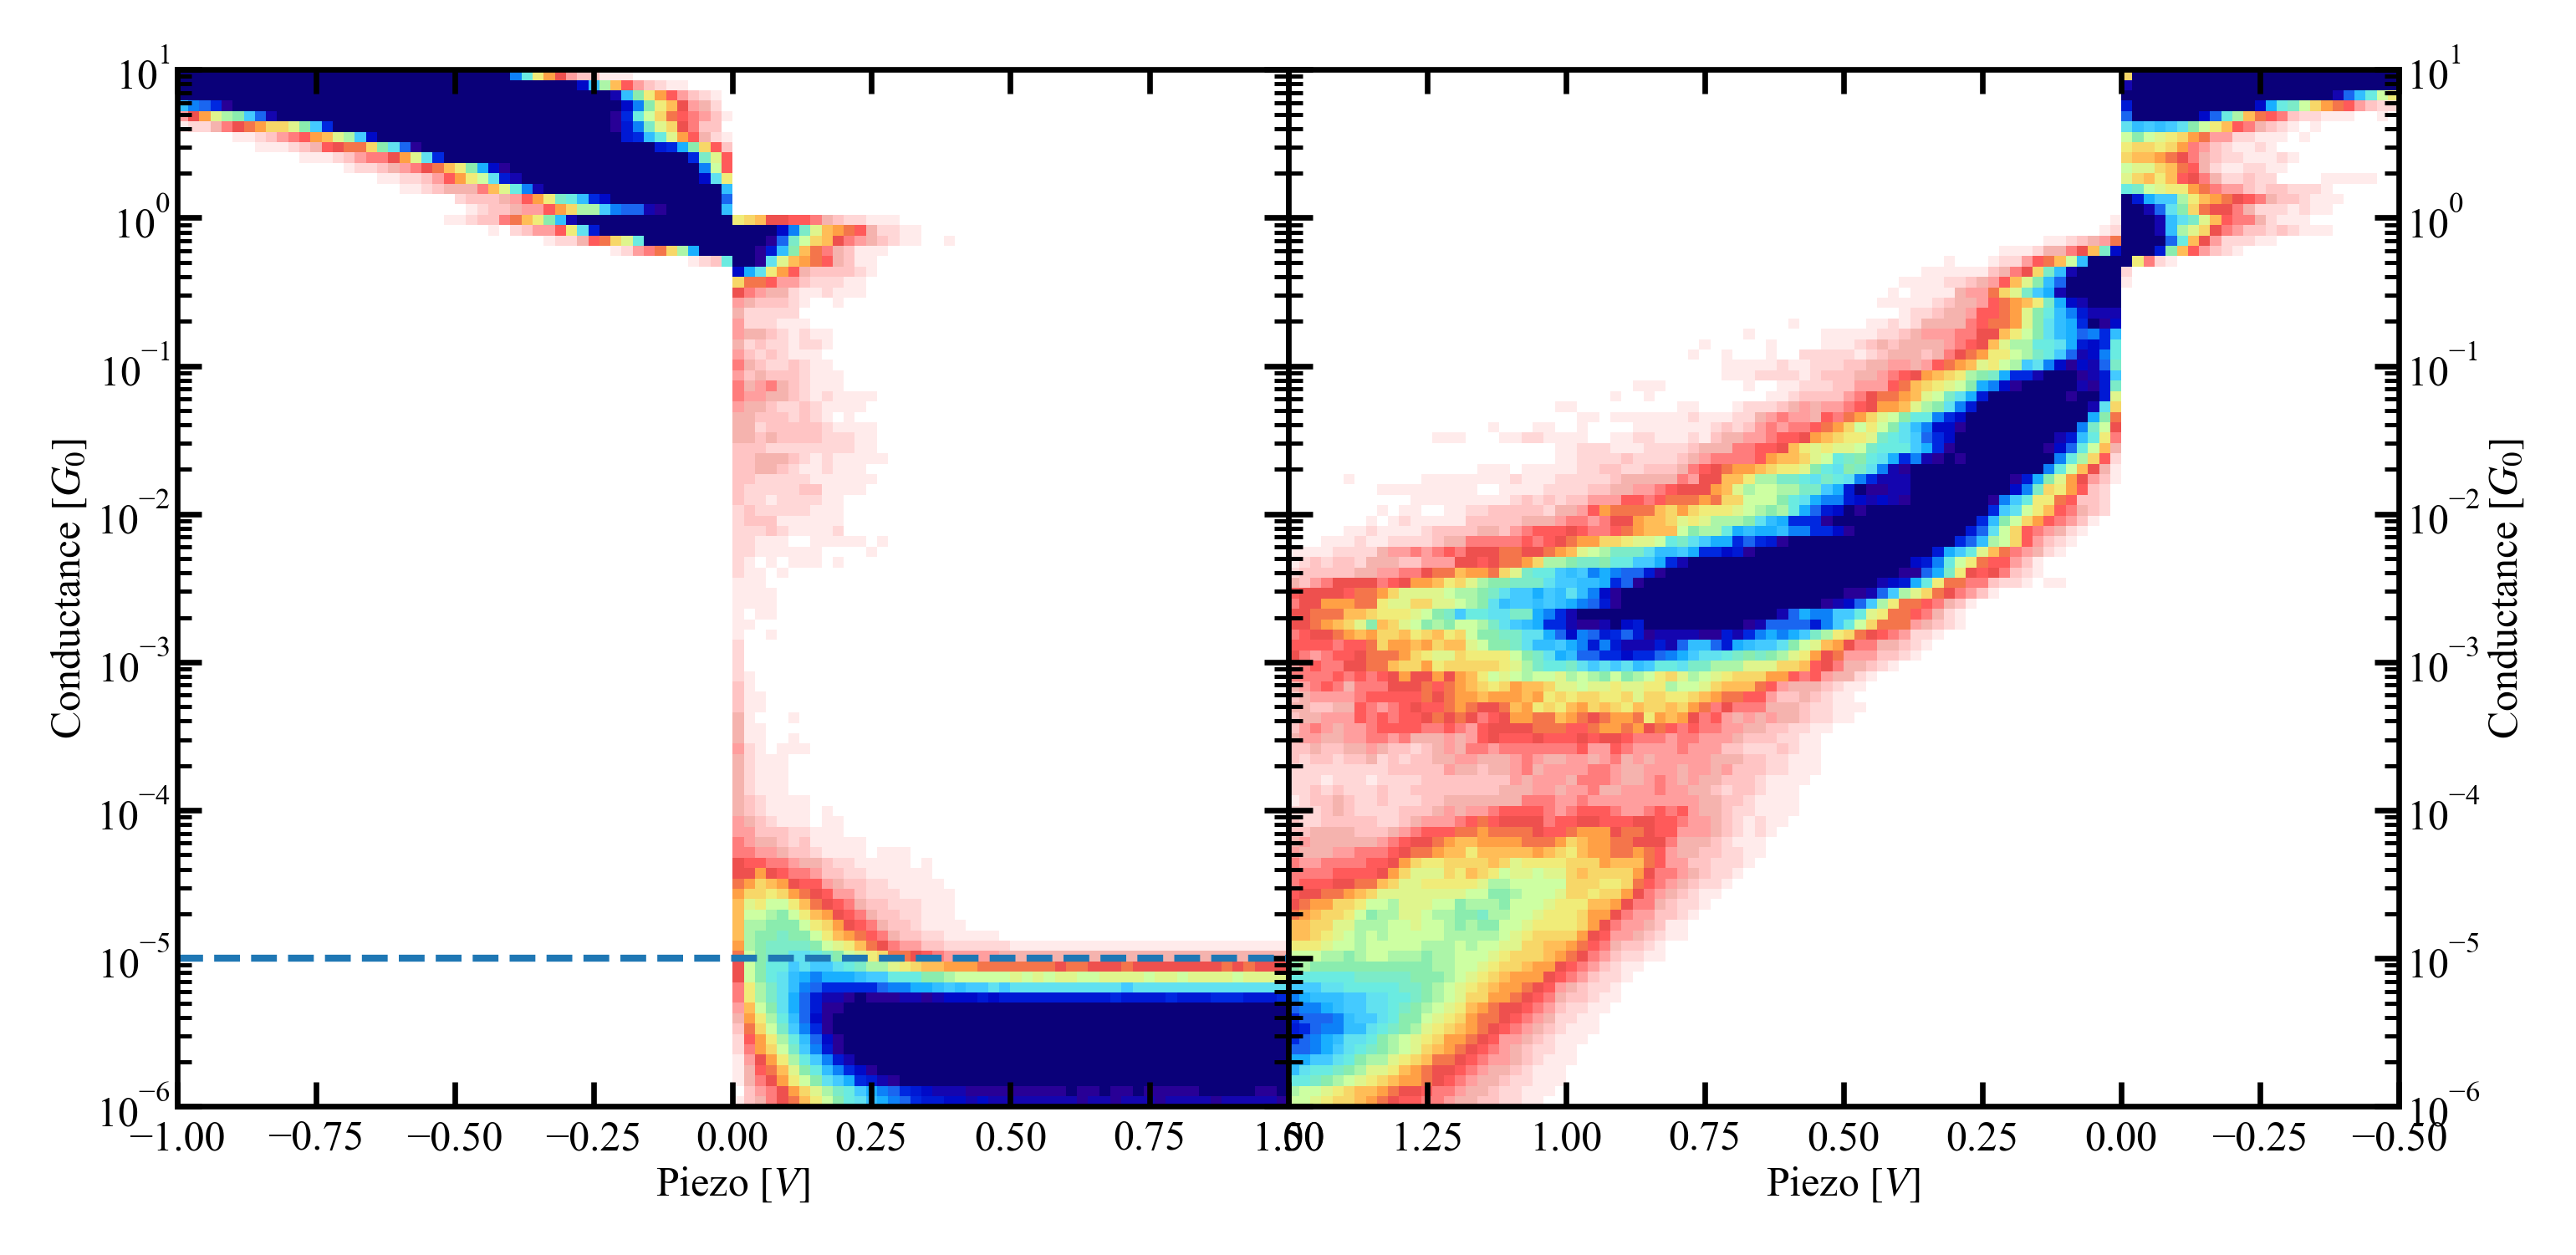

In [690]:
ax_pull, ax_push = hist3_1.plot_hist_2d_both(vmax=10000)
ax_pull.axhline(1e-5, ls='--', lw=1)

(<AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo $[V]$', ylabel='Conductance $[G_{0}]$'>)

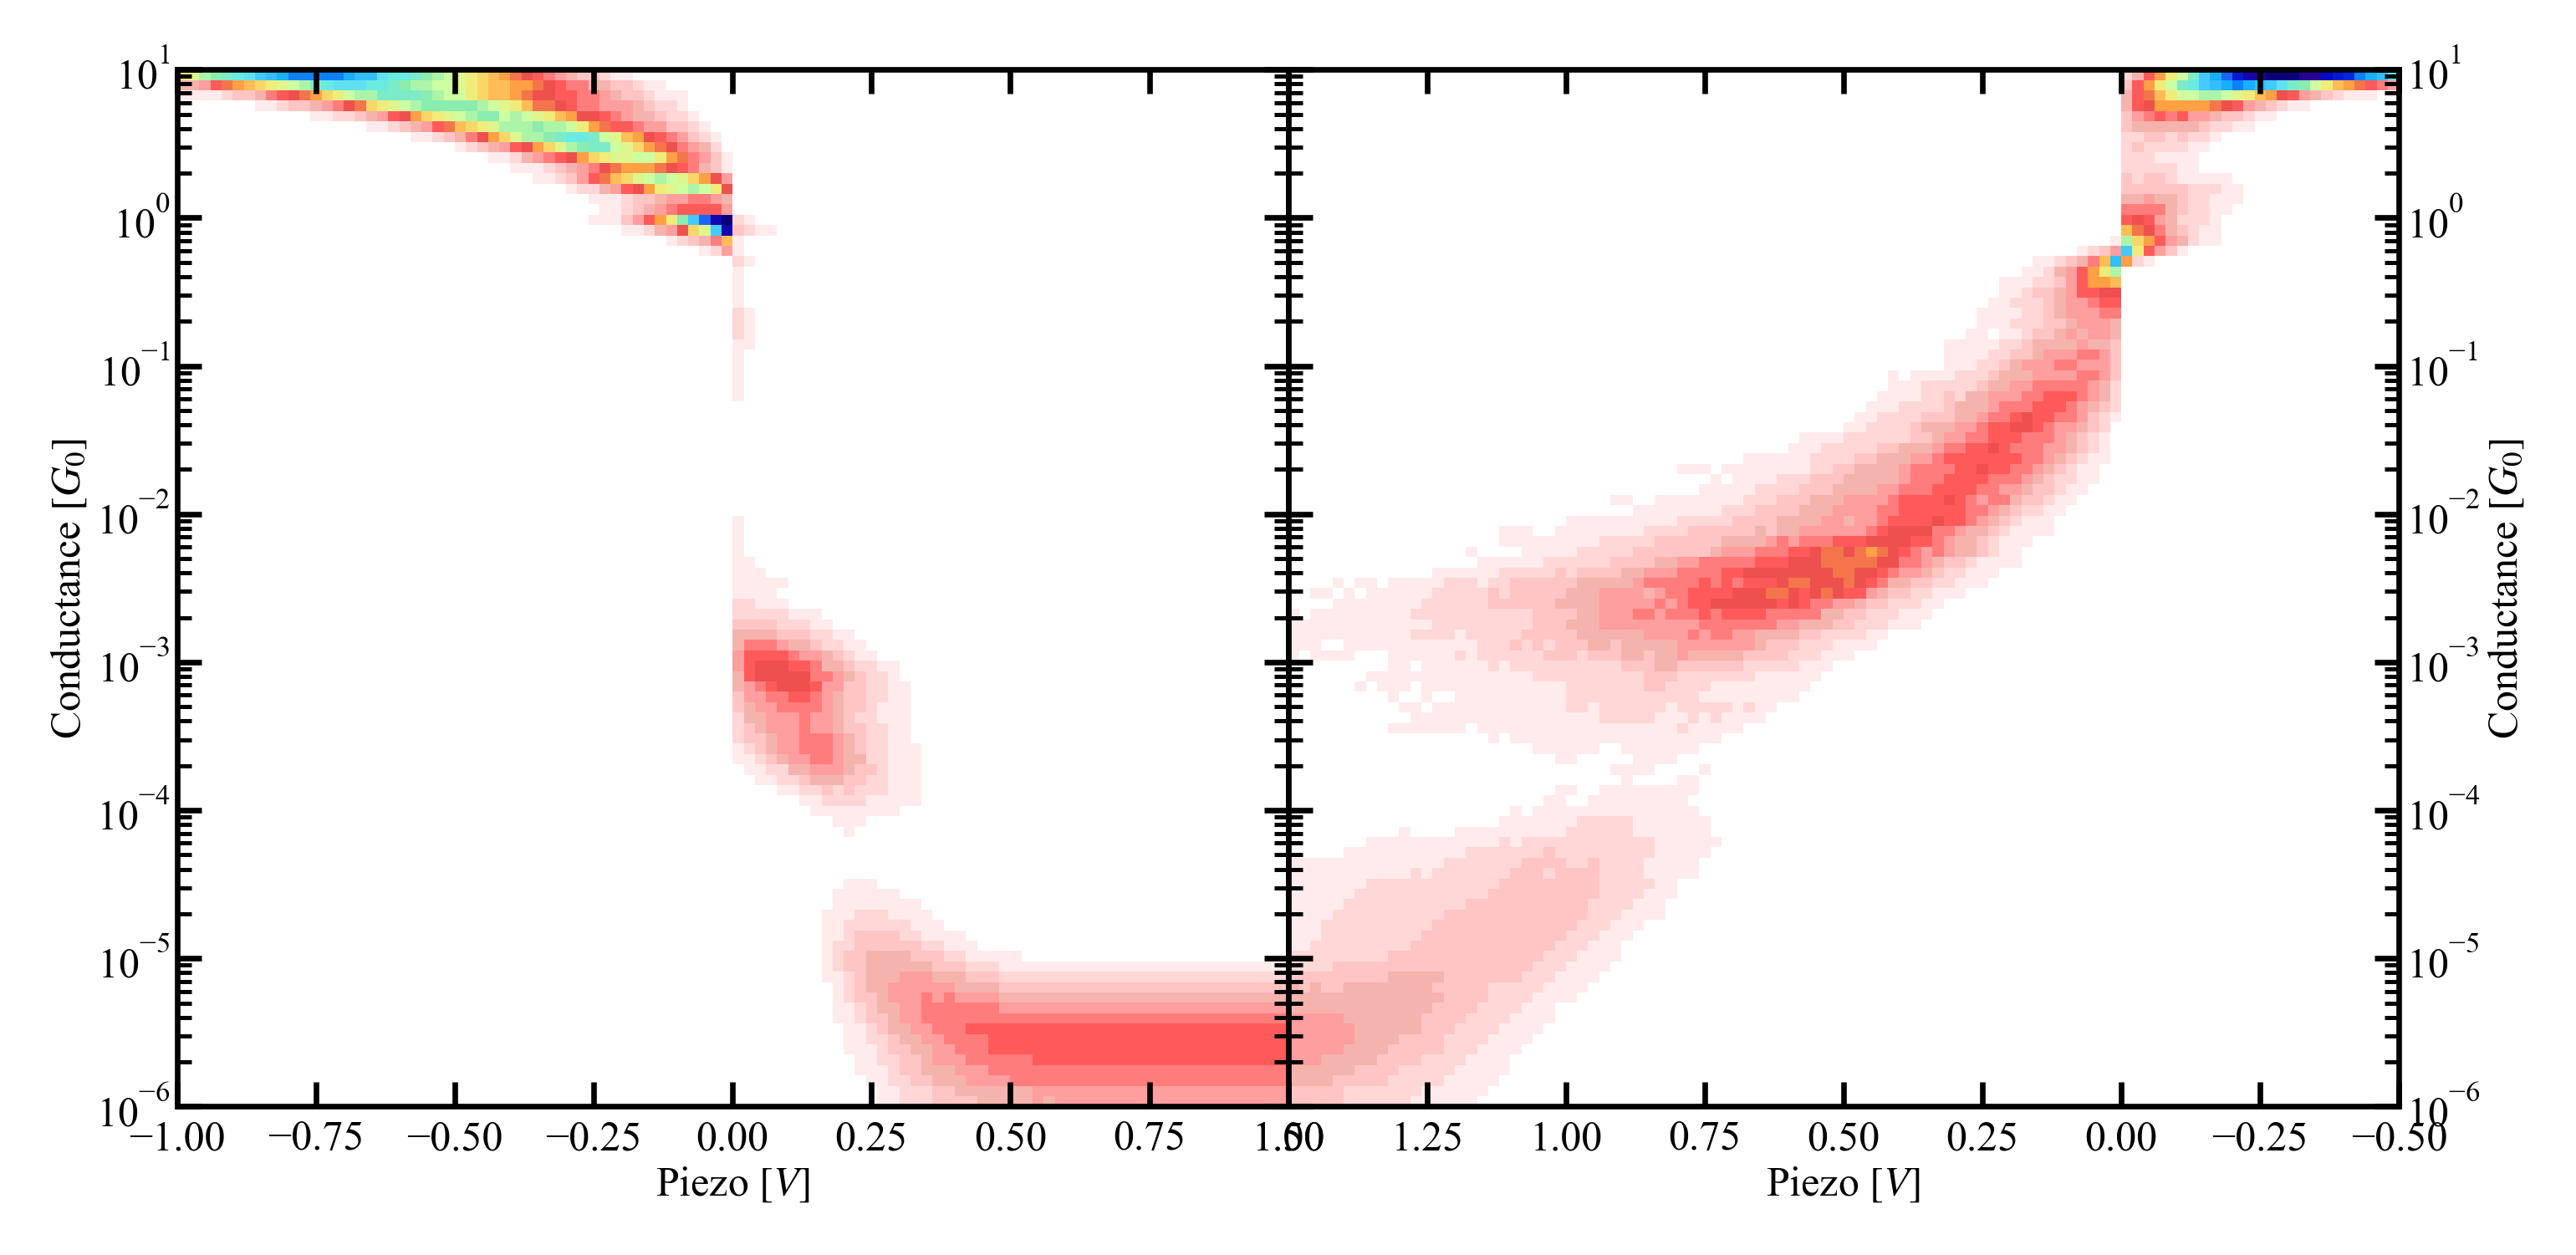

In [687]:
hist3_2.plot_hist_2d_both()

In [277]:
pc_copy = PCA(hist=hist, num_of_pcs=5)
pc_copy.calc_principal_components(direction='pull')
pc_copy.project_to_pcs()
pc_copy.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_copy.select_percentage(percentage=10, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

<AxesSubplot:>

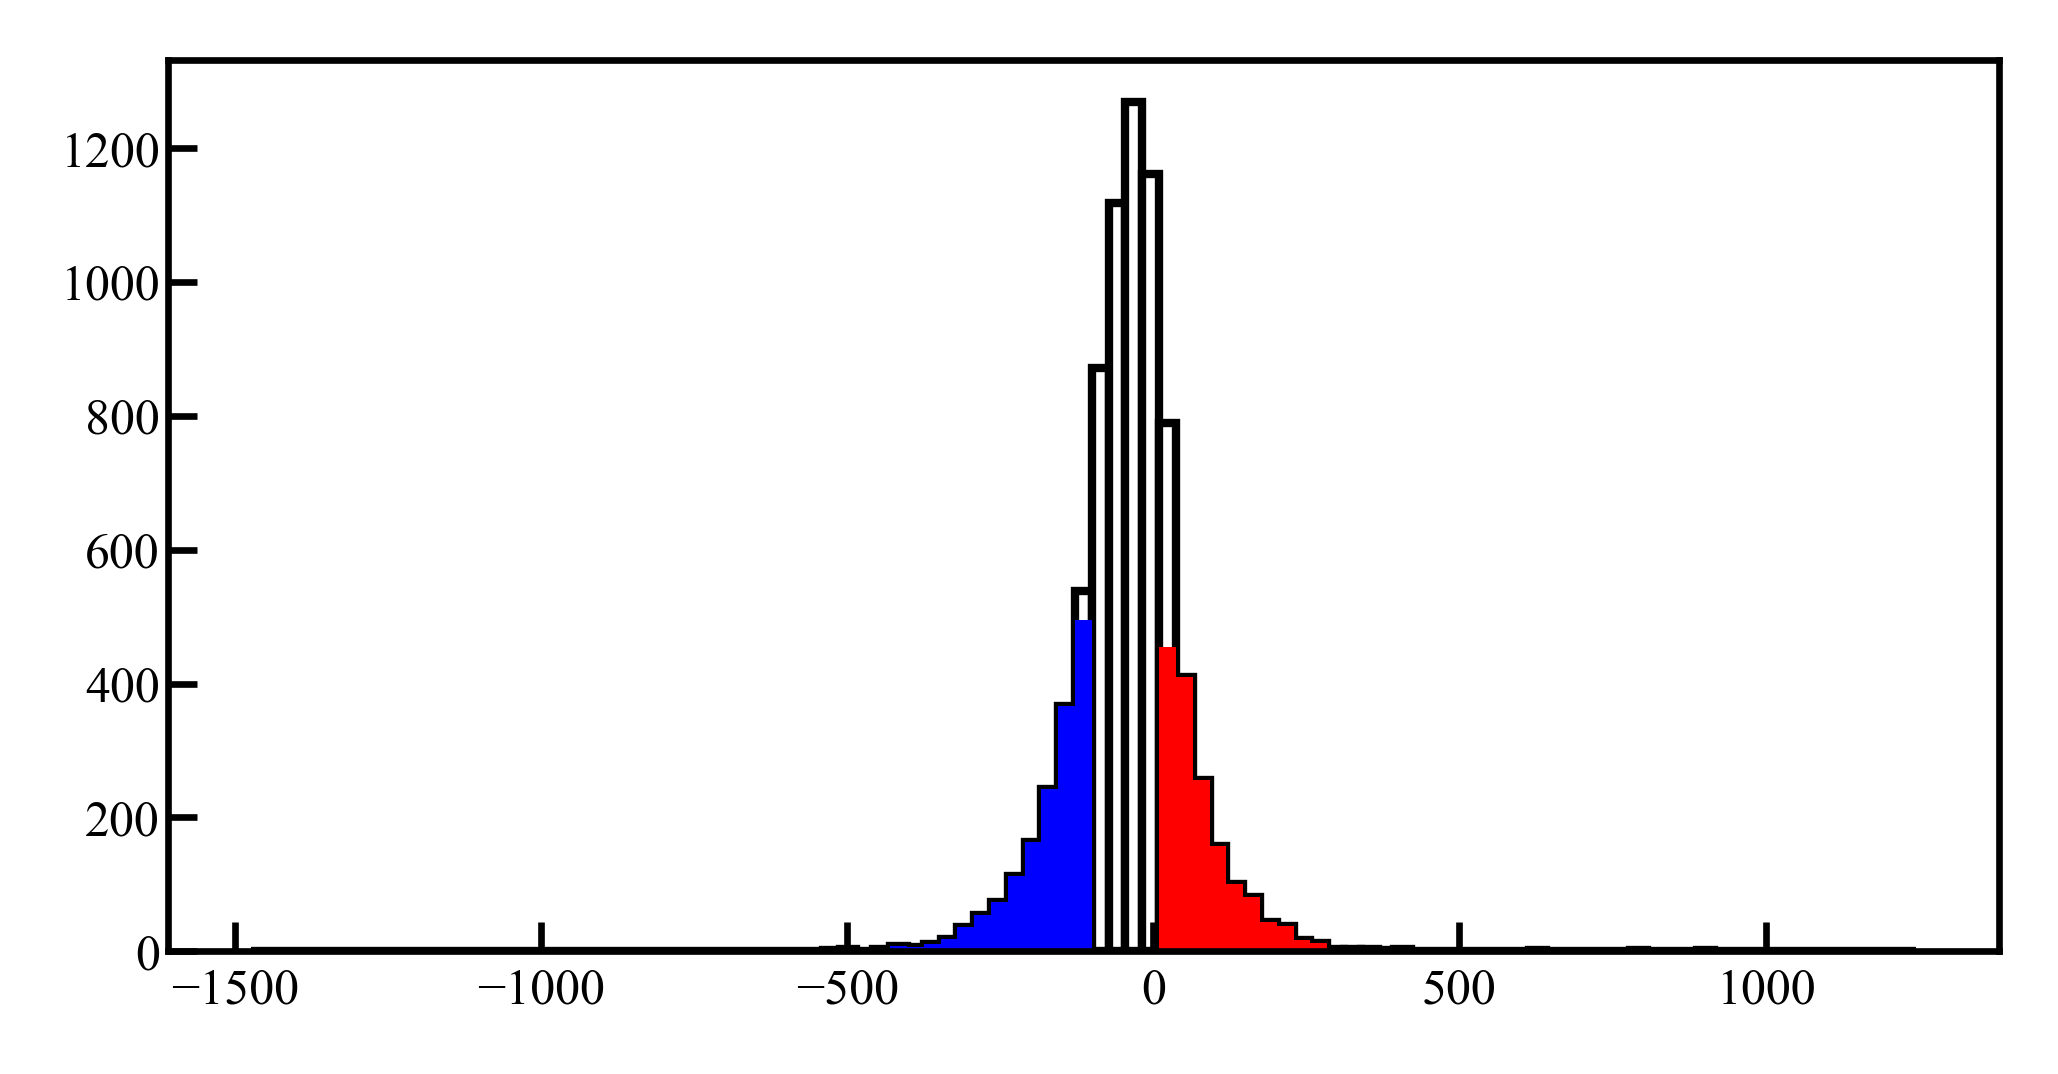

In [281]:
pc.plot_pc_hist(pc_key='PC4', plot_groups=True)

<AxesSubplot:>

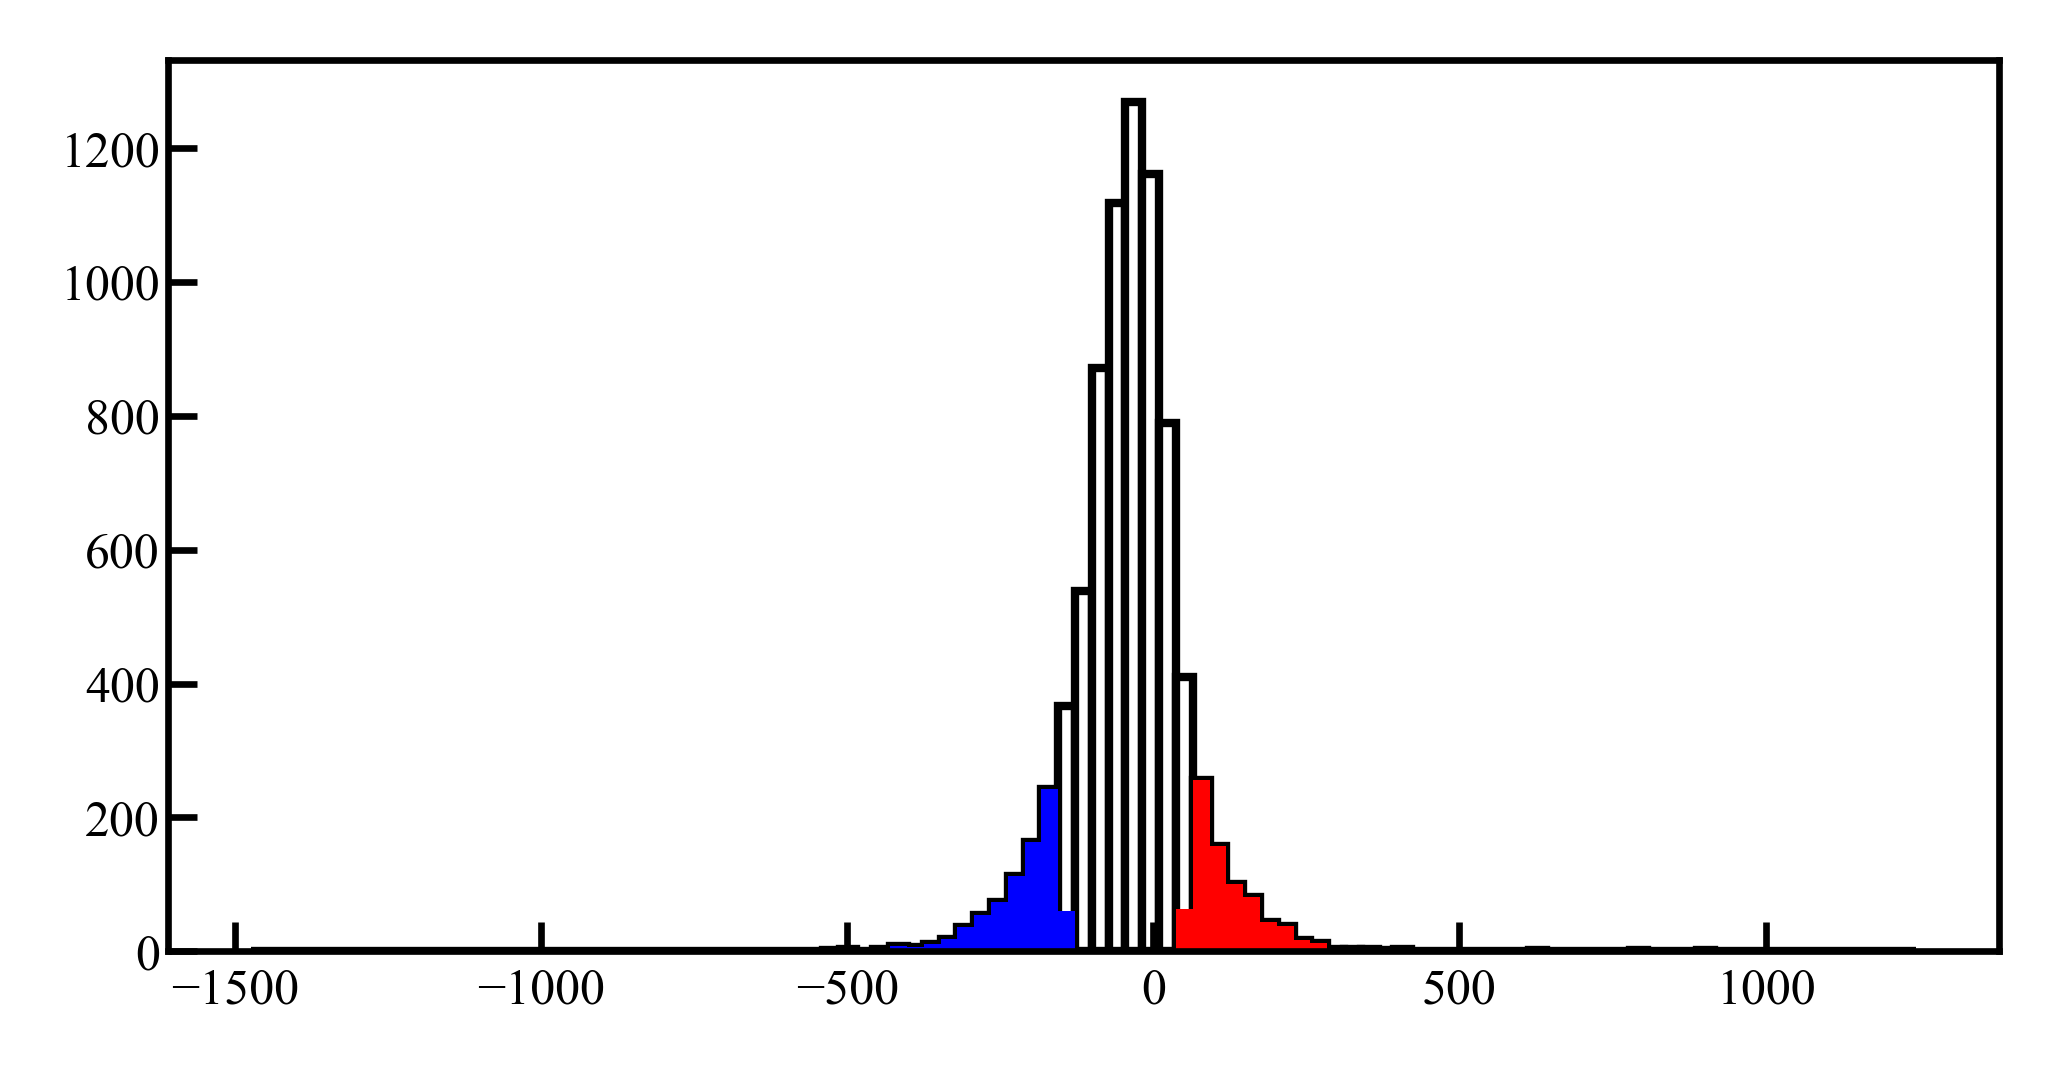

In [280]:
pc_copy.plot_pc_hist(pc_key='PC4', plot_groups=True)

In [284]:
hist_copy4_1 = Histogram(folder=home_folder,
                        traces=pc_copy.traces_group1['PC4'],
                        conductance_range=(1e-5, 10),  # 4.229e-5
                        conductance_bins_num=100,
                        conductance_bins_mode='total')

hist_copy4_2 = Histogram(folder=home_folder,
                    traces=pc_copy.traces_group2['PC4'],
                    conductance_range=(1e-5, 10),  # 4.229e-5
                    conductance_bins_num=100,
                    conductance_bins_mode='total')

In [285]:
hist_copy4_1.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

hist_copy4_2.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

  0%|          | 0/800 [00:00<?, ?it/s]

Pull 2D histogram created from 800 traces
Push 2D histogram created from 800 traces


  0%|          | 0/800 [00:00<?, ?it/s]

Pull 2D histogram created from 800 traces
Push 2D histogram created from 800 traces


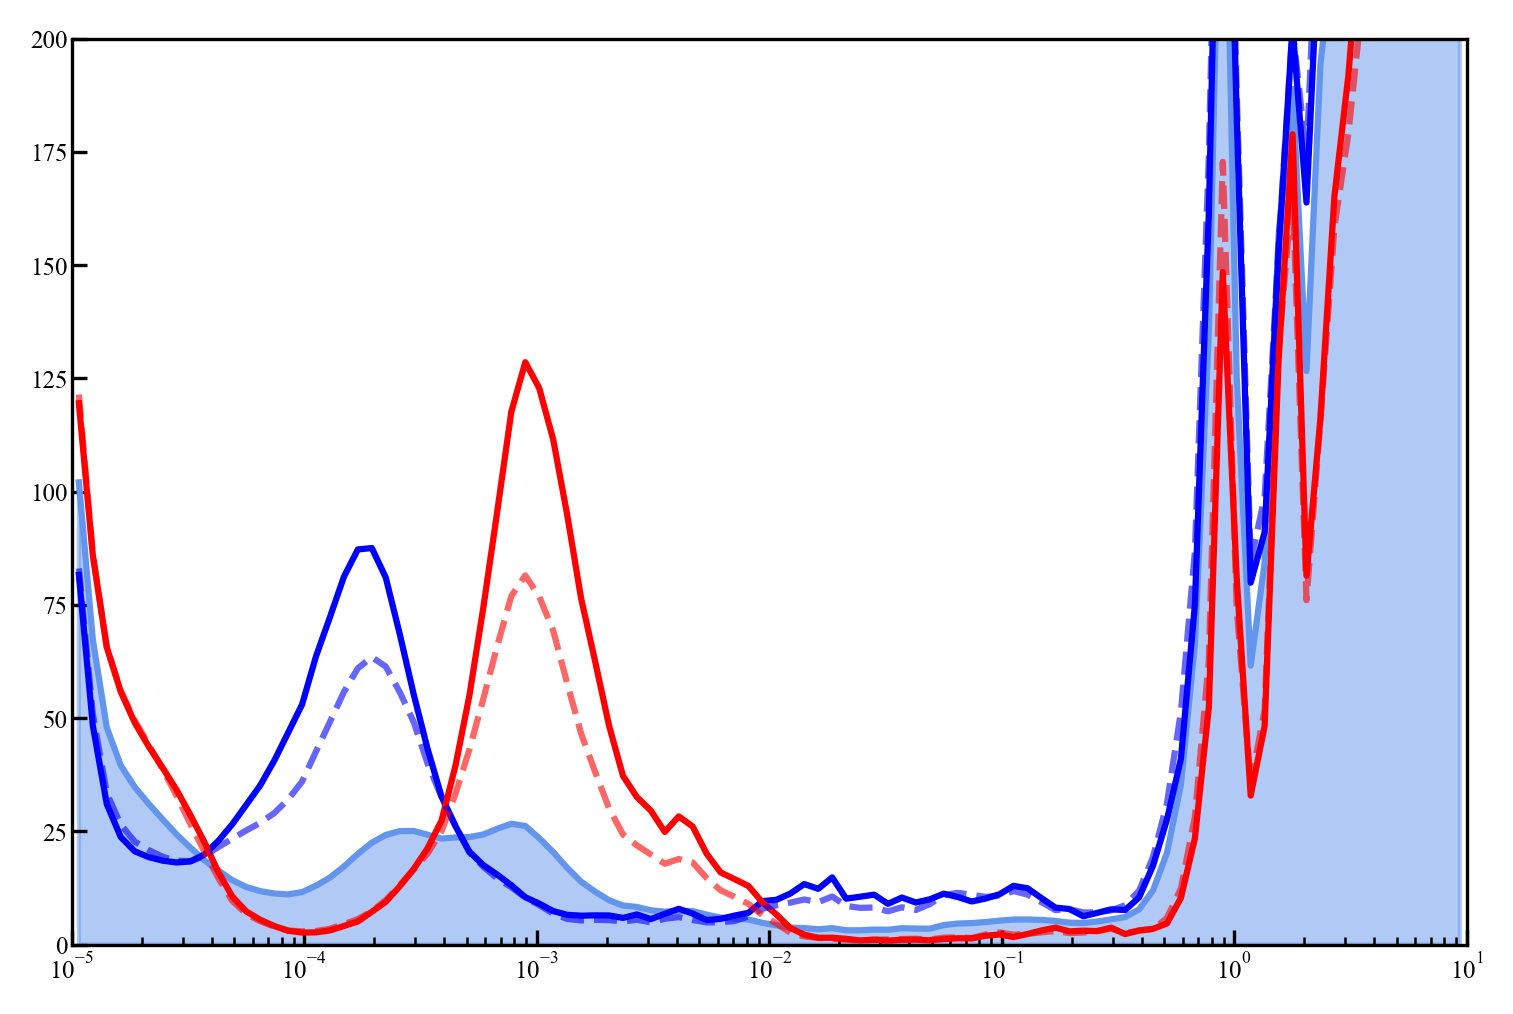

In [287]:
fig, ax4 = plt.subplots(1, dpi=300)

ax4.set_xscale('log')
ax4.set_ylim(0, 200)
ax4.set_xlim(1e-5, 10)

ax4.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='total', c='cornflowerblue')
ax4.fill_between(hist.hist_1d_bins, np.zeros_like(hist.hist_1d_pull), hist.hist_1d_pull,
                 alpha=0.5, color='cornflowerblue')

ax4.plot(hist_copy4_1.hist_1d_bins, hist_copy4_1.hist_1d_pull, label='group1', c='b')
ax4.plot(hist_copy4_2.hist_1d_bins, hist_copy4_2.hist_1d_pull, label='group2', c='r')
ax4.plot(hist4_1.hist_1d_bins, hist4_1.hist_1d_pull, label='group1', c='b', ls='--', alpha=0.6)
ax4.plot(hist4_2.hist_1d_bins, hist4_2.hist_1d_pull, label='group2', c='r', ls='--', alpha=0.6)

In [479]:
hist_pc4_both = Histogram(traces=np.hstack((pc.traces_group1['PC4'], pc.traces_group2['PC4'])),
                          folder=home_folder)

In [480]:
hist_pc4_both.calc_stats(align_at=0.5,
                         range_pull=(-1, 1),
                         range_push=(-0.5, 1.5))

  0%|          | 0/3200 [00:00<?, ?it/s]

Pull 2D histogram created from 3200 traces
Push 2D histogram created from 3200 traces


<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

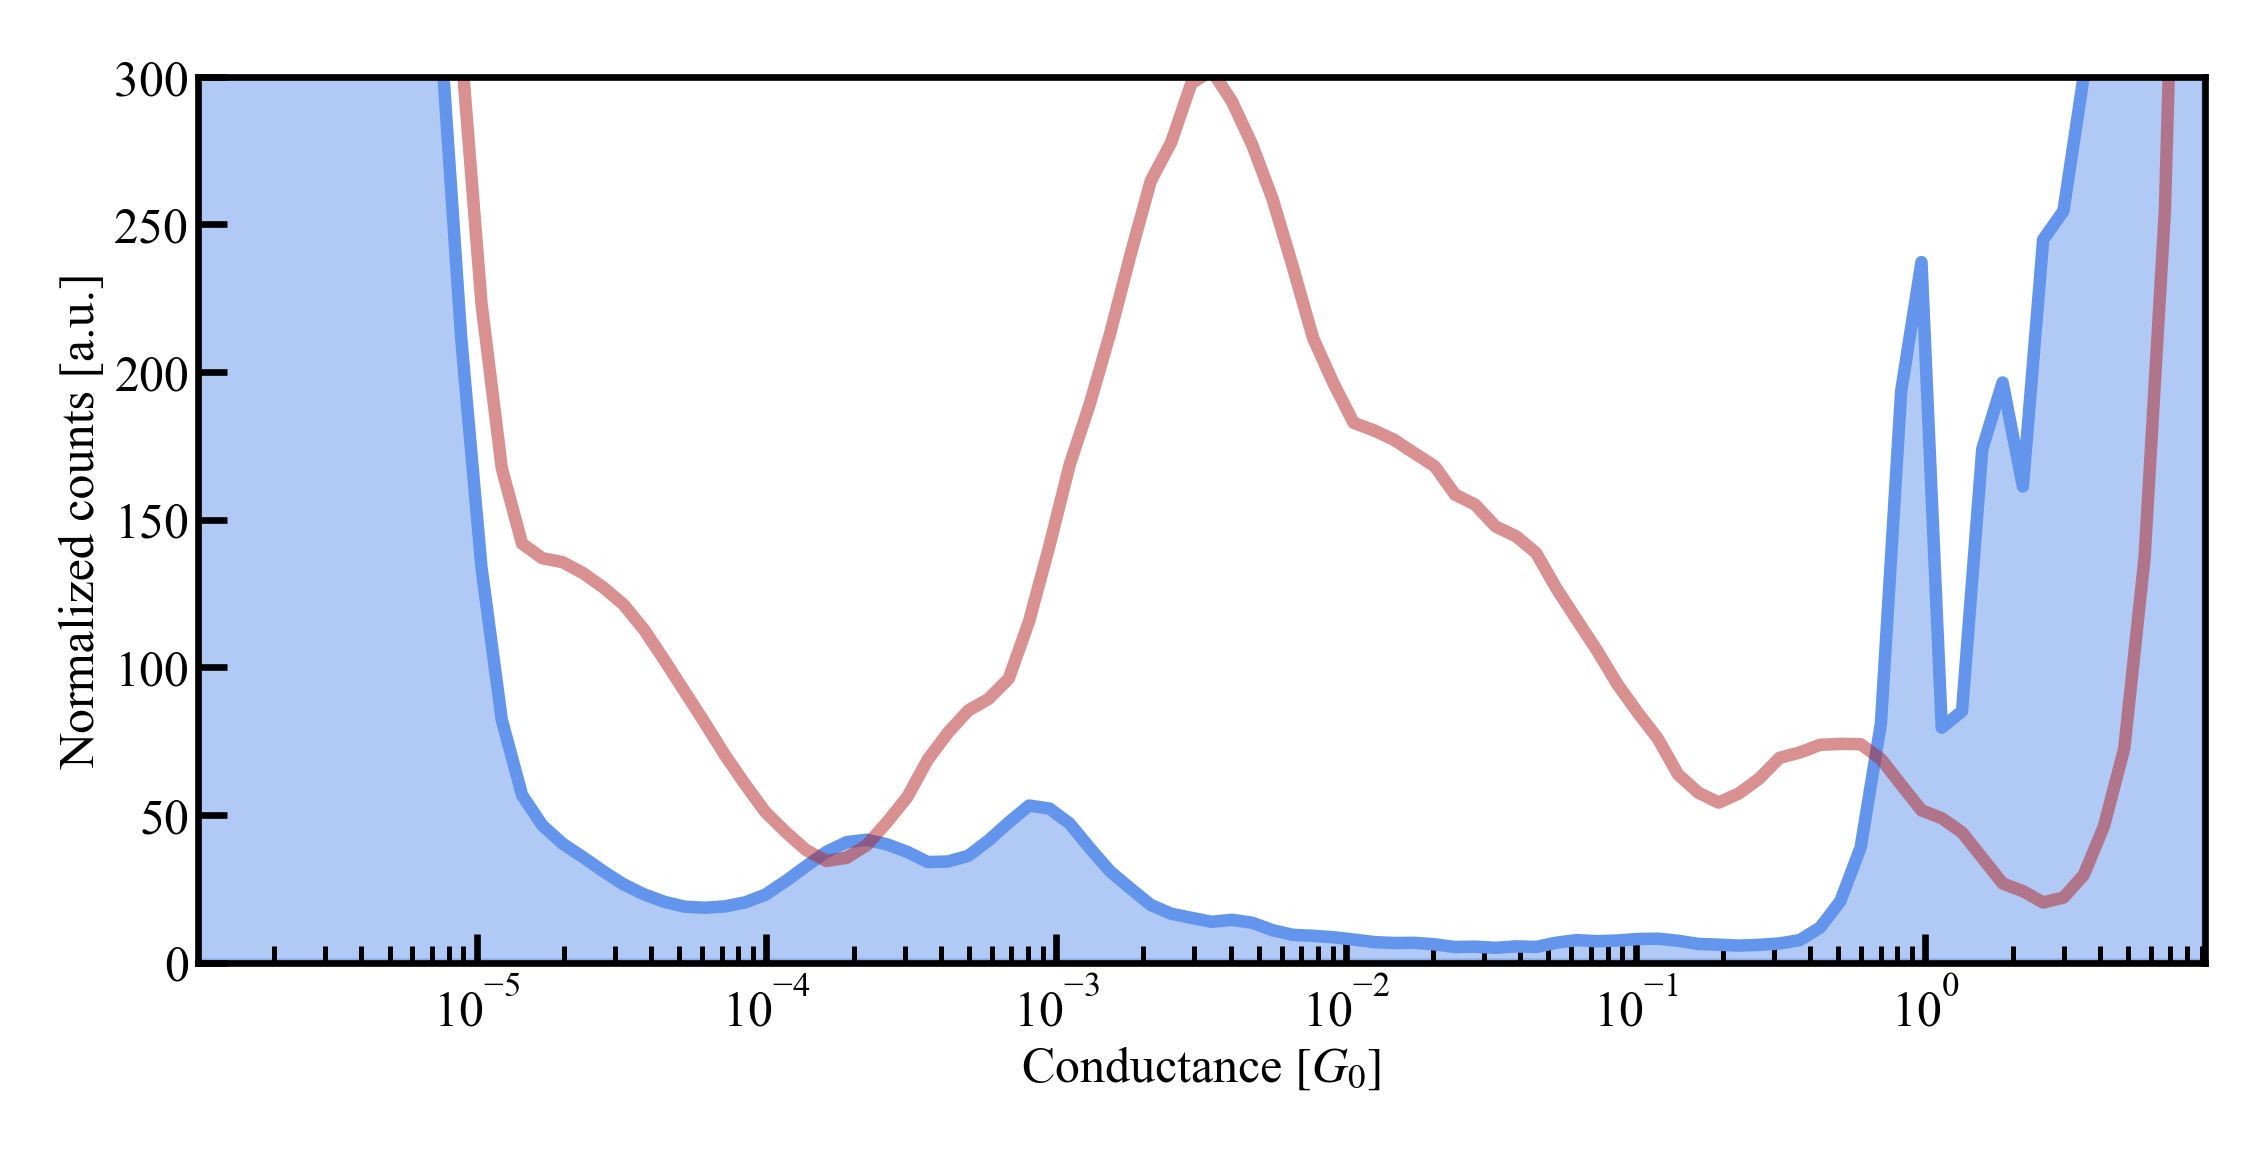

In [485]:
hist_pc4_both.plot_hist_1d(ylims=(0, 300))

# PC 4

In [627]:
# which_group = pc.traces_group1

def collect_traces(which_group, align_val=2e-2):

    cond_pull = []
    piez_pull = []

    #****************************
    ind = []

    for i, trace in enumerate(tqdm(which_group, desc='Collecting traces')):
        try:
            trace_pair=TracePair(trace, load_from=home_folder)
            trace_pair.align_trace(align_at=align_val, interpolate=True)

            cond_pull.append(trace_pair.conductance_pull[np.where(trace_pair.aligned_piezo_pull > 0)[0][0]:])
            piez_pull.append(trace_pair.aligned_piezo_pull[np.where(trace_pair.aligned_piezo_pull > 0)[0][0]:])
        except IndexError:
            print(f'Trace {trace} did not cross align val')
            ind.append(i)

    for i in reversed(ind):
        which_group = np.delete(which_group, i)
        
    return which_group, cond_pull, piez_pull

    #****************************  

def calc_2d_hist_for_collected(which_group, cond_pull, piez_pull):
    hist_2d_group = None
    for i in tqdm(range(len(which_group))):
        x_mesh, y_mesh, hist_2d_single = utils.calc_hist_2d_single(x=piez_pull[i], y=cond_pull[i], align_at=0,
                                                                    xrange=(0, 1), log_scale_x=False,
                                                                    yrange=(1e-6, 10), log_scale_y=True,
                                                                    num_bins=(100, 100),
                                                                    bin_mode_x = 'total',
                                                                    bin_mode_y = 'total')
        if hist_2d_group is None:
            hist_2d_group = hist_2d_single
        else:
            hist_2d_group += hist_2d_single
    
    return x_mesh, y_mesh, hist_2d_group

def noise_analysis(which_group, cond_pull, piez_pull, win_size=256, step_size=None, skip_points=50, end_point=3000):

    #****************************
#     win_size = 256
#     step_size = win_size//4
#     skip_points = 50
#     end_point = 3000  # 6250
    #****************************
    
    if step_size is None:
        step_size = win_size//4

    areas_pull = np.zeros((which_group.shape[0], (len(cond_pull[0][skip_points:end_point])-win_size)//step_size))
    cond_avg_in_win_pull = np.zeros((which_group.shape[0], (len(cond_pull[0][skip_points:end_point])-win_size)//step_size))
    psd_all = []

    psd_intervals = []
    ind = []

    for trace in tqdm(range(len(which_group)), desc='Noise analysis'):
        psd_intervals = []
        try:
            if len(cond_pull[trace]) > end_point+skip_points+1:
                for i in range((len(cond_pull[trace][skip_points:end_point])-win_size)//step_size):
        #             print(i)
        #             print(skip_points+i*step_size)
        #             print(skip_points+i*step_size+win_size)
        #             print('---------------------------')
                    small_interval = cond_pull[trace][skip_points+i*step_size: skip_points+i*step_size+win_size]
                    if abs(utils.log_avg(small_interval[:len(small_interval)//16]) - utils.log_avg(small_interval[-1*len(small_interval)//16:])) < np.log10(5):
                        psd_intervals.append(small_interval)
                    else:
                        psd_intervals.append(np.ones_like(small_interval)*(-1)*10**(-10))
                
                cond_avg_in_win_pull[trace] = np.array(list(map(utils.log_avg, psd_intervals)))

                fft_freqs, psd_results = scipy.signal.welch(x=psd_intervals, fs=50_000, window='hann',
                                                            nperseg=win_size, noverlap=0, nfft=None,
                                                            detrend=False, scaling='density', average='mean', axis=1)
                psd_all.append(psd_results)

                mask = np.bitwise_and(fft_freqs > 2000, fft_freqs < 5000)

                for i, psd_result in enumerate(psd_results):
                    if cond_avg_in_win_pull[trace, i] > 0:
                        areas_pull[trace, i] = scipy.integrate.trapz(psd_result[mask], x=fft_freqs[mask])
                    else:
                        areas_pull[trace, i] = (-1)*10**(-10)
            else:
                raise utils.MyException('shit happens')
        except utils.MyException:
            ind.append(trace)
            print(f'asd {trace}')
    print(f'gfhf{ind}')
    for i in reversed(ind):
        print(f'deleting {i}')
        areas_pull = np.delete(areas_pull, i, 0)
        cond_avg_in_win_pull = np.delete(cond_avg_in_win_pull, i, 0)

    psd_all = np.array(psd_all)
    
    return areas_pull, cond_avg_in_win_pull 

In [297]:
updated_group_4_1, cond_pull_4_1, piez_pull_4_1 = collect_traces(pc.traces_group1['PC4'], align_val=2e-3)

In [298]:
x_mesh_4_1, y_mesh_4_1, hist_2d_group_4_1 = calc_2d_hist_for_collected(which_group=updated_group_4_1, cond_pull=cond_pull_4_1, piez_pull=piez_pull_4_1)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [628]:
areas_pull_4_1, cond_avg_in_win_pull_4_1 = noise_analysis(which_group=updated_group_4_1,
                                                          cond_pull=cond_pull_4_1,
                                                          piez_pull=piez_pull_4_1,
                                                          win_size=256, step_size=None,
                                                          skip_points=200, end_point=3000)

Noise analysis:   0%|          | 0/1600 [00:00<?, ?it/s]

D:\Greta\mcbj_stm-bj\utils.py:1095: RuntimeWarning: invalid value encountered in log10
  return 10**np.mean(np.log10(arr), **kwargs)


gfhf[]


In [301]:
updated_group_4_2, cond_pull_4_2, piez_pull_4_2 = collect_traces(pc.traces_group2['PC4'], align_val=2e-2)

In [302]:
x_mesh_4_2, y_mesh_4_2, hist_2d_group_4_2 = calc_2d_hist_for_collected(which_group=updated_group_4_2, cond_pull=cond_pull_4_2, piez_pull=piez_pull_4_2)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [629]:
areas_pull_4_2, cond_avg_in_win_pull_4_2 = noise_analysis(which_group=updated_group_4_2,
                                                          cond_pull=cond_pull_4_2,
                                                          piez_pull=piez_pull_4_2,
                                                          win_size=256, step_size=None,
                                                          skip_points=50, end_point=3000)

Noise analysis:   0%|          | 0/1600 [00:00<?, ?it/s]

asd 1447
gfhf[1447]
deleting 1447


In [116]:
updated_group, cond_pull_5_1, piez_pull_5_1 = collect_traces(pc.traces_group1['PC5'], align_val=2e-2)

In [117]:
hist_2d_group_5_1 = calc_2d_hist_for_collected(which_group=updated_group, cond_pull=cond_pull_5_1, piez_pull=piez_pull_5_1)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [118]:
areas_pull_5_1, cond_avg_in_win_pull_5_1 = noise_analysis(which_group=updated_group,
                                                          cond_pull=cond_pull_5_1,
                                                          piez_pull=piez_pull_5_1,
                                                          win_size=256, step_size=None,
                                                          skip_points=50, end_point=3000)

Noise analysis:   0%|          | 0/1600 [00:00<?, ?it/s]

In [112]:
updated_group, cond_pull_5_2, piez_pull_5_2 = collect_traces(pc.traces_group2['PC5'], align_val=2e-2)

In [113]:
hist_2d_group_5_2 = calc_2d_hist_for_collected(which_group=updated_group, cond_pull=cond_pull_5_2, piez_pull=piez_pull_5_2)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [114]:
areas_pull_5_2, cond_avg_in_win_pull_5_2 = noise_analysis(which_group=updated_group,
                                                          cond_pull=cond_pull_5_2,
                                                          piez_pull=piez_pull_5_2,
                                                          win_size=256, step_size=None,
                                                          skip_points=50, end_point=3000)

Noise analysis:   0%|          | 0/1600 [00:00<?, ?it/s]

asd
deleting 41


In [567]:
G_high = (6e-4, 2e-3)
G_low = (5e-5, 2e-4)

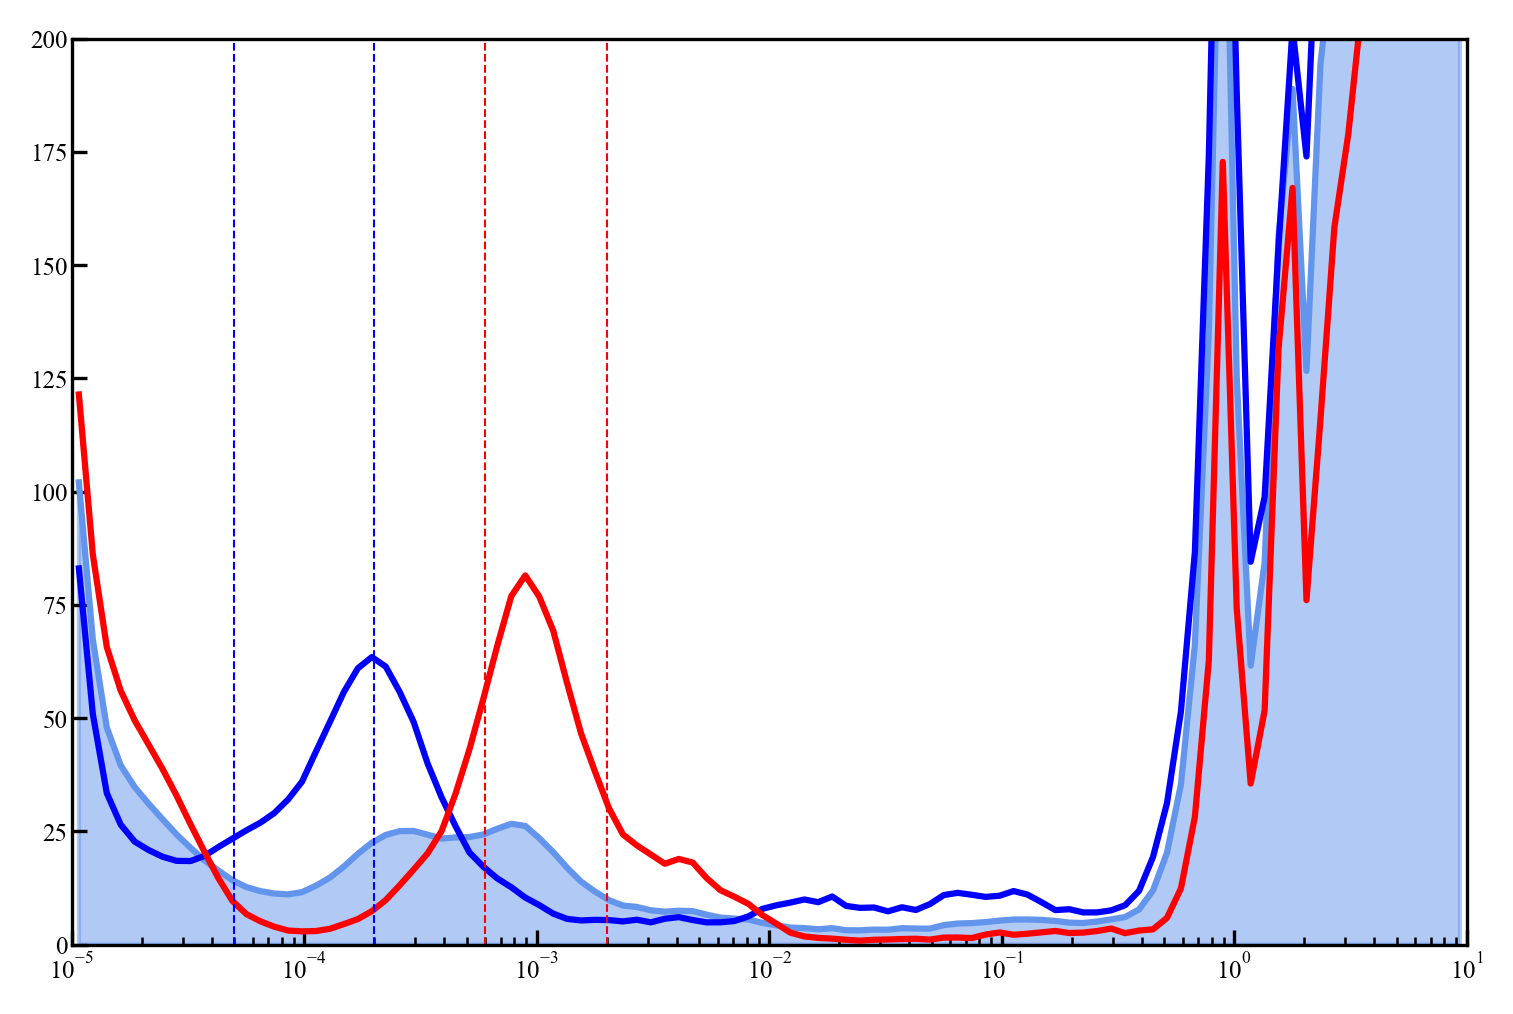

In [684]:
fig, ax4 = plt.subplots(1, dpi=300)
ax4.set_xscale('log')
ax4.set_ylim(0, 200)
ax4.set_xlim(1e-5, 10)

ax4.plot(hist.hist_1d_bins, hist.hist_1d_pull, label='total', c='cornflowerblue')
ax4.fill_between(hist.hist_1d_bins, np.zeros_like(hist.hist_1d_pull), hist.hist_1d_pull,
                 alpha=0.5, color='cornflowerblue')
ax4.plot(hist4_1.hist_1d_bins, hist4_1.hist_1d_pull, label='group1', c='b')
ax4.plot(hist4_2.hist_1d_bins, hist4_2.hist_1d_pull, label='group2', c='r')

ax4.axvline(G_high[0], ls='--', c='r', lw=0.5)
ax4.axvline(G_high[1], ls='--', c='r', lw=0.5)
ax4.axvline(G_low[0], ls='--', c='b', lw=0.5)
ax4.axvline(G_low[1], ls='--', c='b', lw=0.5)

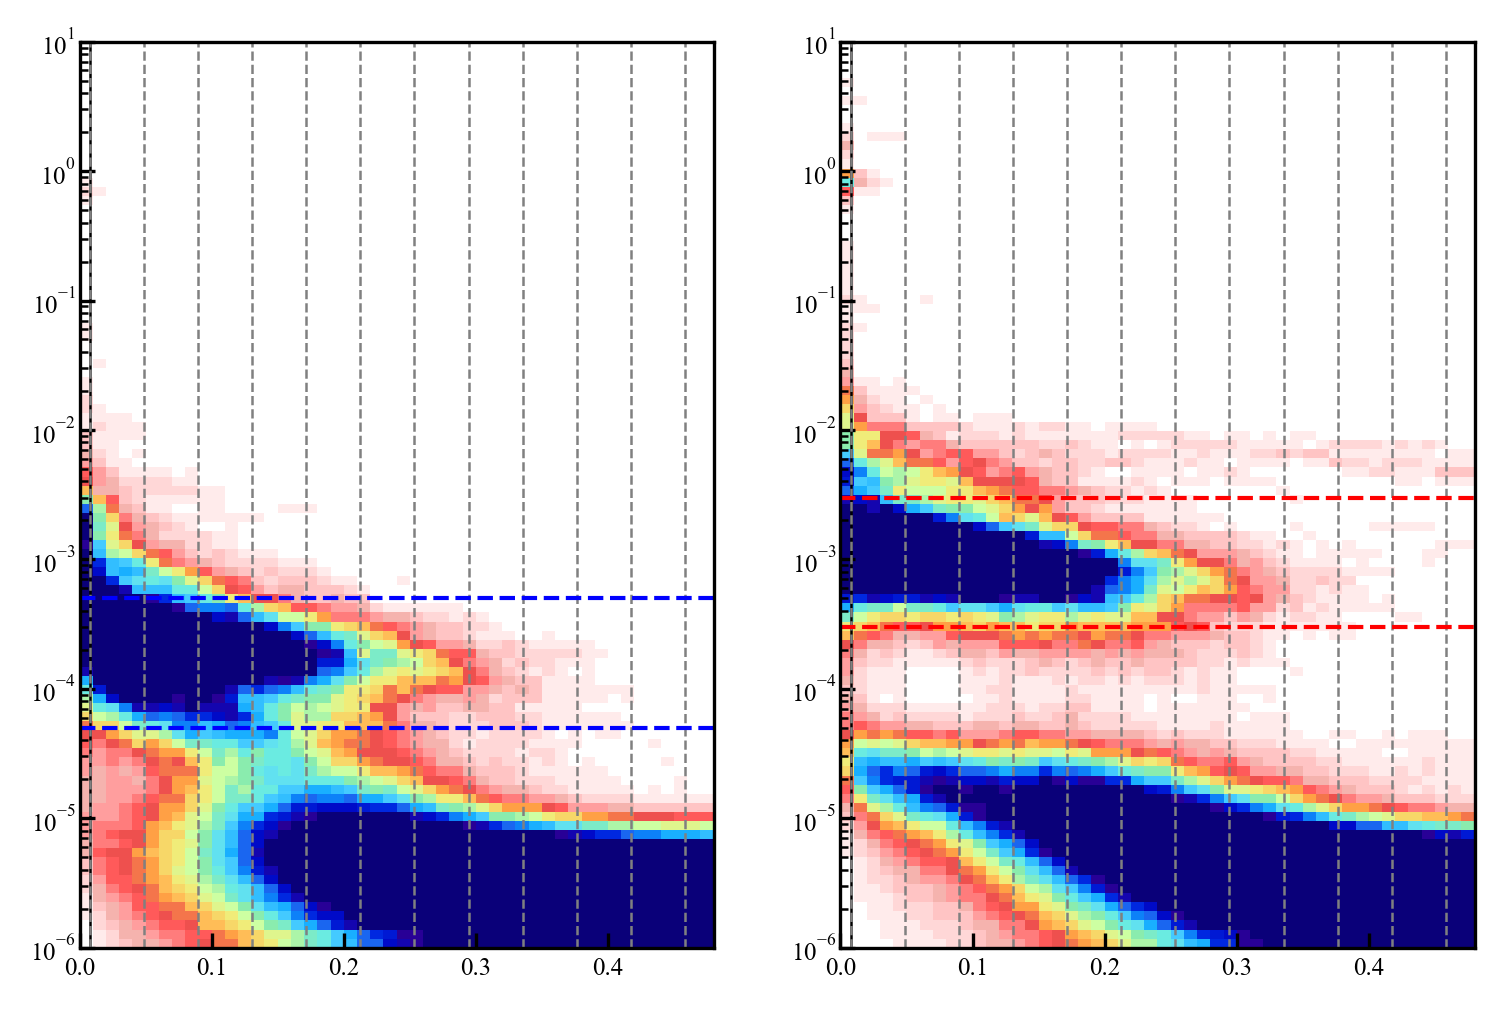

In [310]:
fig, ax = plt.subplots(ncols=2, dpi=300)
ax[0].pcolormesh(x_mesh, y_mesh, hist_2d_group_4_1, cmap=utils.cmap_geo32, vmax=3000)
ax[0].set_yscale('log')
ax[0].set_xlim(0, trace_pair.rate*3000/trace_pair.sample_rate)
# ax[0].axhline(8e-5, ls='--', lw=0.6, c='grey')
ax[0].axvline(piez_pull_4_1[0][50], ls='-', lw=0.6, c='black')

for i in piez_pull_4_1[0][50::256]:
    ax[0].axvline(i, ls='--', lw=0.6, c='grey')

ax[1].pcolormesh(x_mesh_4_2, y_mesh_4_2, hist_2d_group_4_2, cmap=utils.cmap_geo32, vmax=3000)
ax[1].set_yscale('log')
ax[1].set_xlim(0, trace_pair.rate*3000/trace_pair.sample_rate)
# ax[1].axhline(8e-5, ls='--', lw=0.6, c='grey')
ax[1].axvline(piez_pull_4_2[0][50], ls='-', lw=0.6, c='black')

for i in piez_pull_4_2[0][50::256]:
    ax[1].axvline(i, ls='--', lw=0.6, c='grey')
    
# ax[1].axhline(5e-4)

ax[1].axhline(G_high[0], ls='--', c='r', lw=1)
ax[1].axhline(G_high[1], ls='--', c='r', lw=1)
ax[0].axhline(G_low[0], ls='--', c='b', lw=1)
ax[0].axhline(G_low[1], ls='--', c='b', lw=1)
    
# parx=ax.twinx()
# parx.plot(piez_pull[0][skip_points+win_size//2:end_point-win_size//2:step_size], n_pull)

In [316]:
mask_4_1 = np.bitwise_and(cond_avg_in_win_pull_4_1.flatten() > G_low[0], cond_avg_in_win_pull_4_1.flatten() < G_low[1])
mask_4_2 = np.bitwise_and(cond_avg_in_win_pull_4_2.flatten() > G_high[0], cond_avg_in_win_pull_4_2.flatten() < G_high[1])

N = np.linspace(0, 2.2, num=1000)
try:
    pull_corr_1 = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group1')):
        pull_corr_1[i] = utils.calc_correlation(np.log10(areas_pull_4_1.flatten()[mask_4_1]/cond_avg_in_win_pull_4_1.flatten()[mask_4_1]**n),
                                              np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_4_1]))

    n_pull_4_1 = N[abs(pull_corr_1) == min(abs(pull_corr_1))][0]
except IndexError:
    print(pull_corr_1)
    
try:
    pull_corr_2 = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group2')):
        pull_corr_2[i] = utils.calc_correlation(np.log10(areas_pull_4_2.flatten()[mask_4_2]/cond_avg_in_win_pull_4_2.flatten()[mask_4_2]**n),
                                                np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_4_2]))

    n_pull_4_2 = N[abs(pull_corr_2) == min(abs(pull_corr_2))][0]
except IndexError:
    print(i)
    print(pull_corr_2)

group1:   0%|          | 0/1000 [00:00<?, ?it/s]

group2:   0%|          | 0/1000 [00:00<?, ?it/s]

In [317]:
print(n_pull_4_1)
print(n_pull_4_2)

1.4116116116116117
1.6032032032032033


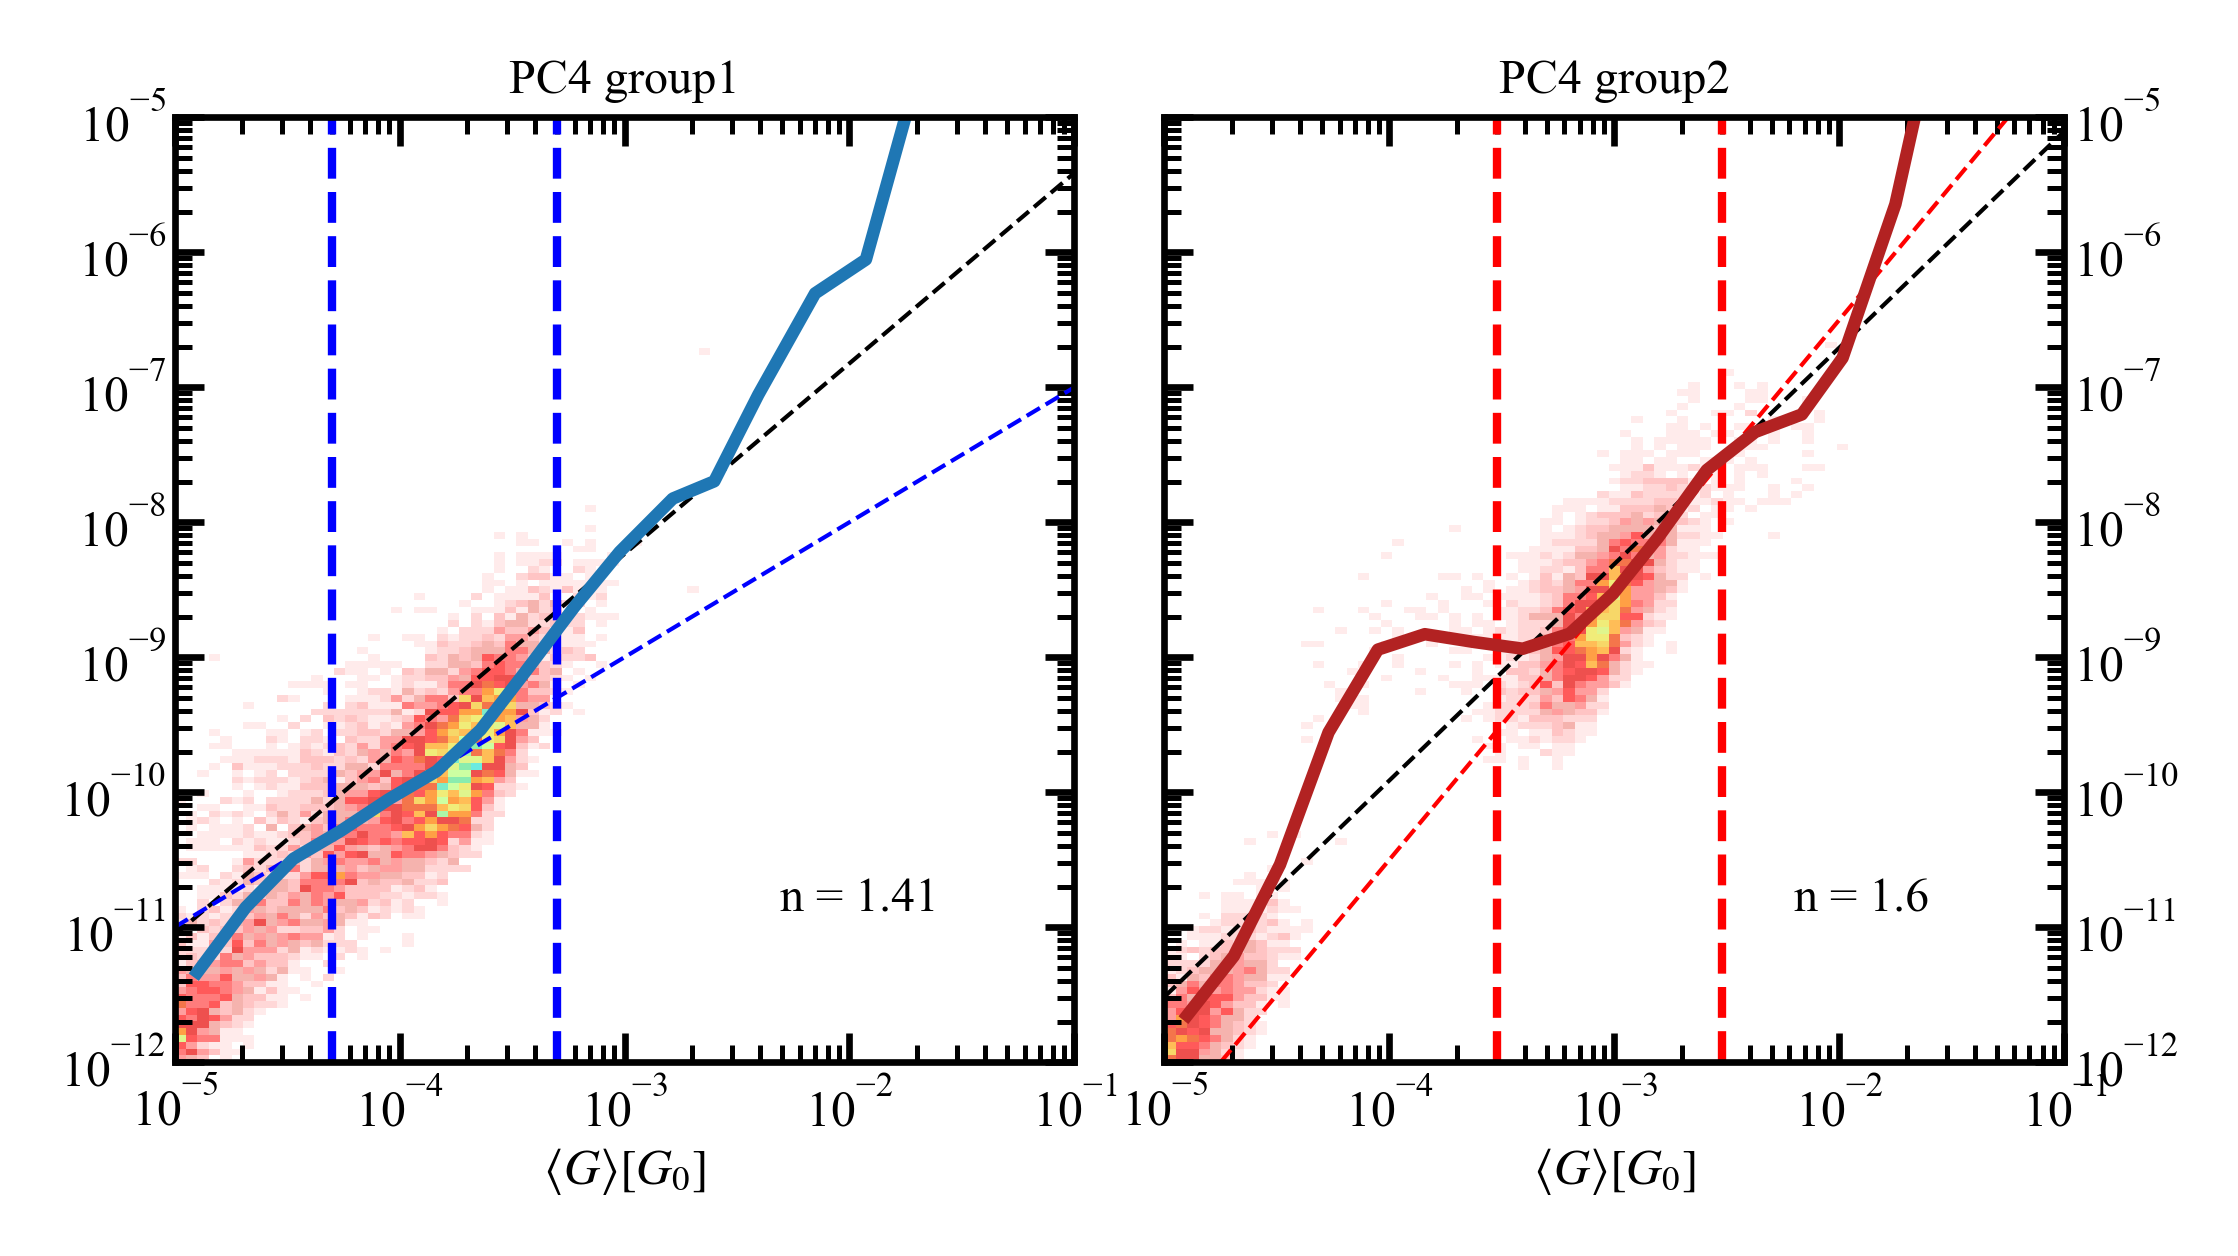

In [403]:
fig = plt.figure(figsize=utils.cm2inch(10, 5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2.set_title('PC4 group2', fontsize='xx-small', pad=3)



plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_1.flatten(),
                              noise_power=areas_pull_4_1.flatten(),
                              n=n_pull_4_1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1, cmap=utils.cmap_geo32, vmax=100)


mask = cond_avg_in_win_pull_4_2.flatten() > 0

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_2.flatten(),
                              noise_power=areas_pull_4_2.flatten(),
                              n=n_pull_4_2,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(20, 20), shift=-3.5, normalize=False, axis=ax2, cmap=utils.cmap_geo32, vmax=200)

xbins=np.logspace(-5, -1, num=20)
shift1=-6
shift2=-2.5
ax1.plot(xbins, 10 ** (1 * np.log10(xbins) + shift1), c='b', ls='--', lw=0.5)
ax2.plot(xbins, 10 ** (2 * np.log10(xbins) + shift2), c='r', ls='--', lw=0.5)

ax2.axvline(G_high[0], ls='--', c='r', lw=1)
ax2.axvline(G_high[1], ls='--', c='r', lw=1)
ax1.axvline(G_low[0], ls='--', c='b', lw=1)
ax1.axvline(G_low[1], ls='--', c='b', lw=1)

ax1.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax2.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

# ax1.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0] + noise_log_std_4_1[cond_mean_4_1 > 0], lw=0.5)
# ax1.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0] - noise_log_std_4_1[cond_mean_4_1 > 0], lw=0.5)

# ax2.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0] + noise_log_std_4_2[cond_mean_4_2 > 0], lw=0.5, c='Firebrick')
# ax2.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0] - noise_log_std_4_2[cond_mean_4_2 > 0], lw=0.5, c='Firebrick')

In [489]:
areas_pull_both = np.hstack((areas_pull_4_1.flatten(), areas_pull_4_2.flatten()))
cond_avg_in_win_pull_both = np.hstack((cond_avg_in_win_pull_4_1.flatten(), cond_avg_in_win_pull_4_2.flatten()))

In [396]:
noise_mean_4_1 = np.zeros(len(xbins)-1)
noise_std_4_1 = np.zeros(len(xbins)-1)
noise_log_std_4_1 = np.zeros(len(xbins)-1)
cond_mean_4_1 = np.zeros(len(xbins)-1)
cond_std_4_1 = np.zeros(len(xbins)-1)
noise_log_mean_4_1 = np.zeros(len(xbins)-1)
cond_log_mean_4_1 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_1.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_1.flatten() < xbins[i+1]))
    if len(areas_pull_4_1.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_1[i] = 10**np.mean(np.log10(areas_pull_4_1.flatten()[mask_x1[i]]))
        noise_log_std_4_1[i] = np.sqrt(utils.log_avg(abs(areas_pull_4_1.flatten()-noise_mean_4_1[i])**2))
        noise_log_mean_4_1[i] = utils.log_avg(areas_pull_4_1.flatten()[mask_x1[i]])
        noise_std_4_1[i] = np.std(areas_pull_4_1.flatten()[mask_x1[i]])
        cond_mean_4_1[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        cond_std_4_1[i] = np.std(np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        cond_log_mean_4_1[i] = utils.log_avg(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]])
    else:
        noise_mean_4_1[i] = 0
        noise_std_4_1[i] = 0
        cond_mean_4_1[i] = 0
        cond_std_4_1[i] = 0
        noise_log_mean_4_1[i] = 0
        cond_log_mean_4_1[i] = 0

In [400]:
noise_mean_4_2 = np.zeros(len(xbins)-1)
noise_std_4_2 = np.zeros(len(xbins)-1)
cond_mean_4_2 = np.zeros(len(xbins)-1)
cond_std_4_2 = np.zeros(len(xbins)-1)
noise_log_mean_4_2 = np.zeros(len(xbins)-1)
noise_log_std_4_2 = np.zeros(len(xbins)-1)
cond_log_mean_4_2 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_2.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_2.flatten() < xbins[i+1]))
    if len(areas_pull_4_2.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_2[i] = 10**np.mean(np.log10(areas_pull_4_2.flatten()[mask_x1[i]]))
        noise_std_4_2[i] = 10**np.std(np.log10(areas_pull_4_2.flatten()[mask_x1[i]]))
        noise_log_mean_4_2[i] = utils.log_avg(areas_pull_4_2.flatten()[mask_x1[i]])
        noise_log_std_4_2[i] = np.sqrt(utils.log_avg(abs(areas_pull_4_2.flatten()-noise_mean_4_2[i])**2))
        cond_mean_4_2[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        cond_std_4_2[i] = 10**np.std(np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        cond_log_mean_4_2[i] = utils.log_avg(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]])
    else:
        noise_mean_4_2[i] = 0
        noise_std_4_2[i] = 0
        cond_mean_4_2[i] = 0
        cond_std_4_2[i] = 0
        noise_log_mean_4_2[i] = 0
        cond_log_mean_4_2[i] = 0

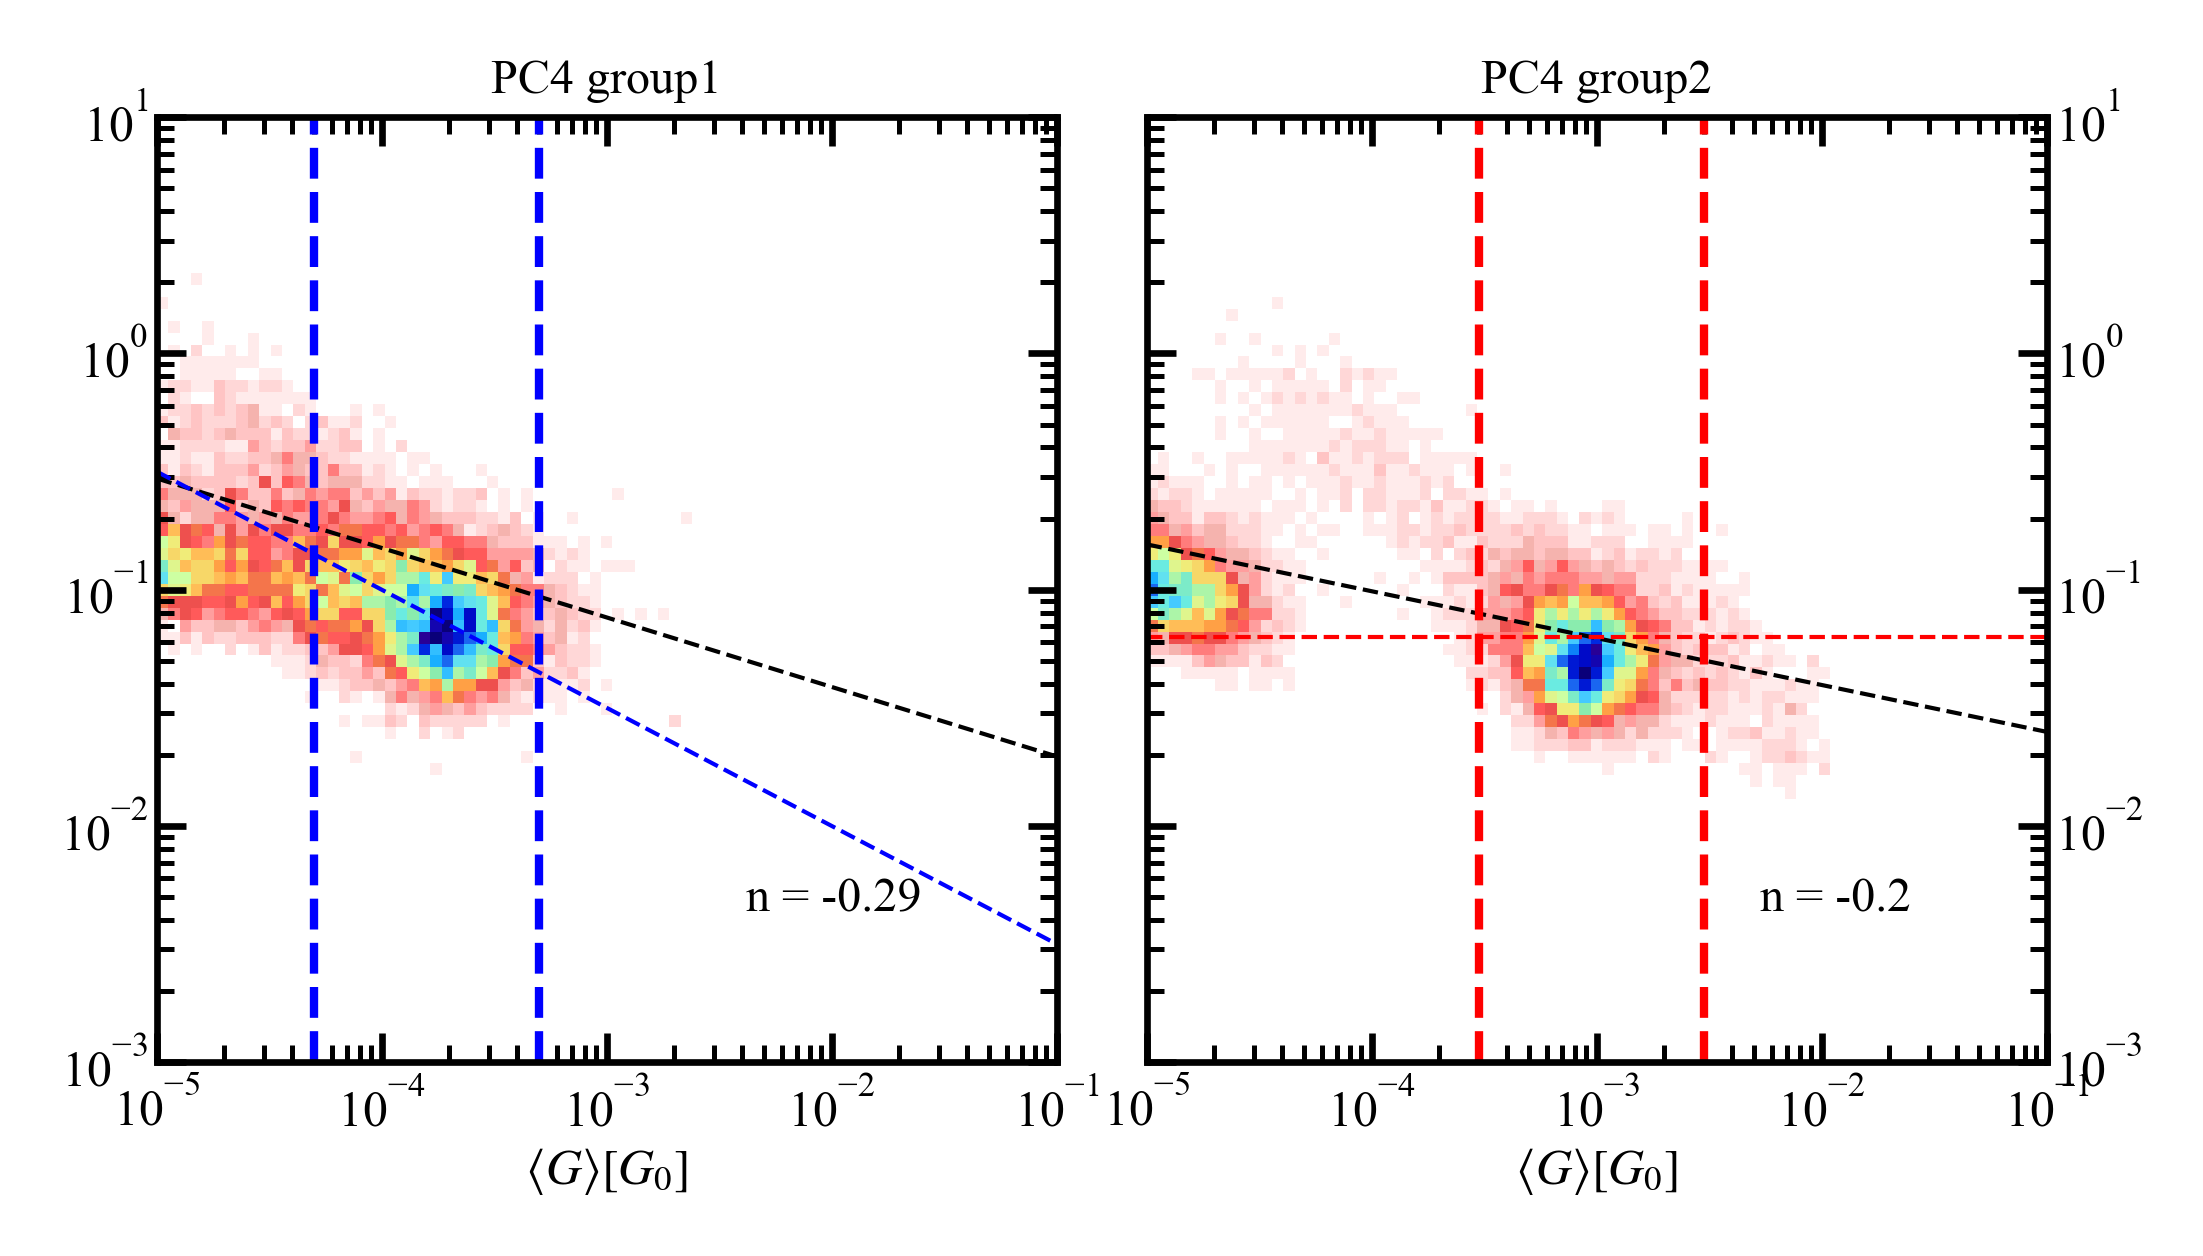

In [319]:
fig = plt.figure(figsize=utils.cm2inch(10, 5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2.set_title('PC4 group2', fontsize='xx-small', pad=3)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_1.flatten(),
                              noise_power=np.sqrt(areas_pull_4_1.flatten())/cond_avg_in_win_pull_4_1.flatten(),
                              n=n_pull_4_1/2-1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-3, 10),
                              num_bins=(20, 20), shift=-2, normalize=False, axis=ax1, cmap=utils.cmap_geo32)

mask = cond_avg_in_win_pull_4_2.flatten() > 0

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_2.flatten()[mask],
                              noise_power=np.sqrt(areas_pull_4_2.flatten())[mask]/cond_avg_in_win_pull_4_2.flatten()[mask],
                              n=n_pull_4_2/2-1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-3, 10),
                              num_bins=(20, 20), shift=-1.8, normalize=False, axis=ax2, cmap=utils.cmap_geo32)

xbins=np.logspace(-5, -1, num=20)
shift1=-3
shift2=-1.2
ax1.plot(xbins, 10 ** (-0.5 * np.log10(xbins) + shift1), c='b', ls='--', lw=0.5)
ax2.plot(xbins, 10 ** (0 * np.log10(xbins) + shift2), c='r', ls='--', lw=0.5)

ax2.axvline(G_high[0], ls='--', c='r', lw=1)
ax2.axvline(G_high[1], ls='--', c='r', lw=1)
ax1.axvline(G_low[0], ls='--', c='b', lw=1)
ax1.axvline(G_low[1], ls='--', c='b', lw=1)

In [100]:
mask=cond_avg_in_win_pull_4_2.flatten()>0

N = np.linspace(0, 2.2, num=1000)
try:
    pull_corr_1 = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group1')):
        pull_corr_1[i] = utils.calc_correlation(np.log10(areas_pull_4_1.flatten()/cond_avg_in_win_pull_4_1.flatten()**n),
                                              np.log10(cond_avg_in_win_pull_4_1.flatten()))

    n_pull_1 = N[abs(pull_corr_1) == min(abs(pull_corr_1))][0]
except IndexError:
    print(pull_corr_1)
    
try:
    pull_corr_2 = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group2')):
        pull_corr_2[i] = utils.calc_correlation(np.log10(areas_pull_4_2.flatten()[mask]/cond_avg_in_win_pull_4_2.flatten()[mask]**n),
                                                np.log10(cond_avg_in_win_pull_4_2.flatten()[mask]))

    n_pull_2 = N[abs(pull_corr_2) == min(abs(pull_corr_2))][0]
except IndexError:
    print(i)
    print(pull_corr_2)

group1:   0%|          | 0/1000 [00:00<?, ?it/s]

group2:   0%|          | 0/1000 [00:00<?, ?it/s]

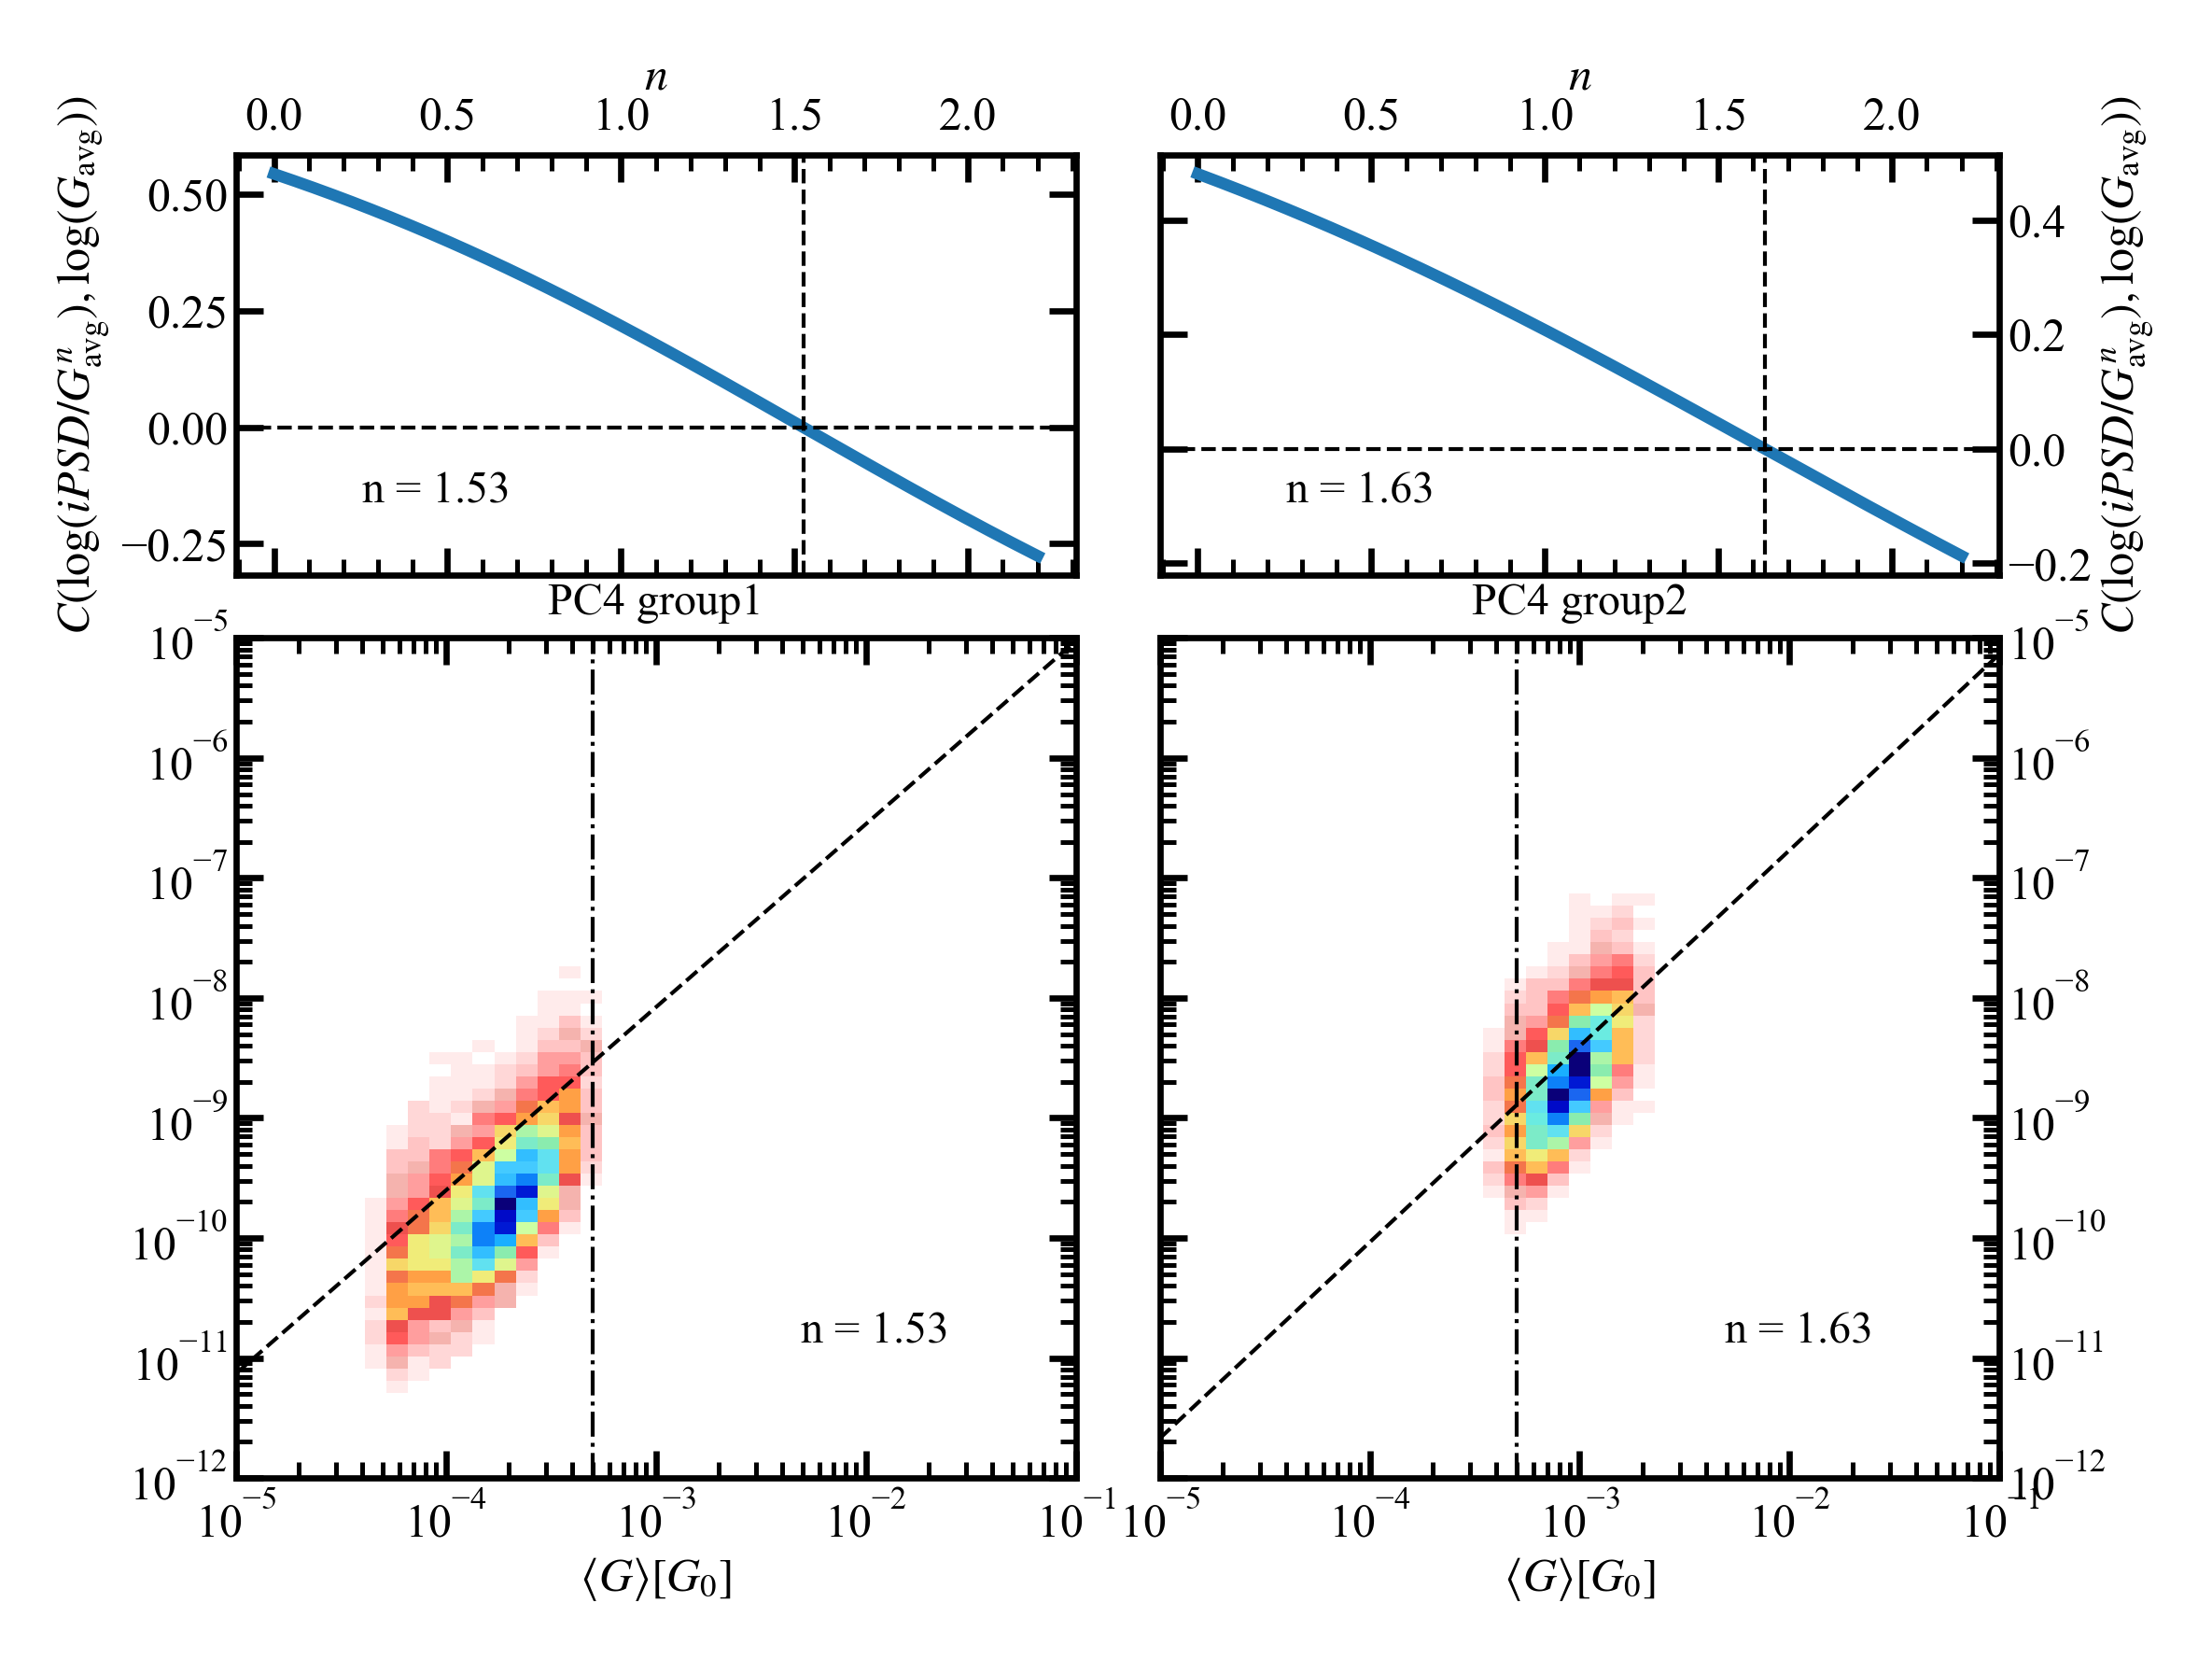

In [181]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1_corr = fig.add_subplot(gs[0, 0])
ax2_corr = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

ax1_corr.xaxis.tick_top()
ax1_corr.xaxis.set_label_position('top')
ax2_corr.xaxis.tick_top()
ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2.set_title('PC4 group2', fontsize='xx-small', pad=3)

ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corr_1, axis=ax1_corr)
ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corr_2, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_1.flatten()[mask_4_1],
                              noise_power=areas_pull_4_1.flatten()[mask_4_1],
                              n=n1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-3.5, normalize=False, axis=ax1, cmap=utils.cmap_geo32)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_2.flatten()[mask_4_2],
                              noise_power=areas_pull_4_2.flatten()[mask_4_2],
                              n=n2,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-3.5, normalize=False, axis=ax2, cmap=utils.cmap_geo32)

ax1.axvline(5e-4, c='k', ls='-.', lw=0.5)
ax2.axvline(5e-4, c='k', ls='-.', lw=0.5)

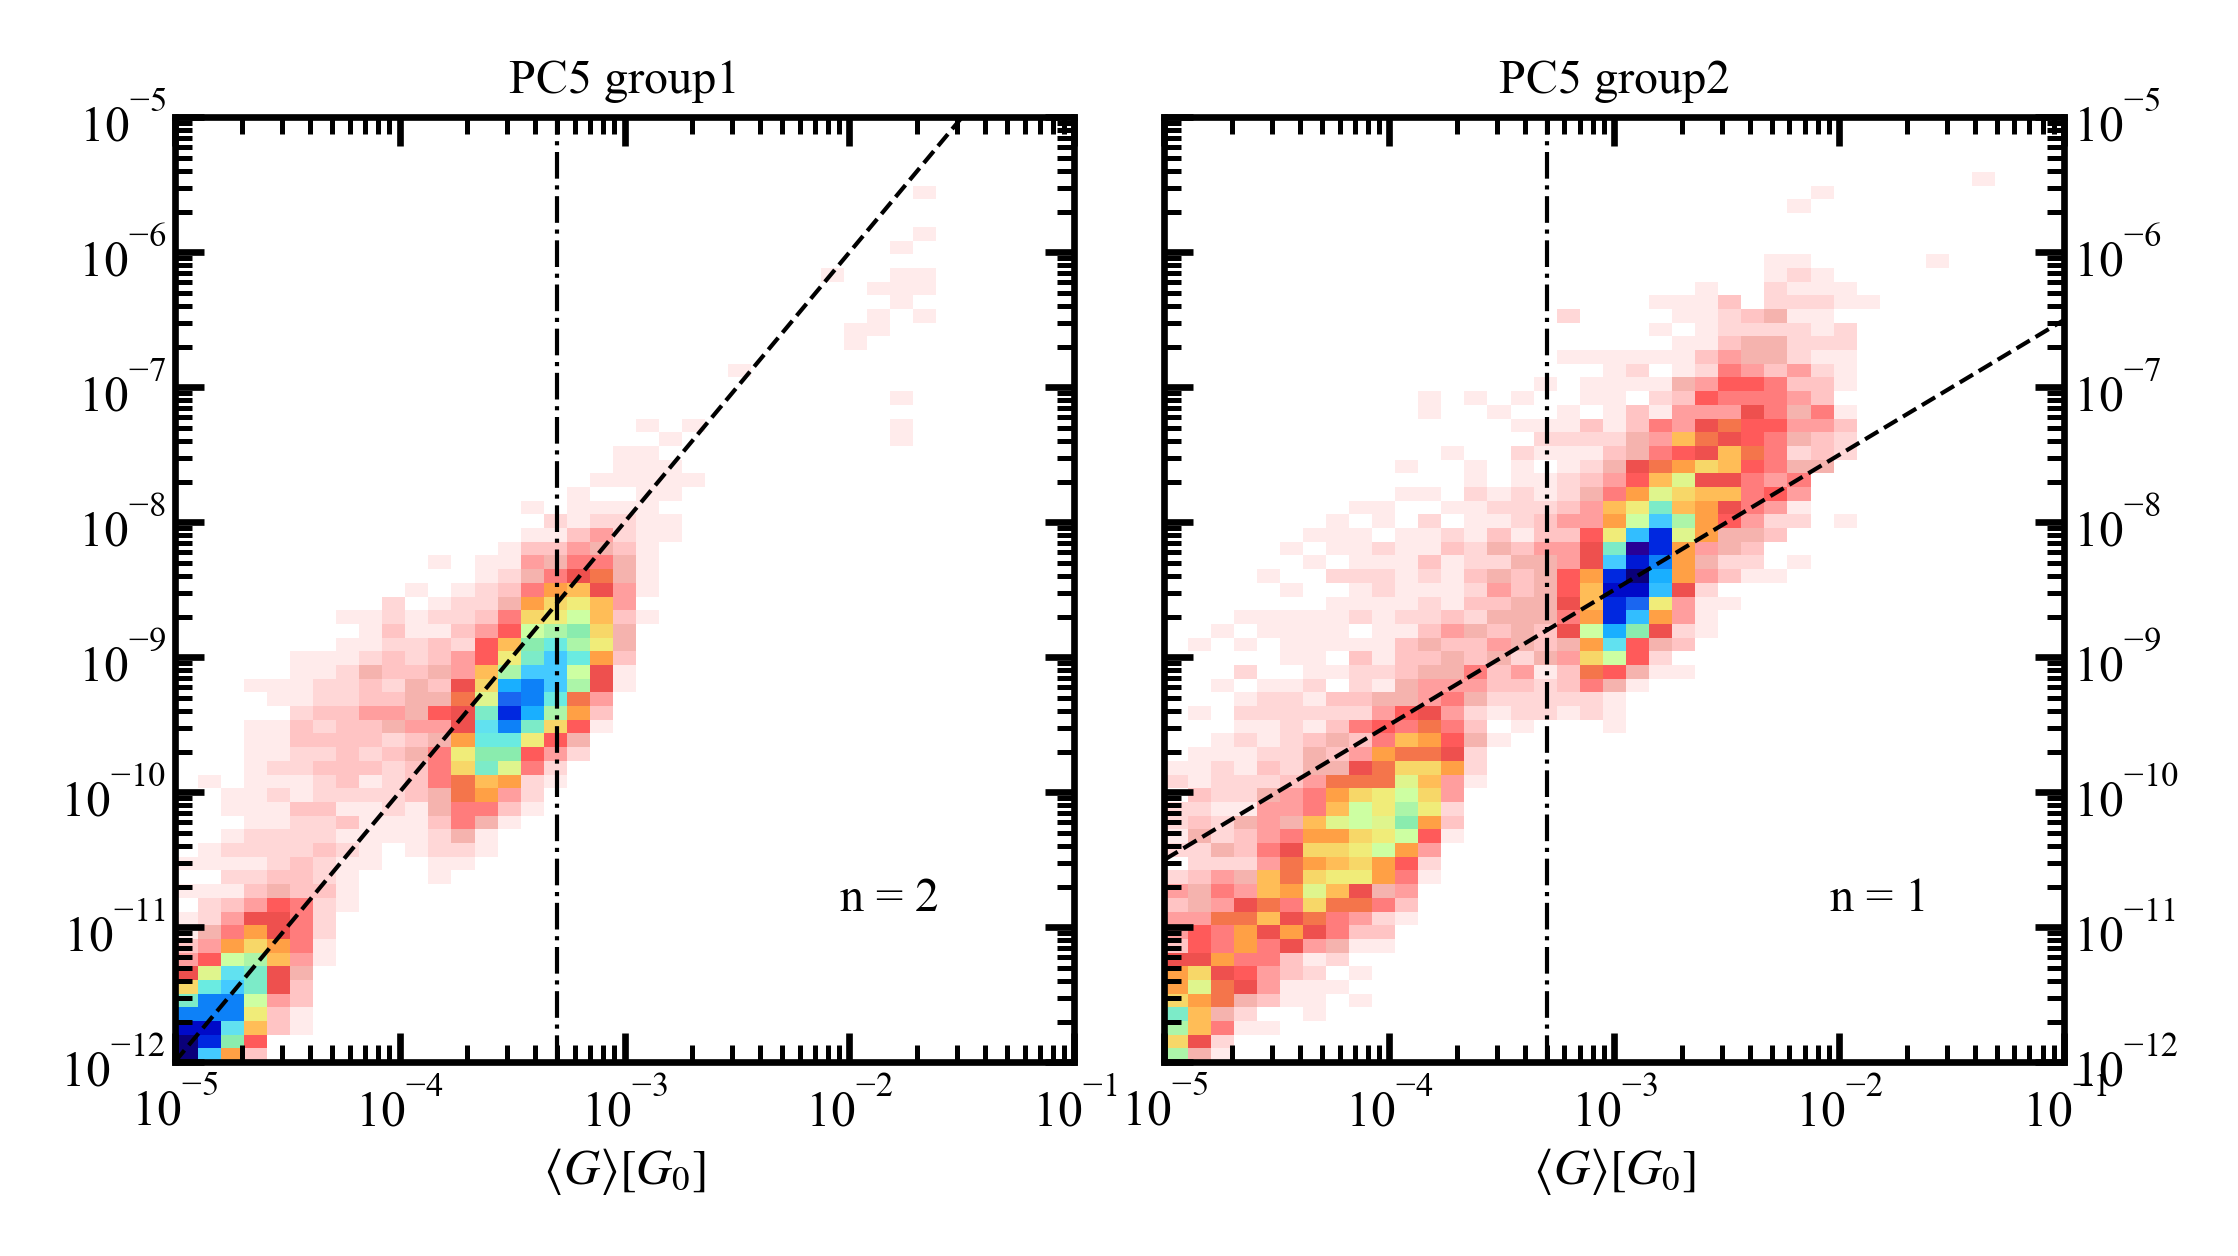

In [119]:
fig = plt.figure(figsize=utils.cm2inch(10, 5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1.set_title('PC5 group1', fontsize='xx-small', pad=3)
ax2.set_title('PC5 group2', fontsize='xx-small', pad=3)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_5_1.flatten(),
                              noise_power=areas_pull_5_1.flatten(),
                              n=2,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-2, normalize=False, axis=ax1, cmap=utils.cmap_geo32)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_5_2.flatten(),
                              noise_power=areas_pull_5_2.flatten(),
                              n=1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-5.5, normalize=False, axis=ax2, cmap=utils.cmap_geo32)

ax1.axvline(5e-4, c='k', ls='-.', lw=0.5)
ax2.axvline(5e-4, c='k', ls='-.', lw=0.5)

In [121]:
mask=cond_avg_in_win_pull_5_2.flatten()>0

N = np.linspace(0, 2.2, num=1000)
try:
    pull_corr5_1 = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group1')):
        pull_corr5_1[i] = utils.calc_correlation(np.log10(areas_pull_5_1.flatten()/cond_avg_in_win_pull_5_1.flatten()**n),
                                              np.log10(cond_avg_in_win_pull_5_1.flatten()))

    n_pull5_1 = N[abs(pull_corr5_1) == min(abs(pull_corr5_1))][0]
except IndexError:
    print(pull_corr5_1)
    
try:
    pull_corr5_2 = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group2')):
        pull_corr5_2[i] = utils.calc_correlation(np.log10(areas_pull_5_2.flatten()[mask]/cond_avg_in_win_pull_5_2.flatten()[mask]**n),
                                                np.log10(cond_avg_in_win_pull_5_2.flatten()[mask]))

    n_pull5_2 = N[abs(pull_corr5_2) == min(abs(pull_corr5_2))][0]
except IndexError:
    print(i)
    print(pull_corr5_2)

group1:   0%|          | 0/1000 [00:00<?, ?it/s]

group2:   0%|          | 0/1000 [00:00<?, ?it/s]

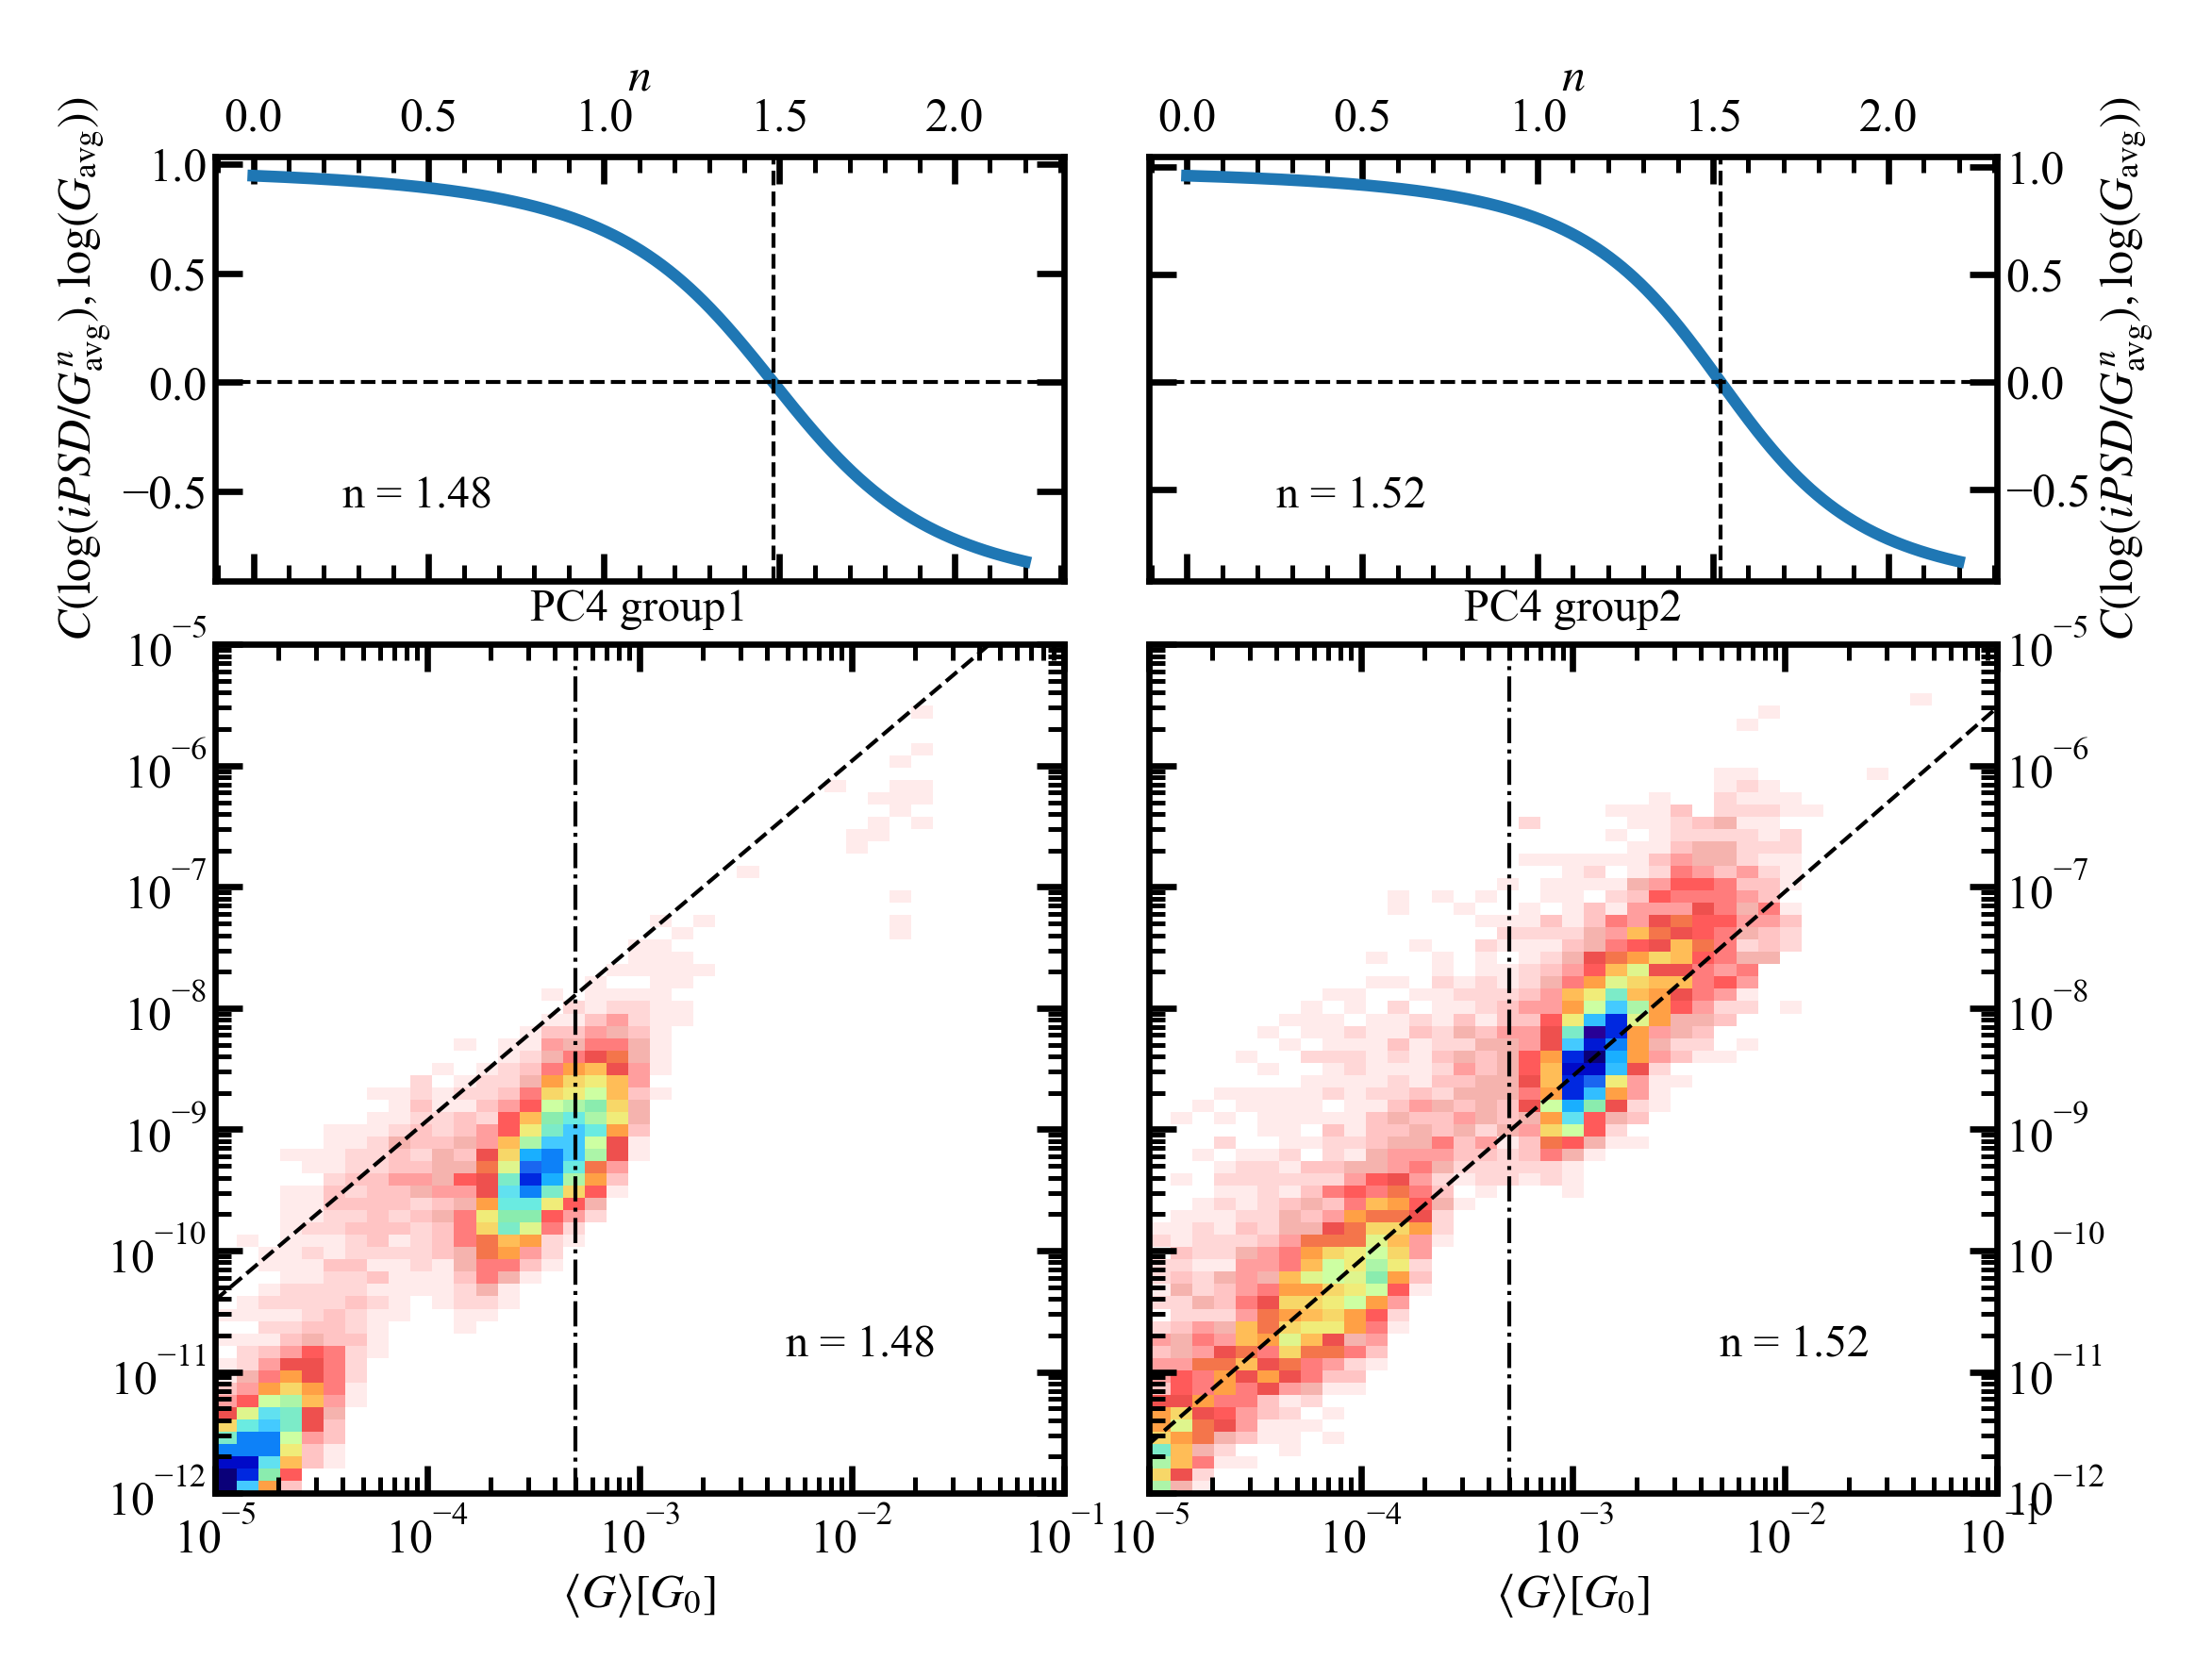

In [122]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1_corr = fig.add_subplot(gs[0, 0])
ax2_corr = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

ax1_corr.xaxis.tick_top()
ax1_corr.xaxis.set_label_position('top')
ax2_corr.xaxis.tick_top()
ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2.set_title('PC4 group2', fontsize='xx-small', pad=3)

ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corr5_1, axis=ax1_corr)
ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corr5_2, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_5_1.flatten(),
                              noise_power=areas_pull_5_1.flatten(),
                              n=n1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-3, normalize=False, axis=ax1, cmap=utils.cmap_geo32)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_5_2.flatten(),
                              noise_power=areas_pull_5_2.flatten(),
                              n=n2,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-4, normalize=False, axis=ax2, cmap=utils.cmap_geo32)

ax1.axvline(5e-4, c='k', ls='-.', lw=0.5)
ax2.axvline(5e-4, c='k', ls='-.', lw=0.5)

In [215]:
updated_group_all, cond_pull_all, piez_pull_all = collect_traces(hist.traces, align_val=2e-2)

Trace 37822 did not cross align val


D:\Greta\mcbj_stm-bj\utils.py:905: RuntimeWarning: divide by zero encountered in double_scalars
  return ind1[0] + (y-ind1[1])*(ind2[0]-ind1[0])/(ind2[1]-ind1[1])


Trace 42833 did not cross align val
Trace 43605 did not cross align val
Trace 43762 did not cross align val


In [216]:
x_mesh_all, y_mesh_all, hist_2d_group_all = calc_2d_hist_for_collected(which_group=updated_group_all, cond_pull=cond_pull_all, piez_pull=piez_pull_all)

  0%|          | 0/7996 [00:00<?, ?it/s]

In [647]:
areas_pull_all, cond_avg_in_win_pull_all = noise_analysis(which_group=updated_group_all,
                                                          cond_pull=cond_pull_all,
                                                          piez_pull=piez_pull_all,
                                                          win_size=256, step_size=None,
                                                          skip_points=50, end_point=3000)

Noise analysis:   0%|          | 0/7996 [00:00<?, ?it/s]

D:\Greta\mcbj_stm-bj\utils.py:1095: RuntimeWarning: invalid value encountered in log10
  return 10**np.mean(np.log10(arr), **kwargs)


asd 699
asd 3478
asd 3748
gfhf[699, 3478, 3748]
deleting 3748
deleting 3478
deleting 699


In [241]:
mask_low=np.bitwise_and(cond_avg_in_win_pull_all.flatten()>G_low[0], cond_avg_in_win_pull_all.flatten()<G_low[1])
mask_high=np.bitwise_and(cond_avg_in_win_pull_all.flatten()>G_high[0], cond_avg_in_win_pull_all.flatten()<G_high[1])

N = np.linspace(0, 2.2, num=1000)
try:
    pull_corrall = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group1')):
        pull_corrall[i] = utils.calc_correlation(np.log10(areas_pull_all.flatten()[mask_low]/cond_avg_in_win_pull_all.flatten()[mask_low]**n),
                                              np.log10(cond_avg_in_win_pull_all.flatten()[mask_low]))

    n_pullall_low = N[abs(pull_corrall) == min(abs(pull_corrall))][0]
except IndexError:
    print(pull_corrall)
    
N = np.linspace(0, 2.2, num=1000)
try:
    pull_corrall = np.zeros_like(N)
    for i, n in enumerate(tqdm(N, desc='group1')):
        pull_corrall[i] = utils.calc_correlation(np.log10(areas_pull_all.flatten()[mask_high]/cond_avg_in_win_pull_all.flatten()[mask_high]**n),
                                              np.log10(cond_avg_in_win_pull_all.flatten()[mask_high]))

    n_pullall_high = N[abs(pull_corrall) == min(abs(pull_corrall))][0]
except IndexError:
    print(pull_corrall)

group1:   0%|          | 0/1000 [00:00<?, ?it/s]

group1:   0%|          | 0/1000 [00:00<?, ?it/s]

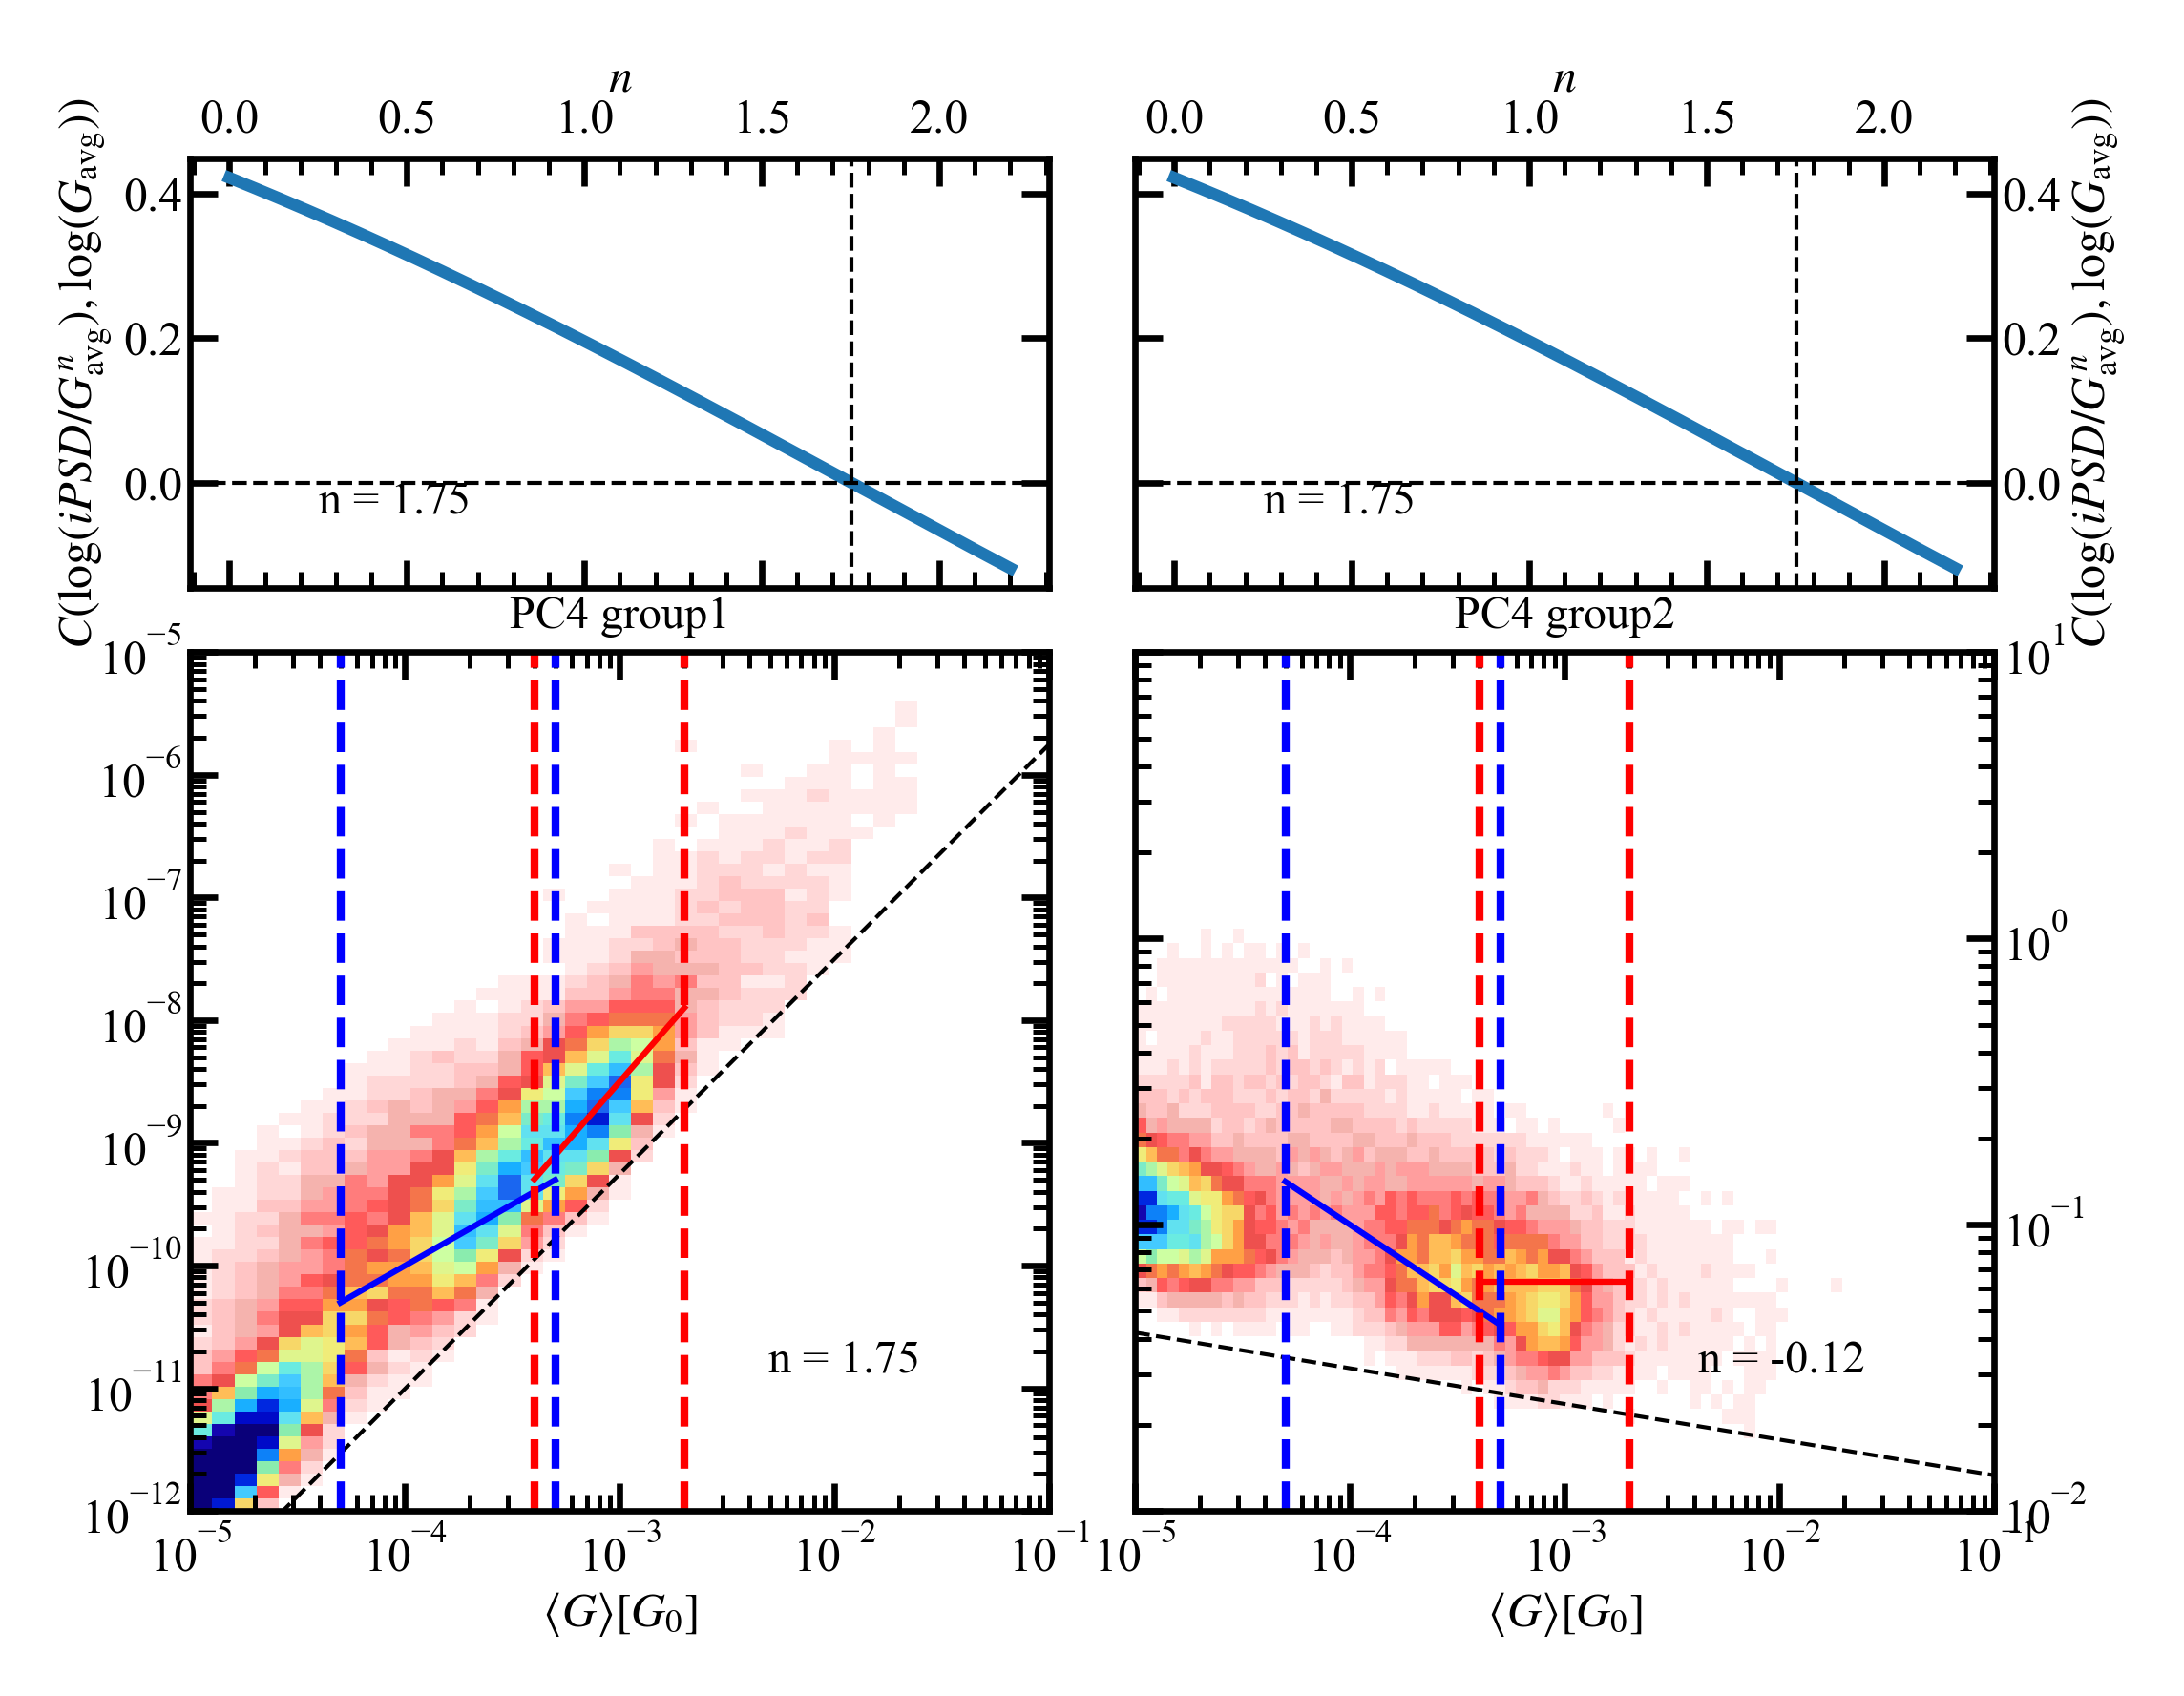

In [264]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1_corr = fig.add_subplot(gs[0, 0])
ax2_corr = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

ax1_corr.xaxis.tick_top()
ax1_corr.xaxis.set_label_position('top')
ax2_corr.xaxis.tick_top()
ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2.set_title('PC4 group2', fontsize='xx-small', pad=3)

ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax1_corr)
ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=areas_pull_all.flatten(),
                              n=n1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-4, normalize=False, axis=ax1, cmap=utils.cmap_geo32, vmax=500)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
                              n=n2/2-1,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-2, 10),
                              num_bins=(20, 20), shift=-2, normalize=False, axis=ax2, cmap=utils.cmap_geo32, vmax=500)

xbins1=np.logspace(np.log10(G_low[0]), np.log10(G_low[1]), num=20)
xbins2=np.logspace(np.log10(G_high[0]), np.log10(G_high[1]), num=20)
shift1=-6
shift2=-2.5
ax1.plot(xbins1, 10 ** (1 * np.log10(xbins1) + shift1), c='b', ls='-', lw=0.75)
ax1.plot(xbins2, 10 ** (2 * np.log10(xbins2) + shift2), c='r', ls='-', lw=0.75)
shift1=-3
shift2=-1.2
ax2.plot(xbins1, 10 ** (-0.5 * np.log10(xbins1) + shift1), c='b', ls='-', lw=0.75)
ax2.plot(xbins2, 10 ** (0 * np.log10(xbins2) + shift2), c='r', ls='-', lw=0.75)

ax1.axvline(G_high[0], ls='--', c='r', lw=1)
ax1.axvline(G_high[1], ls='--', c='r', lw=1)
ax1.axvline(G_low[0], ls='--', c='b', lw=1)
ax1.axvline(G_low[1], ls='--', c='b', lw=1)
ax2.axvline(G_high[0], ls='--', c='r', lw=1)
ax2.axvline(G_high[1], ls='--', c='r', lw=1)
ax2.axvline(G_low[0], ls='--', c='b', lw=1)
ax2.axvline(G_low[1], ls='--', c='b', lw=1)

In [243]:
print(n_pullall_low, n_pullall_high)
print(n_pullall_low/2-1, n_pullall_high/2-1)

1.1869869869869871 1.750750750750751
-0.40650650650650644 -0.12462462462462454


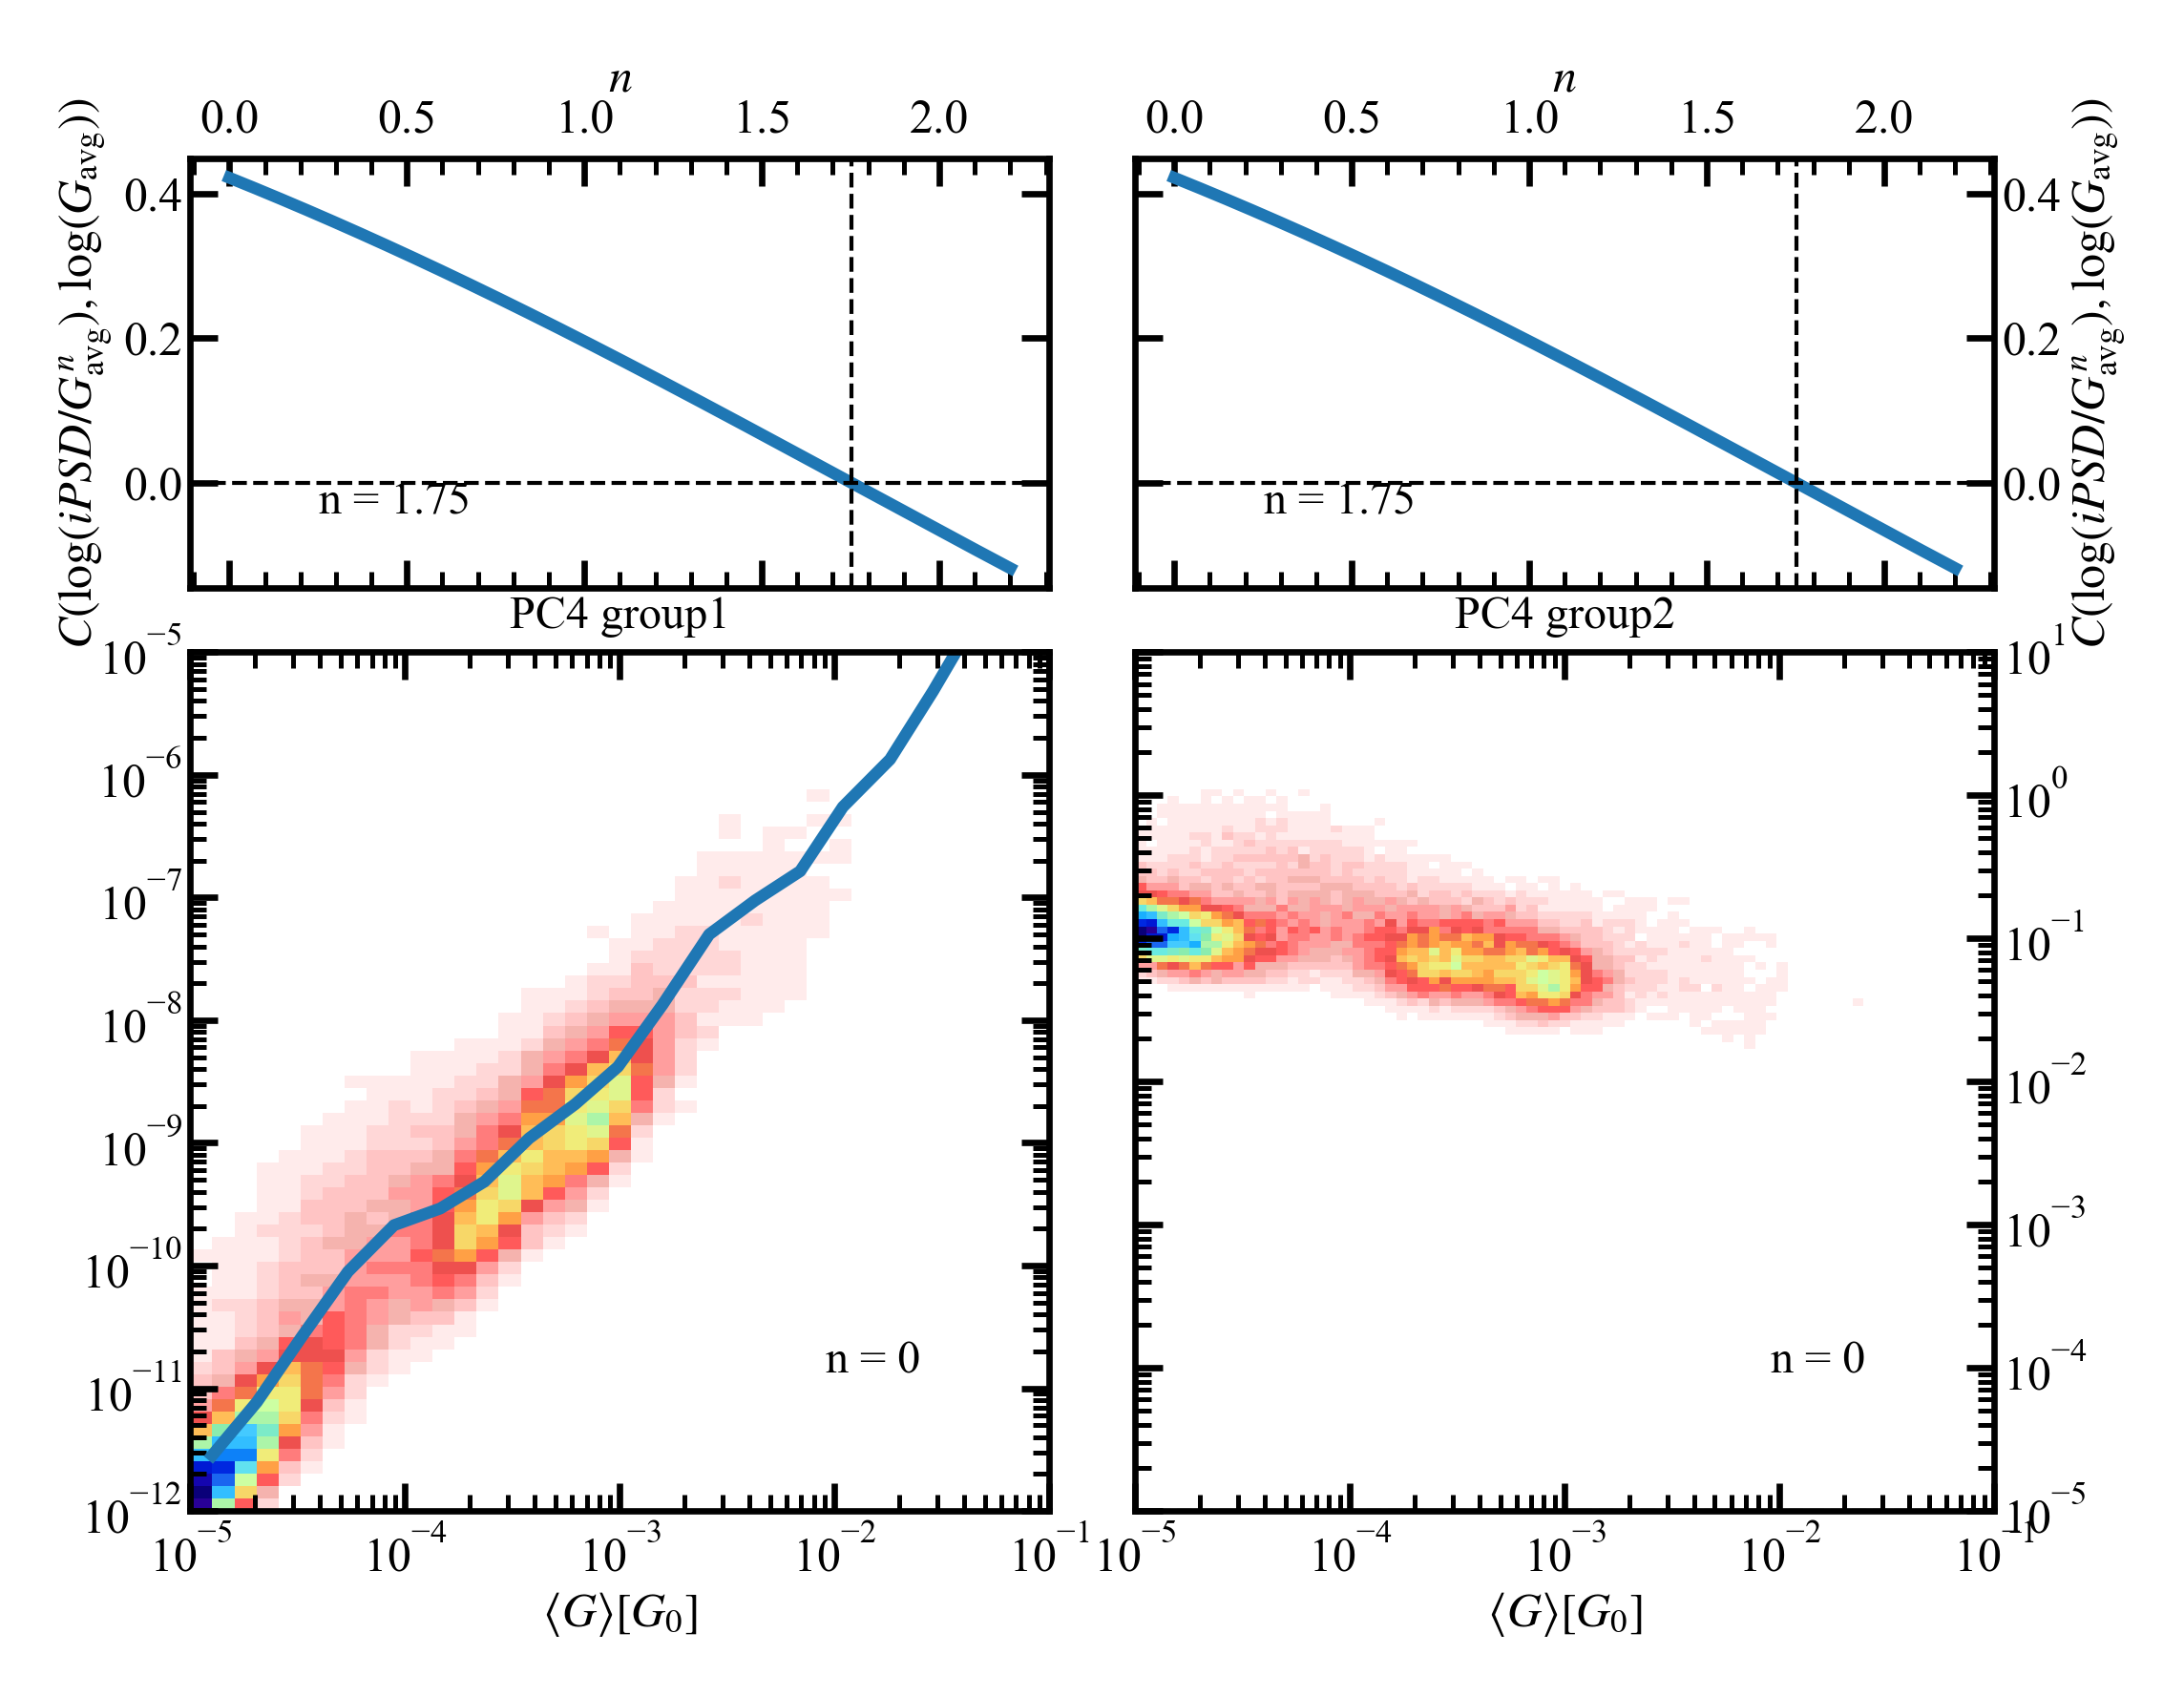

In [410]:
fig = plt.figure(figsize=utils.cm2inch(10, 7.5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1_corr = fig.add_subplot(gs[0, 0])
ax2_corr = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

ax1_corr.xaxis.tick_top()
ax1_corr.xaxis.set_label_position('top')
ax2_corr.xaxis.tick_top()
ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2.set_title('PC4 group2', fontsize='xx-small', pad=3)

ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax1_corr)
ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=areas_pull_all.flatten(),
                              n=0,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-12, 1e-5),
                              num_bins=(10, 10), shift=-4, normalize=False, axis=ax1, cmap=utils.cmap_geo32)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
                              n=0,
                              xrange=(1e-5, 0.1),
                              yrange=(1e-5, 10),
                              num_bins=(20, 20), shift=-5, normalize=False, axis=ax2, cmap=utils.cmap_geo32)

xbins1=np.logspace(np.log10(G_low[0]), np.log10(G_low[1]), num=20)
xbins2=np.logspace(np.log10(G_high[0]), np.log10(G_high[1]), num=20)
shift1=-6
shift2=-2.5
# ax1.plot(xbins1, 10 ** (1 * np.log10(xbins1) + shift1), c='b', ls='-', lw=0.75)
# ax1.plot(xbins2, 10 ** (2 * np.log10(xbins2) + shift2), c='r', ls='-', lw=0.75)
shift1=-3
shift2=-1.2
# ax2.plot(xbins1, 10 ** (-0.5 * np.log10(xbins1) + shift1), c='b', ls='-', lw=0.75)
# ax2.plot(xbins2, 10 ** (0 * np.log10(xbins2) + shift2), c='r', ls='-', lw=0.75)

# ax1.axvline(G_high[0], ls='--', c='r', lw=1)
# ax1.axvline(G_high[1], ls='--', c='r', lw=1)
# ax1.axvline(G_low[0], ls='--', c='b', lw=1)
# ax1.axvline(G_low[1], ls='--', c='b', lw=1)
# ax2.axvline(G_high[0], ls='--', c='r', lw=1)
# ax2.axvline(G_high[1], ls='--', c='r', lw=1)
# ax2.axvline(G_low[0], ls='--', c='b', lw=1)
# ax2.axvline(G_low[1], ls='--', c='b', lw=1)

ax1.plot(cond_mean_all[cond_mean_all > 0], noise_mean_all[cond_mean_all > 0])

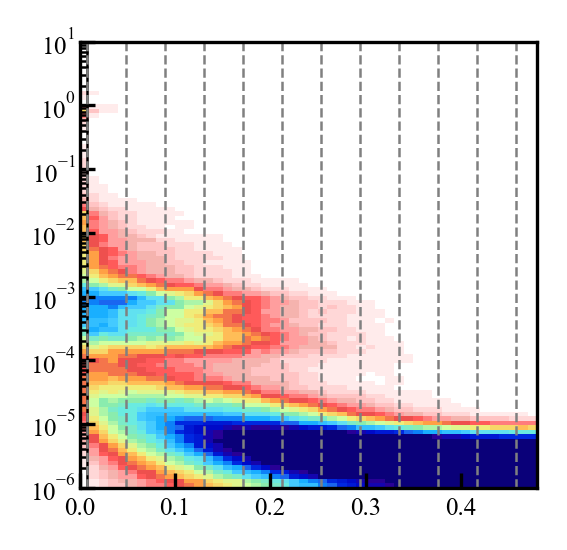

In [251]:
fig, ax = plt.subplots(ncols=1, dpi=300, figsize=utils.cm2inch(5,5))
ax.pcolormesh(x_mesh_all, y_mesh_all, hist_2d_group_all, cmap=utils.cmap_geo32, vmax=20000)
ax.set_yscale('log')
ax.set_xlim(0, trace_pair.rate*3000/trace_pair.sample_rate)
# ax[0].axhline(8e-5, ls='--', lw=0.6, c='grey')
ax.axvline(piez_pull_all[0][50], ls='-', lw=0.6, c='black')

for i in piez_pull_all[0][50::256]:
    ax.axvline(i, ls='--', lw=0.6, c='grey')

# ax[1].axhline(G_high[0], ls='--', c='r', lw=1)
# ax[1].axhline(G_high[1], ls='--', c='r', lw=1)
# ax[0].axhline(G_low[0], ls='--', c='b', lw=1)
# ax[0].axhline(G_low[1], ls='--', c='b', lw=1)

In [426]:
import scipy

In [445]:
def fit_line(x, a, b):
    return a*x+b

popt_4_1, pcov_4_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]),
                                              np.log10(noise_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]))
popt_4_2, pcov_4_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]),
                                              np.log10(noise_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]))

In [450]:
def fit_line(x, a, b):
    return a*x+b

popt_all_1, pcov_all_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]))
popt_all_2, pcov_all_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]))

In [584]:
xdata_4_1 = np.log10(cond_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])])
xdata_4_2 = np.log10(cond_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])])

In [471]:
print(popt_all_1)
print(popt_all_2)
print(popt_4_1)
print(popt_4_2)

[-0.40027861 -2.44953195]
[-0.00732405 -1.13710866]
[-0.30105129 -2.19530637]
[-0.17040448 -1.71188064]


In [409]:
noise_mean_all = np.zeros(len(xbins)-1)
noise_std_all = np.zeros(len(xbins)-1)
noise_log_std_all = np.zeros(len(xbins)-1)
cond_mean_all = np.zeros(len(xbins)-1)
cond_std_all = np.zeros(len(xbins)-1)
noise_log_mean_all = np.zeros(len(xbins)-1)
cond_log_mean_all = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_all.flatten() > xbins[i],
                                  cond_avg_in_win_pull_all.flatten() < xbins[i+1]))
    if len(areas_pull_all.flatten()[mask_x1[i]]) > 0:
        noise_mean_all[i] = 10**np.mean(np.log10(areas_pull_all.flatten()[mask_x1[i]]))
        noise_log_std_all[i] = np.sqrt(utils.log_avg(abs(areas_pull_all.flatten()-noise_mean_all[i])**2))
        noise_log_mean_all[i] = utils.log_avg(areas_pull_all.flatten()[mask_x1[i]])
        noise_std_all[i] = np.std(areas_pull_all.flatten()[mask_x1[i]])
        cond_mean_all[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        cond_std_all[i] = np.std(np.log10(cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        cond_log_mean_all[i] = utils.log_avg(cond_avg_in_win_pull_all.flatten()[mask_x1[i]])
    else:
        noise_mean_all[i] = 0
        noise_std_all[i] = 0
        cond_mean_all[i] = 0
        cond_std_all[i] = 0
        noise_log_mean_all[i] = 0
        cond_log_mean_all[i] = 0

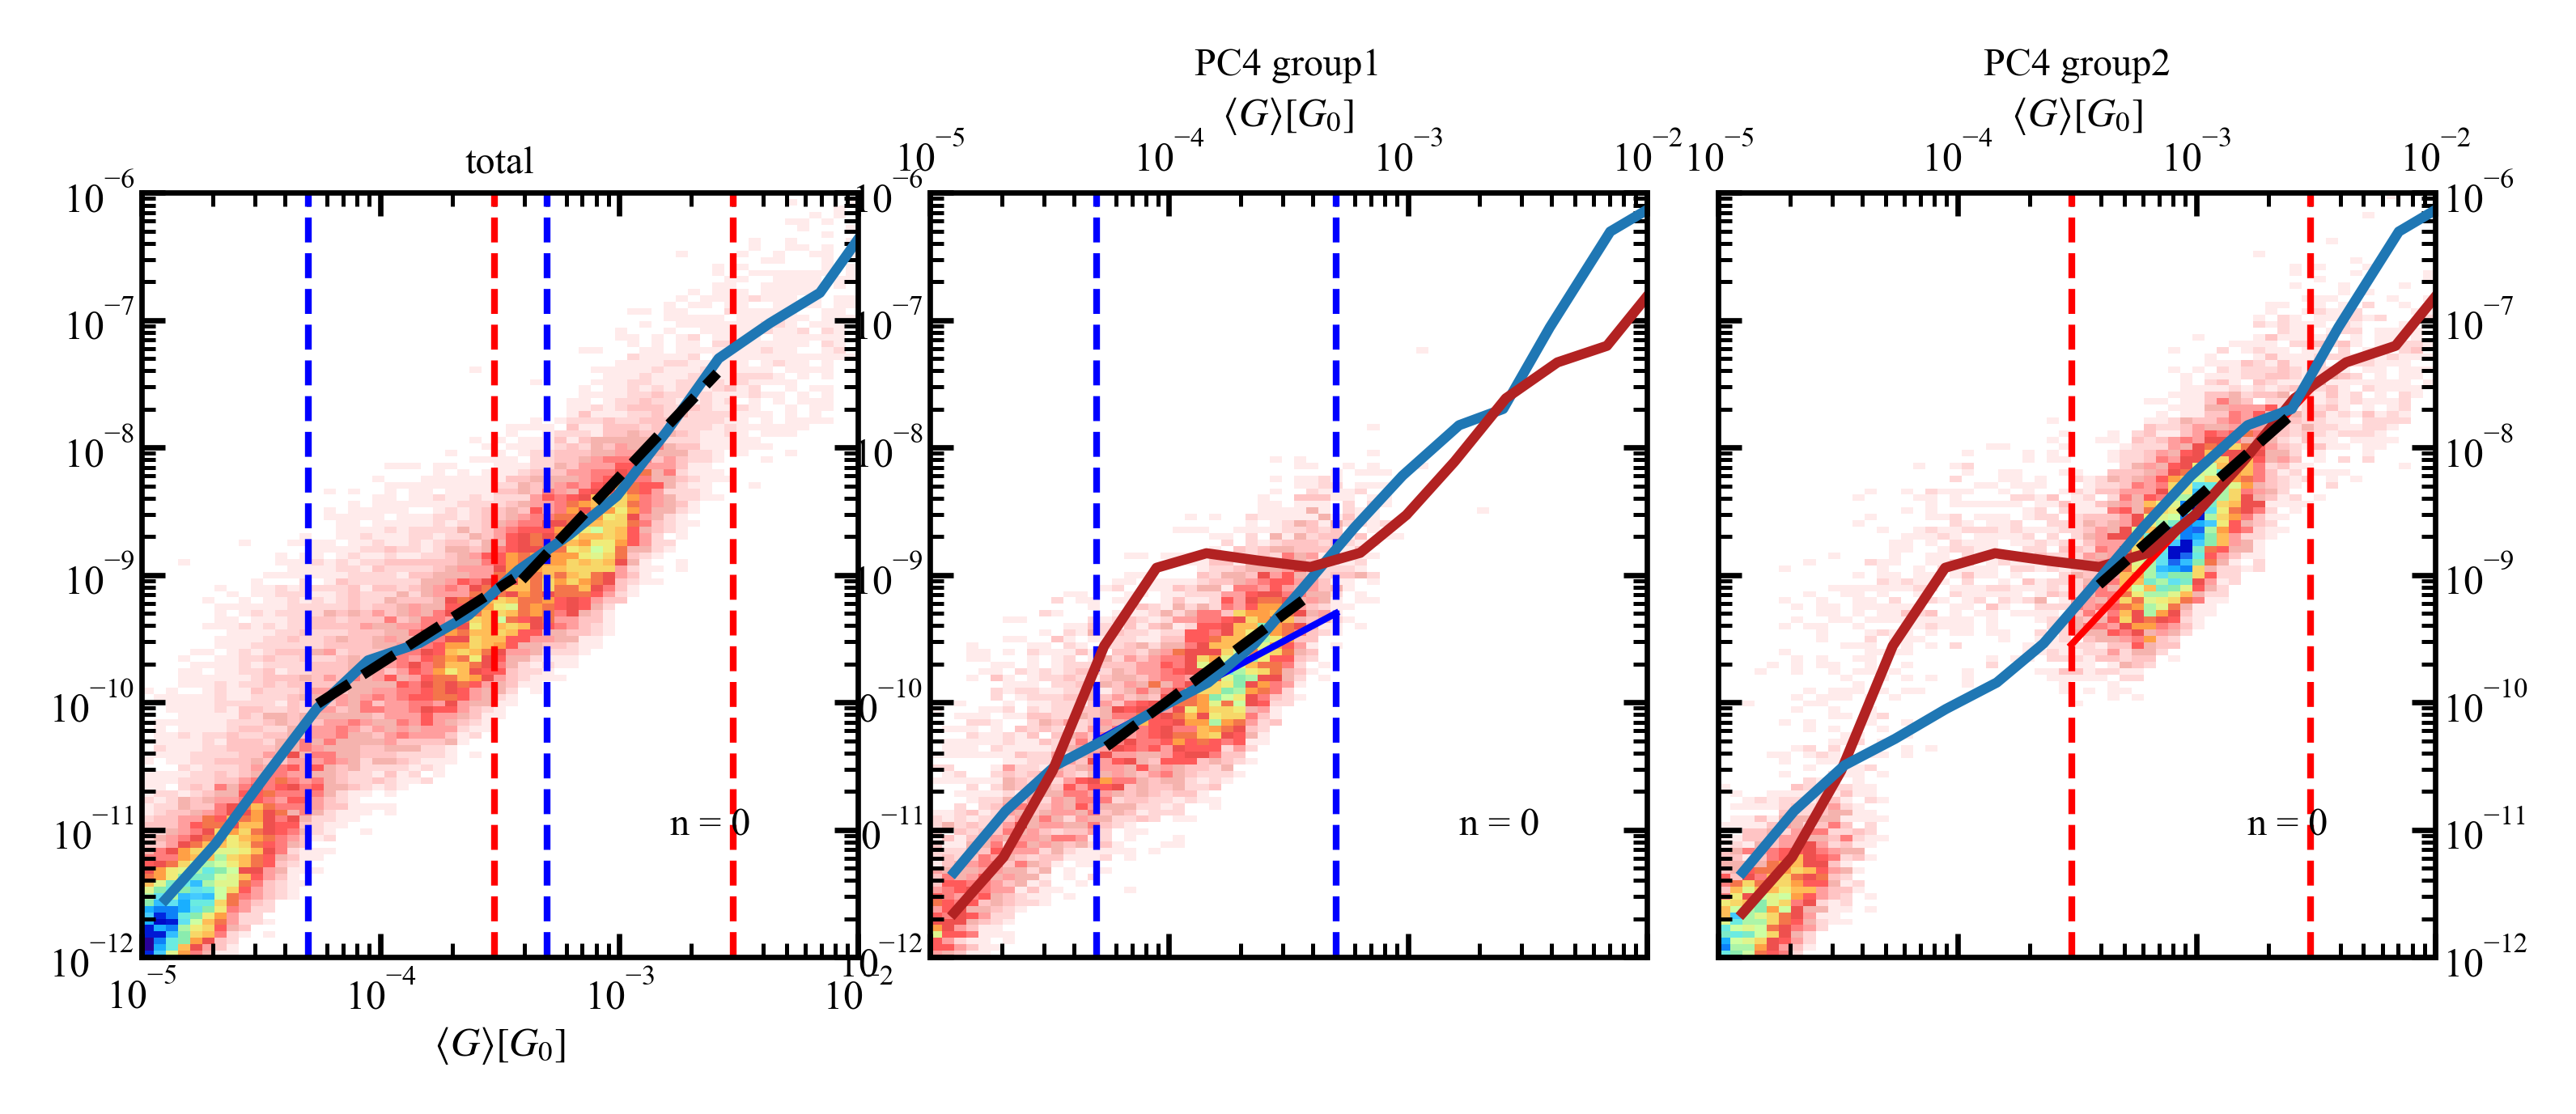

In [454]:
fig = plt.figure(figsize=utils.cm2inch(15, 5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=(1, 1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1_corr = fig.add_subplot(gs[1])
ax2_corr = fig.add_subplot(gs[2])
ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1, 1])

ax1_corr.xaxis.tick_top()
ax1_corr.xaxis.set_label_position('top')
ax2_corr.xaxis.tick_top()
ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1_corr.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2_corr.set_title('PC4 group2', fontsize='xx-small', pad=3)
ax1.set_title('total', fontsize='xx-small', pad=3)
ax2.set_title('total', fontsize='xx-small', pad=3)

# ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax1_corr)
# ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_1.flatten(),
                              noise_power=areas_pull_4_1.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-12, 1e-6),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1_corr, cmap=utils.cmap_geo32, vmax=100)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_2.flatten(),
                              noise_power=areas_pull_4_2.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-12, 1e-6),
                              num_bins=(20, 20), shift=-2, normalize=False, axis=ax2_corr, cmap=utils.cmap_geo32, vmax=100)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=areas_pull_all.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-12, 1e-6),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1, cmap=utils.cmap_geo32, vmax=250)

# plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
#                               noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
#                               n=n2/2-1,
#                               xrange=(1e-5, 0.1),
#                               yrange=(1e-2, 10),
#                               num_bins=(20, 20), shift=-2, normalize=False, axis=ax2, cmap=utils.cmap_geo32, vmax=500)

xbins1=np.logspace(np.log10(G_low[0]), np.log10(G_low[1]), num=20)
xbins2=np.logspace(np.log10(G_high[0]), np.log10(G_high[1]), num=20)
shift1=-6
shift2=-2.5
ax1_corr.plot(xbins1, 10 ** (1 * np.log10(xbins1) + shift1), c='b', ls='-', lw=1)
ax2_corr.plot(xbins2, 10 ** (2 * np.log10(xbins2) + shift2), c='r', ls='-', lw=1)
shift1=-3
shift2=-1.2
# ax2.plot(xbins1, 10 ** (-0.5 * np.log10(xbins1) + shift1), c='b', ls='-', lw=0.75)
# ax2.plot(xbins2, 10 ** (0 * np.log10(xbins2) + shift2), c='r', ls='-', lw=0.75)

# ax1_corr.axvline(G_high[0], ls='--', c='r', lw=1)
# ax1_corr.axvline(G_high[1], ls='--', c='r', lw=1)
ax1_corr.axvline(G_low[0], ls='--', c='b', lw=1)
ax1_corr.axvline(G_low[1], ls='--', c='b', lw=1)

ax1.axvline(G_low[0], ls='--', c='b', lw=1)
ax1.axvline(G_low[1], ls='--', c='b', lw=1)
ax1.axvline(G_high[0], ls='--', c='r', lw=1)
ax1.axvline(G_high[1], ls='--', c='r', lw=1)

ax2_corr.axvline(G_high[0], ls='--', c='r', lw=1)
ax2_corr.axvline(G_high[1], ls='--', c='r', lw=1)
# ax2_corr.axvline(G_low[0], ls='--', c='b', lw=1)
# ax2_corr.axvline(G_low[1], ls='--', c='b', lw=1)
# ax2.axvline(G_high[0], ls='--', c='r', lw=1)
# ax2.axvline(G_high[1], ls='--', c='r', lw=1)
# ax2.axvline(G_low[0], ls='--', c='b', lw=1)
# ax2.axvline(G_low[1], ls='--', c='b', lw=1)

ax1_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax2_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax2_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax1_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax1.plot(cond_mean_all[cond_mean_all > 0], noise_mean_all[cond_mean_all > 0])

ax1_corr.plot(10**xdata_4_1, 10**(xdata_4_1*popt_4_1[0]+popt_4_1[1]), c='k', ls='--')
ax2_corr.plot(10**xdata_4_2, 10**(xdata_4_2*popt_4_2[0]+popt_4_2[1]), c='k', ls='--')

ax1.plot(10**xdata_4_1, 10**(xdata_4_1*popt_all_1[0]+popt_all_1[1]), c='k', ls='--')
ax1.plot(10**xdata_4_2, 10**(xdata_4_2*popt_all_2[0]+popt_all_2[1]), c='k', ls='--')

# ax2.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

In [461]:
noise_mean_4_1 = np.zeros(len(xbins)-1)
noise_std_4_1 = np.zeros(len(xbins)-1)
noise_log_std_4_1 = np.zeros(len(xbins)-1)
cond_mean_4_1 = np.zeros(len(xbins)-1)
cond_std_4_1 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_1.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_1.flatten() < xbins[i+1]))
    if len(areas_pull_4_1.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_1[i] = 10**np.mean(np.log10(np.sqrt(areas_pull_4_1.flatten()[mask_x1[i]])/cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        noise_std_4_1[i] = np.sqrt(utils.log_avg(abs(np.sqrt(areas_pull_4_1.flatten()[mask_x1[i]])/cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]-noise_mean_4_1[i])**2))
        cond_mean_4_1[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        cond_std_4_1[i] = np.sqrt(utils.log_avg(abs(cond_avg_in_win_pull_4_1.flatten()-cond_mean_4_1[i])**2))
    else:
        noise_mean_4_1[i] = 0
        noise_std_4_1[i] = 0
        cond_mean_4_1[i] = 0
        cond_std_4_1[i] = 0

D:\Greta\mcbj_stm-bj\utils.py:1095: RuntimeWarning: divide by zero encountered in log10
  return 10**np.mean(np.log10(arr), **kwargs)


In [463]:
noise_mean_4_2 = np.zeros(len(xbins)-1)
noise_std_4_2 = np.zeros(len(xbins)-1)
noise_log_std_4_2 = np.zeros(len(xbins)-1)
cond_mean_4_2 = np.zeros(len(xbins)-1)
cond_std_4_2 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_2.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_2.flatten() < xbins[i+1]))
    if len(areas_pull_4_2.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_2[i] = 10**np.mean(np.log10(np.sqrt(areas_pull_4_2.flatten()[mask_x1[i]])/cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        noise_std_4_2[i] = np.sqrt(utils.log_avg(abs(np.sqrt(areas_pull_4_2.flatten()[mask_x1[i]])/cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]-noise_mean_4_2[i])**2))
        cond_mean_4_2[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        cond_std_4_2[i] = np.sqrt(utils.log_avg(abs(cond_avg_in_win_pull_4_2.flatten()-cond_mean_4_2[i])**2))
    else:
        noise_mean_4_2[i] = 0
        noise_std_4_2[i] = 0
        cond_mean_4_2[i] = 0
        cond_std_4_2[i] = 0

In [464]:
noise_mean_all = np.zeros(len(xbins)-1)
noise_std_all = np.zeros(len(xbins)-1)
noise_log_std_all = np.zeros(len(xbins)-1)
cond_mean_all = np.zeros(len(xbins)-1)
cond_std_all = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_all.flatten() > xbins[i],
                                  cond_avg_in_win_pull_all.flatten() < xbins[i+1]))
    if len(areas_pull_all.flatten()[mask_x1[i]]) > 0:
        noise_mean_all[i] = 10**np.mean(np.log10(np.sqrt(areas_pull_all.flatten()[mask_x1[i]])/cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        noise_std_all[i] = np.sqrt(utils.log_avg(abs(np.sqrt(areas_pull_all.flatten()[mask_x1[i]])/cond_avg_in_win_pull_all.flatten()[mask_x1[i]]-noise_mean_all[i])**2))
        cond_mean_all[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        cond_std_all[i] = np.sqrt(utils.log_avg(abs(cond_avg_in_win_pull_all.flatten()-cond_mean_all[i])**2))
    else:
        noise_mean_all[i] = 0
        noise_std_all[i] = 0
        cond_mean_all[i] = 0
        cond_std_all[i] = 0

In [465]:
def fit_line(x, a, b):
    return a*x+b

popt_4_1, pcov_4_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]),
                                              np.log10(noise_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]))
popt_4_2, pcov_4_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]),
                                              np.log10(noise_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]))

In [466]:
def fit_line(x, a, b):
    return a*x+b

popt_all_1, pcov_all_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]))
popt_all_2, pcov_all_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]))

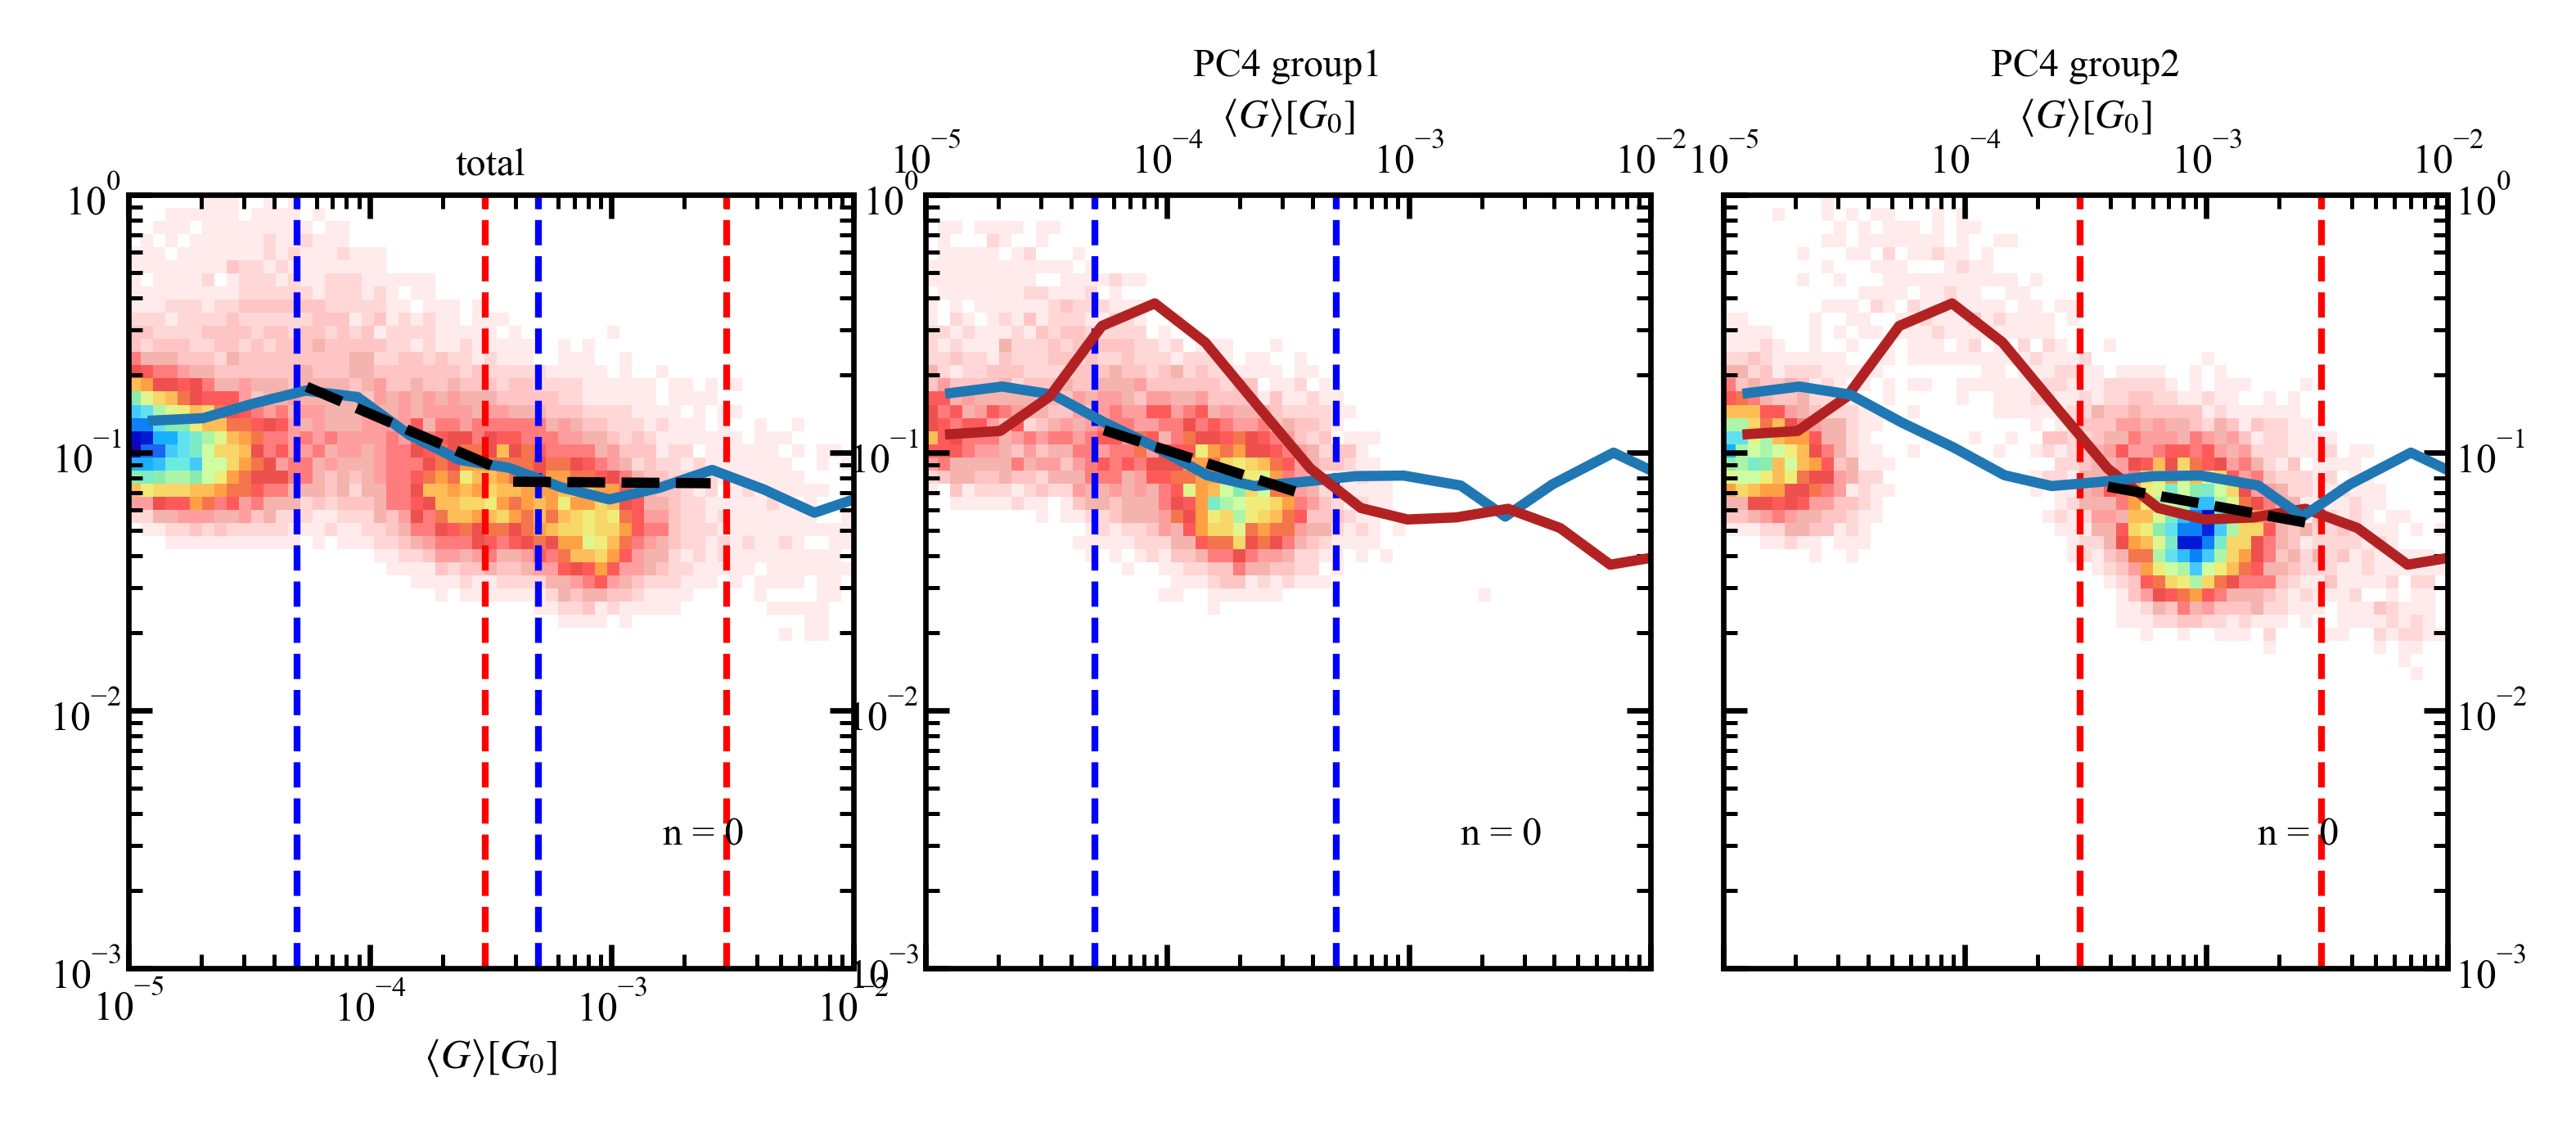

In [474]:
fig = plt.figure(figsize=utils.cm2inch(15, 5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=(1, 1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax1_corr = fig.add_subplot(gs[1])
ax2_corr = fig.add_subplot(gs[2])
ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1, 1])

ax1_corr.xaxis.tick_top()
ax1_corr.xaxis.set_label_position('top')
ax2_corr.xaxis.tick_top()
ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax1_corr.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2_corr.set_title('PC4 group2', fontsize='xx-small', pad=3)
ax1.set_title('total', fontsize='xx-small', pad=3)
ax2.set_title('total', fontsize='xx-small', pad=3)

# ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax1_corr)
# ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_1.flatten(),
                              noise_power=np.sqrt(areas_pull_4_1.flatten())/cond_avg_in_win_pull_4_1.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-3, 1),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1_corr, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_2.flatten(),
                              noise_power=np.sqrt(areas_pull_4_2.flatten())/cond_avg_in_win_pull_4_2.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-3, 1),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax2_corr, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-3, 1),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1, cmap=utils.cmap_geo32, vmax=500)

# plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
#                               noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
#                               n=n2/2-1,
#                               xrange=(1e-5, 0.1),
#                               yrange=(1e-2, 10),
#                               num_bins=(20, 20), shift=-2, normalize=False, axis=ax2, cmap=utils.cmap_geo32, vmax=500)

xbins1=np.logspace(np.log10(G_low[0]), np.log10(G_low[1]), num=20)
xbins2=np.logspace(np.log10(G_high[0]), np.log10(G_high[1]), num=20)
shift1=-6
shift2=-2.5
ax1_corr.plot(xbins1, 10 ** (1 * np.log10(xbins1) + shift1), c='b', ls='-', lw=1)
ax2_corr.plot(xbins2, 10 ** (2 * np.log10(xbins2) + shift2), c='r', ls='-', lw=1)
shift1=-3
shift2=-1.2
# ax2.plot(xbins1, 10 ** (-0.5 * np.log10(xbins1) + shift1), c='b', ls='-', lw=0.75)
# ax2.plot(xbins2, 10 ** (0 * np.log10(xbins2) + shift2), c='r', ls='-', lw=0.75)

# ax1_corr.axvline(G_high[0], ls='--', c='r', lw=1)
# ax1_corr.axvline(G_high[1], ls='--', c='r', lw=1)
ax1_corr.axvline(G_low[0], ls='--', c='b', lw=1)
ax1_corr.axvline(G_low[1], ls='--', c='b', lw=1)

ax1.axvline(G_low[0], ls='--', c='b', lw=1)
ax1.axvline(G_low[1], ls='--', c='b', lw=1)
ax1.axvline(G_high[0], ls='--', c='r', lw=1)
ax1.axvline(G_high[1], ls='--', c='r', lw=1)

ax2_corr.axvline(G_high[0], ls='--', c='r', lw=1)
ax2_corr.axvline(G_high[1], ls='--', c='r', lw=1)
# ax2_corr.axvline(G_low[0], ls='--', c='b', lw=1)
# ax2_corr.axvline(G_low[1], ls='--', c='b', lw=1)
# ax2.axvline(G_high[0], ls='--', c='r', lw=1)
# ax2.axvline(G_high[1], ls='--', c='r', lw=1)
# ax2.axvline(G_low[0], ls='--', c='b', lw=1)
# ax2.axvline(G_low[1], ls='--', c='b', lw=1)

ax1_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax2_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax2_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax1_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax1.plot(cond_mean_all[cond_mean_all > 0], noise_mean_all[cond_mean_all > 0])

ax1_corr.plot(10**xdata_4_1, 10**(xdata_4_1*popt_4_1[0]+popt_4_1[1]), c='k', ls='--')
ax2_corr.plot(10**xdata_4_2, 10**(xdata_4_2*popt_4_2[0]+popt_4_2[1]), c='k', ls='--')

ax1.plot(10**xdata_4_1, 10**(xdata_4_1*popt_all_1[0]+popt_all_1[1]), c='k', ls='--')
ax1.plot(10**xdata_4_2, 10**(xdata_4_2*popt_all_2[0]+popt_all_2[1]), c='k', ls='--')

# ax2.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

In [472]:
print(popt_all_1)
print(popt_all_2)
print(popt_4_1)
print(popt_4_2)

[-0.40027861 -2.44953195]
[-0.00732405 -1.13710866]
[-0.30105129 -2.19530637]
[-0.17040448 -1.71188064]


In [666]:
xbins = np.logspace(-5, -1, num=40*4)

In [667]:
noise_mean_both = np.zeros(len(xbins)-1)
noise_std_both = np.zeros(len(xbins)-1)
noise_log_std_both = np.zeros(len(xbins)-1)
cond_mean_both = np.zeros(len(xbins)-1)
cond_std_both = np.zeros(len(xbins)-1)
noise_log_mean_both = np.zeros(len(xbins)-1)
cond_log_mean_both = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_both.flatten() > xbins[i],
                                  cond_avg_in_win_pull_both.flatten() < xbins[i+1]))
    if len(areas_pull_both.flatten()[mask_x1[i]]) > 0:
        noise_mean_both[i] = 10**np.mean(np.log10(areas_pull_both.flatten()[mask_x1[i]]))
        noise_log_std_both[i] = np.sqrt(utils.log_avg(abs(areas_pull_both.flatten()-noise_mean_both[i])**2))
        noise_log_mean_both[i] = utils.log_avg(areas_pull_both.flatten()[mask_x1[i]])
        noise_std_both[i] = np.std(areas_pull_both.flatten()[mask_x1[i]])
        cond_mean_both[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_both.flatten()[mask_x1[i]]))
        cond_std_both[i] = np.std(np.log10(cond_avg_in_win_pull_both.flatten()[mask_x1[i]]))
        cond_log_mean_both[i] = utils.log_avg(cond_avg_in_win_pull_both.flatten()[mask_x1[i]])
    else:
        noise_mean_both[i] = 0
        noise_std_both[i] = 0
        cond_mean_both[i] = 0
        cond_std_both[i] = 0
        noise_log_mean_both[i] = 0
        cond_log_mean_both[i] = 0

D:\Greta\mcbj_stm-bj\utils.py:1095: RuntimeWarning: divide by zero encountered in log10
  return 10**np.mean(np.log10(arr), **kwargs)


In [668]:
noise_mean_4_1 = np.zeros(len(xbins)-1)
noise_std_4_1 = np.zeros(len(xbins)-1)
noise_log_std_4_1 = np.zeros(len(xbins)-1)
cond_mean_4_1 = np.zeros(len(xbins)-1)
cond_std_4_1 = np.zeros(len(xbins)-1)
noise_log_mean_4_1 = np.zeros(len(xbins)-1)
cond_log_mean_4_1 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_1.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_1.flatten() < xbins[i+1]))
    if len(areas_pull_4_1.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_1[i] = 10**np.mean(np.log10(areas_pull_4_1.flatten()[mask_x1[i]]))
        noise_log_std_4_1[i] = np.sqrt(utils.log_avg(abs(areas_pull_4_1.flatten()-noise_mean_4_1[i])**2))
        noise_log_mean_4_1[i] = utils.log_avg(areas_pull_4_1.flatten()[mask_x1[i]])
        noise_std_4_1[i] = np.std(areas_pull_4_1.flatten()[mask_x1[i]])
        cond_mean_4_1[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        cond_std_4_1[i] = np.std(np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        cond_log_mean_4_1[i] = utils.log_avg(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]])
    else:
        noise_mean_4_1[i] = 0
        noise_std_4_1[i] = 0
        cond_mean_4_1[i] = 0
        cond_std_4_1[i] = 0
        noise_log_mean_4_1[i] = 0
        cond_log_mean_4_1[i] = 0

In [669]:
noise_mean_4_2 = np.zeros(len(xbins)-1)
noise_std_4_2 = np.zeros(len(xbins)-1)
noise_log_std_4_2 = np.zeros(len(xbins)-1)
cond_mean_4_2 = np.zeros(len(xbins)-1)
cond_std_4_2 = np.zeros(len(xbins)-1)
noise_log_mean_4_2 = np.zeros(len(xbins)-1)
cond_log_mean_4_2 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_2.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_2.flatten() < xbins[i+1]))
    if len(areas_pull_4_2.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_2[i] = 10**np.mean(np.log10(areas_pull_4_2.flatten()[mask_x1[i]]))
        noise_log_std_4_2[i] = np.sqrt(utils.log_avg(abs(areas_pull_4_2.flatten()-noise_mean_4_2[i])**2))
        noise_log_mean_4_2[i] = utils.log_avg(areas_pull_4_2.flatten()[mask_x1[i]])
        noise_std_4_2[i] = np.std(areas_pull_4_2.flatten()[mask_x1[i]])
        cond_mean_4_2[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        cond_std_4_2[i] = np.std(np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        cond_log_mean_4_2[i] = utils.log_avg(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]])
    else:
        noise_mean_4_2[i] = 0
        noise_std_4_2[i] = 0
        cond_mean_4_2[i] = 0
        cond_std_4_2[i] = 0
        noise_log_mean_4_2[i] = 0
        cond_log_mean_4_2[i] = 0

In [670]:
noise_mean_all = np.zeros(len(xbins)-1)
noise_std_all = np.zeros(len(xbins)-1)
noise_log_std_all = np.zeros(len(xbins)-1)
cond_mean_all = np.zeros(len(xbins)-1)
cond_std_all = np.zeros(len(xbins)-1)
noise_log_mean_all = np.zeros(len(xbins)-1)
cond_log_mean_all = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_all.flatten() > xbins[i],
                                  cond_avg_in_win_pull_all.flatten() < xbins[i+1]))
    if len(areas_pull_all.flatten()[mask_x1[i]]) > 0:
        noise_mean_all[i] = 10**np.mean(np.log10(areas_pull_all.flatten()[mask_x1[i]]))
        noise_log_std_all[i] = np.sqrt(utils.log_avg(abs(areas_pull_all.flatten()-noise_mean_all[i])**2))
        noise_log_mean_all[i] = utils.log_avg(areas_pull_all.flatten()[mask_x1[i]])
        noise_std_all[i] = np.std(areas_pull_all.flatten()[mask_x1[i]])
        cond_mean_all[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        cond_std_all[i] = np.std(np.log10(cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        cond_log_mean_all[i] = utils.log_avg(cond_avg_in_win_pull_all.flatten()[mask_x1[i]])
    else:
        noise_mean_all[i] = 0
        noise_std_all[i] = 0
        cond_mean_all[i] = 0
        cond_std_all[i] = 0
        noise_log_mean_all[i] = 0
        cond_log_mean_all[i] = 0

In [671]:
def fit_line(x, a, b):
    return a*x+b

popt_all_1, pcov_all_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]))
popt_all_2, pcov_all_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]))

popt_both_1, pcov_both_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_both[np.bitwise_and(cond_mean_both > G_low[0], cond_mean_both < G_low[1])]),
                                              np.log10(noise_mean_both[np.bitwise_and(cond_mean_both > G_low[0], cond_mean_both < G_low[1])]))
popt_both_2, pcov_both_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_both[np.bitwise_and(cond_mean_both > G_high[0], cond_mean_both < G_high[1])]),
                                              np.log10(noise_mean_both[np.bitwise_and(cond_mean_both > G_high[0], cond_mean_both < G_high[1])]))

popt_4_1, pcov_4_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]),
                                              np.log10(noise_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]))
popt_4_2, pcov_4_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]),
                                              np.log10(noise_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]))

In [672]:
xdata_4_1 = np.log10(cond_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])])
xdata_4_2 = np.log10(cond_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])])

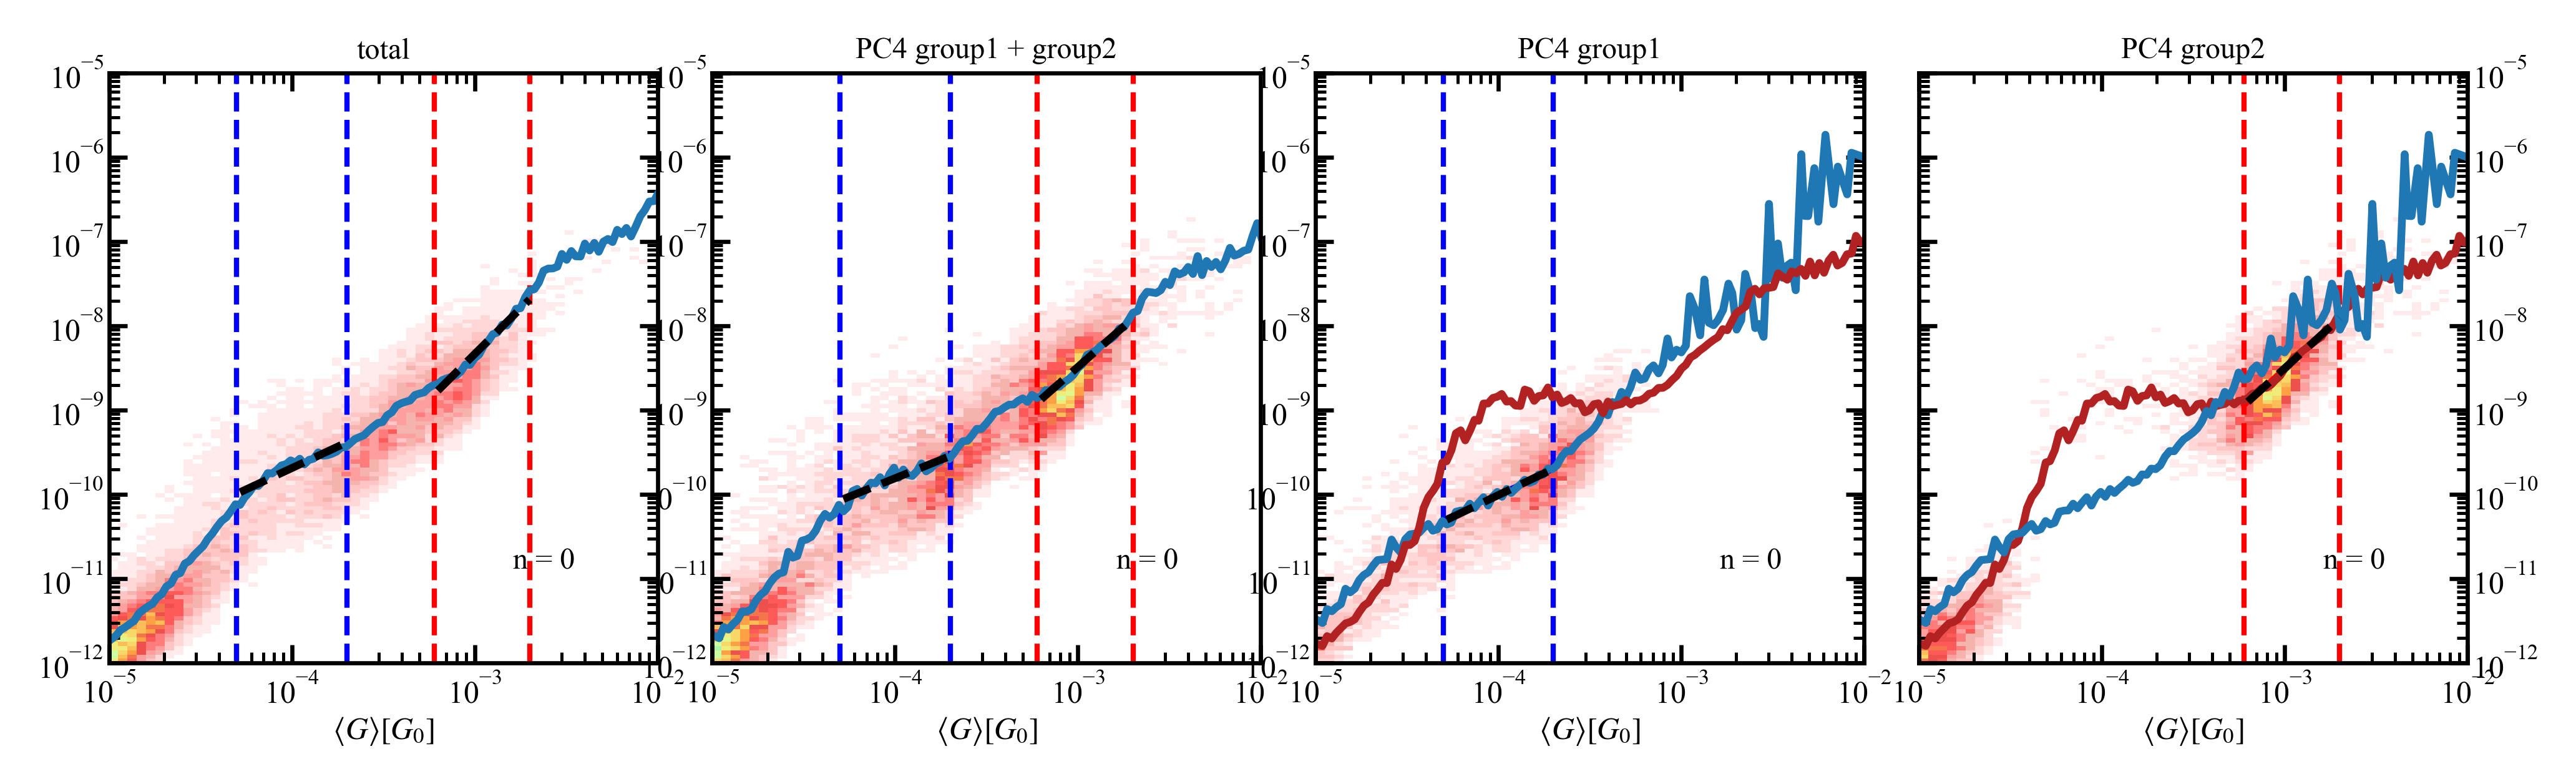

In [673]:
fig = plt.figure(figsize=utils.cm2inch(20, 5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=4, width_ratios=(1, 1, 1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax_both = fig.add_subplot(gs[1])
ax1_corr = fig.add_subplot(gs[2])
ax2_corr = fig.add_subplot(gs[3])
ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1, 1])

# ax1_corr.xaxis.tick_top()
# ax1_corr.xaxis.set_label_position('top')
# ax2_corr.xaxis.tick_top()
# ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax_both.set_title('PC4 group1 + group2', fontsize='xx-small', pad=3)
ax1_corr.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2_corr.set_title('PC4 group2', fontsize='xx-small', pad=3)
ax1.set_title('total', fontsize='xx-small', pad=3)
ax2.set_title('total', fontsize='xx-small', pad=3)

# ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax1_corr)
# ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_both,
                              noise_power=areas_pull_both,
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-12, 1e-5),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax_both, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_1.flatten(),
                              noise_power=areas_pull_4_1.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-12, 1e-5),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1_corr, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_2.flatten(),
                              noise_power=areas_pull_4_2.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-12, 1e-5),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax2_corr, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=areas_pull_all.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-12, 1e-5),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1, cmap=utils.cmap_geo32, vmax=500)

# plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
#                               noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
#                               n=n2/2-1,
#                               xrange=(1e-5, 0.1),
#                               yrange=(1e-2, 10),
#                               num_bins=(20, 20), shift=-2, normalize=False, axis=ax2, cmap=utils.cmap_geo32, vmax=500)

xbins1=np.logspace(np.log10(G_low[0]), np.log10(G_low[1]), num=20)
xbins2=np.logspace(np.log10(G_high[0]), np.log10(G_high[1]), num=20)
shift1=-6
shift2=-2.5
ax1_corr.plot(xbins1, 10 ** (1 * np.log10(xbins1) + shift1), c='b', ls='-', lw=1)
ax2_corr.plot(xbins2, 10 ** (2 * np.log10(xbins2) + shift2), c='r', ls='-', lw=1)
shift1=-3
shift2=-1.2
# ax2.plot(xbins1, 10 ** (-0.5 * np.log10(xbins1) + shift1), c='b', ls='-', lw=0.75)
# ax2.plot(xbins2, 10 ** (0 * np.log10(xbins2) + shift2), c='r', ls='-', lw=0.75)

# ax1_corr.axvline(G_high[0], ls='--', c='r', lw=1)
# ax1_corr.axvline(G_high[1], ls='--', c='r', lw=1)
ax1_corr.axvline(G_low[0], ls='--', c='b', lw=1)
ax1_corr.axvline(G_low[1], ls='--', c='b', lw=1)

ax1.axvline(G_low[0], ls='--', c='b', lw=1)
ax1.axvline(G_low[1], ls='--', c='b', lw=1)
ax1.axvline(G_high[0], ls='--', c='r', lw=1)
ax1.axvline(G_high[1], ls='--', c='r', lw=1)

ax_both.axvline(G_low[0], ls='--', c='b', lw=1)
ax_both.axvline(G_low[1], ls='--', c='b', lw=1)
ax_both.axvline(G_high[0], ls='--', c='r', lw=1)
ax_both.axvline(G_high[1], ls='--', c='r', lw=1)

ax2_corr.axvline(G_high[0], ls='--', c='r', lw=1)
ax2_corr.axvline(G_high[1], ls='--', c='r', lw=1)
# ax2_corr.axvline(G_low[0], ls='--', c='b', lw=1)
# ax2_corr.axvline(G_low[1], ls='--', c='b', lw=1)
# ax2.axvline(G_high[0], ls='--', c='r', lw=1)
# ax2.axvline(G_high[1], ls='--', c='r', lw=1)
# ax2.axvline(G_low[0], ls='--', c='b', lw=1)
# ax2.axvline(G_low[1], ls='--', c='b', lw=1)

ax_both.plot(cond_mean_both[cond_mean_both > 0], noise_mean_both[cond_mean_both > 0])
ax_both.plot(10**xdata_4_1, 10**(xdata_4_1*popt_both_1[0]+popt_both_1[1]), c='k', ls='--')
ax_both.plot(10**xdata_4_2, 10**(xdata_4_2*popt_both_2[0]+popt_both_2[1]), c='k', ls='--')

ax1_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax2_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax2_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax1_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax1.plot(cond_mean_all[cond_mean_all > 0], noise_mean_all[cond_mean_all > 0])

ax1_corr.plot(10**xdata_4_1, 10**(xdata_4_1*popt_4_1[0]+popt_4_1[1]), c='k', ls='--')
ax2_corr.plot(10**xdata_4_2, 10**(xdata_4_2*popt_4_2[0]+popt_4_2[1]), c='k', ls='--')

ax1.plot(10**xdata_4_1, 10**(xdata_4_1*popt_all_1[0]+popt_all_1[1]), c='k', ls='--')
ax1.plot(10**xdata_4_2, 10**(xdata_4_2*popt_all_2[0]+popt_all_2[1]), c='k', ls='--')

# ax2.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

In [674]:
print('All G_low', popt_all_1)
print('All G_high', popt_all_2)
print('Both G_low', popt_both_1)
print('Both G_high', popt_both_2)
print('PC4 group1', popt_4_1)
print('PC4 group2', popt_4_2)

All G_low [ 1.01390308 -5.63138608]
All G_high [ 2.15684235 -1.86324319]
Both G_low [ 0.87567419 -6.30422114]
Both G_high [ 1.9134159  -2.74524117]
PC4 group1 [ 1.0369658  -5.85889947]
PC4 group2 [ 1.9758259  -2.57480326]


In [675]:
noise_mean_4_1 = np.zeros(len(xbins)-1)
noise_std_4_1 = np.zeros(len(xbins)-1)
noise_log_std_4_1 = np.zeros(len(xbins)-1)
cond_mean_4_1 = np.zeros(len(xbins)-1)
cond_std_4_1 = np.zeros(len(xbins)-1)
noise_log_mean_4_1 = np.zeros(len(xbins)-1)
cond_log_mean_4_1 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_1.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_1.flatten() < xbins[i+1]))
    if len(areas_pull_4_1.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_1[i] = 10**np.mean(np.log10(np.sqrt(areas_pull_4_1.flatten()[mask_x1[i]])/cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        noise_log_std_4_1[i] = np.sqrt(utils.log_avg(abs(areas_pull_4_1.flatten()-noise_mean_4_1[i])**2))
        noise_log_mean_4_1[i] = utils.log_avg(areas_pull_4_1.flatten()[mask_x1[i]]/cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]])
        noise_std_4_1[i] = np.std(areas_pull_4_1.flatten()[mask_x1[i]])
        cond_mean_4_1[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        cond_std_4_1[i] = np.std(np.log10(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]]))
        cond_log_mean_4_1[i] = utils.log_avg(cond_avg_in_win_pull_4_1.flatten()[mask_x1[i]])
    else:
        noise_mean_4_1[i] = 0
        noise_std_4_1[i] = 0
        cond_mean_4_1[i] = 0
        cond_std_4_1[i] = 0
        noise_log_mean_4_1[i] = 0
        cond_log_mean_4_1[i] = 0

In [676]:
noise_mean_4_2 = np.zeros(len(xbins)-1)
noise_std_4_2 = np.zeros(len(xbins)-1)
noise_log_std_4_2 = np.zeros(len(xbins)-1)
cond_mean_4_2 = np.zeros(len(xbins)-1)
cond_std_4_2 = np.zeros(len(xbins)-1)
noise_log_mean_4_2 = np.zeros(len(xbins)-1)
cond_log_mean_4_2 = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_4_2.flatten() > xbins[i],
                                  cond_avg_in_win_pull_4_2.flatten() < xbins[i+1]))
    if len(areas_pull_4_2.flatten()[mask_x1[i]]) > 0:
        noise_mean_4_2[i] = 10**np.mean(np.log10(np.sqrt(areas_pull_4_2.flatten()[mask_x1[i]])/cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        noise_std_4_2[i] = np.std(areas_pull_4_2.flatten()[mask_x1[i]])
        cond_mean_4_2[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
        cond_std_4_2[i] = np.std(np.log10(cond_avg_in_win_pull_4_2.flatten()[mask_x1[i]]))
    else:
        noise_mean_4_2[i] = 0
        noise_std_4_2[i] = 0
        cond_mean_4_2[i] = 0
        cond_std_4_2[i] = 0
        noise_log_mean_4_2[i] = 0
        cond_log_mean_4_2[i] = 0

In [677]:
noise_mean_all = np.zeros(len(xbins)-1)
noise_std_all = np.zeros(len(xbins)-1)
noise_log_std_all = np.zeros(len(xbins)-1)
cond_mean_all = np.zeros(len(xbins)-1)
cond_std_all = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_all.flatten() > xbins[i],
                                  cond_avg_in_win_pull_all.flatten() < xbins[i+1]))
    if len(areas_pull_all.flatten()[mask_x1[i]]) > 0:
        noise_mean_all[i] = 10**np.mean(np.log10(np.sqrt(areas_pull_all.flatten()[mask_x1[i]])/cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        noise_std_all[i] = np.sqrt(utils.log_avg(abs(np.sqrt(areas_pull_all.flatten()[mask_x1[i]])/cond_avg_in_win_pull_all.flatten()[mask_x1[i]]-noise_mean_all[i])**2))
        cond_mean_all[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_all.flatten()[mask_x1[i]]))
        cond_std_all[i] = np.sqrt(utils.log_avg(abs(cond_avg_in_win_pull_all.flatten()-cond_mean_all[i])**2))
    else:
        noise_mean_all[i] = 0
        noise_std_all[i] = 0
        cond_mean_all[i] = 0
        cond_std_all[i] = 0

In [678]:
noise_mean_both = np.zeros(len(xbins)-1)
noise_std_both = np.zeros(len(xbins)-1)
noise_log_std_both = np.zeros(len(xbins)-1)
cond_mean_both = np.zeros(len(xbins)-1)
cond_std_both = np.zeros(len(xbins)-1)
noise_log_mean_both = np.zeros(len(xbins)-1)
cond_log_mean_both = np.zeros(len(xbins)-1)
mask_x1 = []
for i in range(len(xbins)-1):
    mask_x1.append(np.bitwise_and(cond_avg_in_win_pull_both > xbins[i],
                                  cond_avg_in_win_pull_both < xbins[i+1]))
    if len(areas_pull_both.flatten()[mask_x1[i]]) > 0:
        noise_mean_both[i] = 10**np.mean(np.log10(np.sqrt(areas_pull_both[mask_x1[i]])/cond_avg_in_win_pull_both[mask_x1[i]]))
        noise_log_std_both[i] = np.sqrt(utils.log_avg(abs(areas_pull_both-noise_mean_both[i])**2))
        noise_log_mean_both[i] = utils.log_avg(areas_pull_both[mask_x1[i]])
        noise_std_both[i] = np.std(areas_pull_both[mask_x1[i]])
        cond_mean_both[i] = 10**np.mean(np.log10(cond_avg_in_win_pull_both[mask_x1[i]]))
        cond_std_both[i] = np.std(np.log10(cond_avg_in_win_pull_both[mask_x1[i]]))
        cond_log_mean_both[i] = utils.log_avg(cond_avg_in_win_pull_both[mask_x1[i]])
    else:
        noise_mean_both[i] = 0
        noise_std_both[i] = 0
        cond_mean_both[i] = 0
        cond_std_both[i] = 0
        noise_log_mean_both[i] = 0
        cond_log_mean_both[i] = 0

In [679]:
xbins

array([1.00000000e-05, 1.05963729e-05, 1.12283118e-05, 1.18979379e-05,
       1.26074987e-05, 1.33593757e-05, 1.41560926e-05, 1.50003236e-05,
       1.58949023e-05, 1.68428311e-05, 1.78472919e-05, 1.89116560e-05,
       2.00394959e-05, 2.12345971e-05, 2.25009709e-05, 2.38428678e-05,
       2.52647918e-05, 2.67715155e-05, 2.83680960e-05, 3.00598924e-05,
       3.18525829e-05, 3.37521845e-05, 3.57650733e-05, 3.78980053e-05,
       4.01581396e-05, 4.25530621e-05, 4.50908114e-05, 4.77799051e-05,
       5.06293691e-05, 5.36487674e-05, 5.68482344e-05, 6.02385090e-05,
       6.38309703e-05, 6.76376763e-05, 7.16714040e-05, 7.59456922e-05,
       8.04748873e-05, 8.52741914e-05, 9.03597130e-05, 9.57485213e-05,
       1.01458703e-04, 1.07509425e-04, 1.13920996e-04, 1.20714935e-04,
       1.27914047e-04, 1.35542494e-04, 1.43625881e-04, 1.52191339e-04,
       1.61267617e-04, 1.70885181e-04, 1.81076310e-04, 1.91875210e-04,
       2.03318127e-04, 2.15443469e-04, 2.28291933e-04, 2.41906645e-04,
      

In [680]:
def fit_line(x, a, b):
    return a*x+b

popt_all_1, pcov_all_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_low[0], cond_mean_all < G_low[1])]))
popt_all_2, pcov_all_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]),
                                              np.log10(noise_mean_all[np.bitwise_and(cond_mean_all > G_high[0], cond_mean_all < G_high[1])]))

popt_both_1, pcov_both_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_both[np.bitwise_and(cond_mean_both > G_low[0], cond_mean_both < G_low[1])]),
                                              np.log10(noise_mean_both[np.bitwise_and(cond_mean_both > G_low[0], cond_mean_both < G_low[1])]))
popt_both_2, pcov_both_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_both[np.bitwise_and(cond_mean_both > G_high[0], cond_mean_both < G_high[1])]),
                                              np.log10(noise_mean_both[np.bitwise_and(cond_mean_both > G_high[0], cond_mean_both < G_high[1])]))

popt_4_1, pcov_4_1 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]),
                                              np.log10(noise_mean_4_1[np.bitwise_and(cond_mean_4_1 > G_low[0], cond_mean_4_1 < G_low[1])]))
popt_4_2, pcov_4_2 = scipy.optimize.curve_fit(fit_line,
                                              np.log10(cond_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]),
                                              np.log10(noise_mean_4_2[np.bitwise_and(cond_mean_4_2 > G_high[0], cond_mean_4_2 < G_high[1])]))

In [681]:
print('All G_low', popt_all_1)
print('All G_high', popt_all_2)
print('Both G_low', popt_both_1)
print('Both G_high', popt_both_2)
print('PC4 group1', popt_4_1)
print('PC4 group2', popt_4_2)

All G_low [-0.49304846 -2.81569305]
All G_high [ 0.07842119 -0.93162156]
Both G_low [-0.56216291 -3.15211061]
Both G_high [-0.04329205 -1.37262058]
PC4 group1 [-0.4815171  -2.92944973]
PC4 group2 [-0.01208704 -1.2874016 ]


C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_1264/1007163091.py:46: RuntimeWarning: invalid value encountered in sqrt
  noise_power=np.sqrt(areas_pull_4_1.flatten())/cond_avg_in_win_pull_4_1.flatten(),
C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_1264/1007163091.py:53: RuntimeWarning: invalid value encountered in sqrt
  noise_power=np.sqrt(areas_pull_4_2.flatten())/cond_avg_in_win_pull_4_2.flatten(),
C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_1264/1007163091.py:60: RuntimeWarning: invalid value encountered in sqrt
  noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),


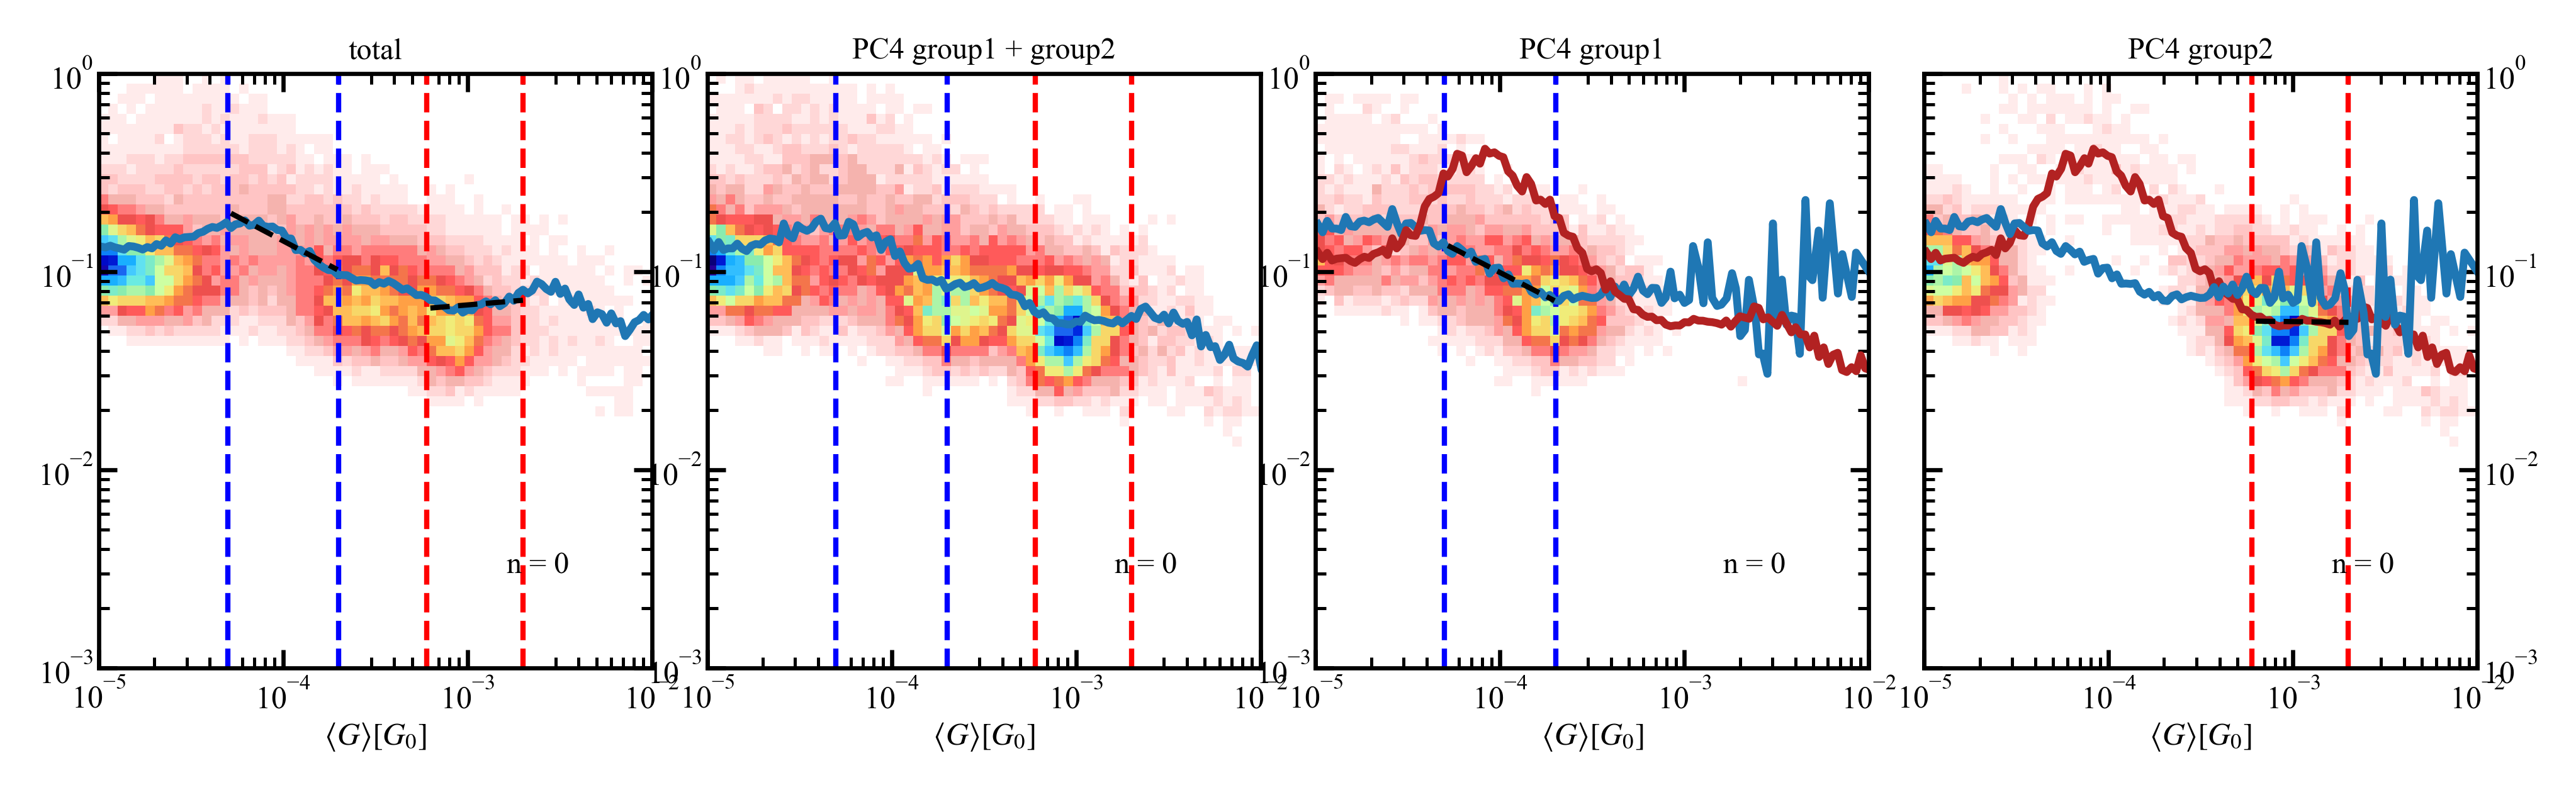

In [682]:
fig = plt.figure(figsize=utils.cm2inch(20, 5), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=4, width_ratios=(1, 1, 1, 1),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

ax_both = fig.add_subplot(gs[1])
ax1_corr = fig.add_subplot(gs[2])
ax2_corr = fig.add_subplot(gs[3])
ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1, 1])

# ax1_corr.xaxis.tick_top()
# ax1_corr.xaxis.set_label_position('top')
# ax2_corr.xaxis.tick_top()
# ax2_corr.xaxis.set_label_position('top')
ax1_corr.xaxis.set_ticks_position('both')
ax2_corr.xaxis.set_ticks_position('both')
ax2_corr.yaxis.tick_right()
ax2_corr.yaxis.set_label_position('right')
ax1_corr.yaxis.set_ticks_position('both')
ax2_corr.yaxis.set_ticks_position('both')

ax1.xaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

ax_both.set_title('PC4 group1 + group2', fontsize='xx-small', pad=3)
ax1_corr.set_title('PC4 group1', fontsize='xx-small', pad=3)
ax2_corr.set_title('PC4 group2', fontsize='xx-small', pad=3)
ax1.set_title('total', fontsize='xx-small', pad=3)
ax2.set_title('total', fontsize='xx-small', pad=3)

# ax1_corr, n1 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax1_corr)
# ax2_corr, n2 = plots.plot_correlation(n=N, correlation=pull_corrall, axis=ax2_corr)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_both,
                              noise_power=np.sqrt(areas_pull_both)/cond_avg_in_win_pull_both,
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-3, 1),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax_both, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_1.flatten(),
                              noise_power=np.sqrt(areas_pull_4_1.flatten())/cond_avg_in_win_pull_4_1.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-3, 1),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1_corr, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_4_2.flatten(),
                              noise_power=np.sqrt(areas_pull_4_2.flatten())/cond_avg_in_win_pull_4_2.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-3, 1),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax2_corr, cmap=utils.cmap_geo32, vmax=200)

plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
                              noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
                              n=0,
                              xrange=(1e-5, 1e-2),
                              yrange=(1e-3, 1),
                              num_bins=(20, 20), shift=-4, normalize=False, axis=ax1, cmap=utils.cmap_geo32, vmax=500)

# plots.plot_noise_power_2dhist(conductance_avgs=cond_avg_in_win_pull_all.flatten(),
#                               noise_power=np.sqrt(areas_pull_all.flatten())/cond_avg_in_win_pull_all.flatten(),
#                               n=n2/2-1,
#                               xrange=(1e-5, 0.1),
#                               yrange=(1e-2, 10),
#                               num_bins=(20, 20), shift=-2, normalize=False, axis=ax2, cmap=utils.cmap_geo32, vmax=500)

xbins1=np.logspace(np.log10(G_low[0]), np.log10(G_low[1]), num=20)
xbins2=np.logspace(np.log10(G_high[0]), np.log10(G_high[1]), num=20)
shift1=-6
shift2=-2.5
ax1_corr.plot(xbins1, 10 ** (1 * np.log10(xbins1) + shift1), c='b', ls='-', lw=1)
ax2_corr.plot(xbins2, 10 ** (2 * np.log10(xbins2) + shift2), c='r', ls='-', lw=1)
shift1=-3
shift2=-1.2

ax1_corr.axvline(G_low[0], ls='--', c='b', lw=1)
ax1_corr.axvline(G_low[1], ls='--', c='b', lw=1)

ax1.axvline(G_low[0], ls='--', c='b', lw=1)
ax1.axvline(G_low[1], ls='--', c='b', lw=1)
ax1.axvline(G_high[0], ls='--', c='r', lw=1)
ax1.axvline(G_high[1], ls='--', c='r', lw=1)

ax_both.axvline(G_low[0], ls='--', c='b', lw=1)
ax_both.axvline(G_low[1], ls='--', c='b', lw=1)
ax_both.axvline(G_high[0], ls='--', c='r', lw=1)
ax_both.axvline(G_high[1], ls='--', c='r', lw=1)

ax2_corr.axvline(G_high[0], ls='--', c='r', lw=1)
ax2_corr.axvline(G_high[1], ls='--', c='r', lw=1)

ax_both.plot(cond_mean_both[cond_mean_both > 0], noise_mean_both[cond_mean_both > 0])
# ax_both.plot(10**xdata_4_1, 10**(xdata_4_1*popt_both_1[0]+popt_both_1[1]), c='k', ls='--', lw=1)
# ax_both.plot(10**xdata_4_2, 10**(xdata_4_2*popt_both_2[0]+popt_both_2[1]), c='k', ls='--', lw=1)

ax1_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax2_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax2_corr.plot(cond_mean_4_1[cond_mean_4_1 > 0], noise_mean_4_1[cond_mean_4_1 > 0])
ax1_corr.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

ax1.plot(cond_mean_all[cond_mean_all > 0], noise_mean_all[cond_mean_all > 0])

ax1_corr.plot(10**xdata_4_1, 10**(xdata_4_1*popt_4_1[0]+popt_4_1[1]), c='k', ls='--', lw=1)
ax2_corr.plot(10**xdata_4_2, 10**(xdata_4_2*popt_4_2[0]+popt_4_2[1]), c='k', ls='--', lw=1)

ax1.plot(10**xdata_4_1, 10**(xdata_4_1*popt_all_1[0]+popt_all_1[1]), c='k', ls='--', lw=1)
ax1.plot(10**xdata_4_2, 10**(xdata_4_2*popt_all_2[0]+popt_all_2[1]), c='k', ls='--', lw=1)

# ax2.plot(cond_mean_4_2[cond_mean_4_2 > 0], noise_mean_4_2[cond_mean_4_2 > 0], c='Firebrick')

In [683]:
print('All G_low', popt_all_1)
print('All G_high', popt_all_2)
print('Both G_low', popt_both_1)
print('Both G_high', popt_both_2)
print('PC4 group1', popt_4_1)
print('PC4 group2', popt_4_2)

All G_low [-0.49304846 -2.81569305]
All G_high [ 0.07842119 -0.93162156]
Both G_low [-0.56216291 -3.15211061]
Both G_high [-0.04329205 -1.37262058]
PC4 group1 [-0.4815171  -2.92944973]
PC4 group2 [-0.01208704 -1.2874016 ]


In [696]:
isinstance(xbins, (list, tuple, np.ndarray))

True